# **Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings # Ignores any warning
warnings.filterwarnings("ignore")

In [3]:
plt.style.use('seaborn')
sns.set(rc={'figure.figsize':(15, 8)})

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Peduli LIndungi**

Data scan peduli lingdung

* `sid` : auto generated id
* `userId` : auto generated kode user
* `user_status` : status keterjangkitan covid (positif/negatif)
* `checkInTime` : tgl check in (waktu cekin di suatu tempat)
* `checkOutTime` : tgl check out (waktu cekout di suatu tempat)
* `place_name` : tempat check in (nama tempat yang dikunjungi)
* `place_categoryName` : tempat kategori (kategori tempat yang dikunjungi)
* `locationAddress` : alamat tempat yang dikunjungi
* `location_latitude` : titik latitude tempat yang dikunjungi
* `location_longitude` : titik longitude tempat yang dikunjungi
* `crowd` : banyaknya kerumunan saat cekin di suatu tempat
* `status` : status data (1=valid, 0=tidak valid)
* `userStatus` : status user (green/red/yellow/black) status warna seseorang saat mengunjungi suatu tempat (hijau/merah/hitam/kuning)
	- `green`: sudah vaksin 2x
	- `red`: belum vaksin
	- `black`: positif 
	- `yellow`: baru vaksin 1x
* `updatedAt` : tgl update (waktu update data)
* `createdAt` : tgl buat (waktu pembuatan data)

## **Load Datasets**

In [ ]:
df_pl = pd.read_csv("scanPeduliLindungi.csv")
df_pl.head()

,sid,userId,user_status,checkInTime,checkOutTime,place_name,place_categoryName,locationAddress,location_latitude,location_longitude,crowd,status,userStatus,updatedAt,createdAt
0,60a0b01e44ffcb0bc5ff3e66,8b8edcd0-722a-11ea-a46d-37bc1e5d6c1e,NOT POSITIVE,2021-05-16,2021-06-03,Ninety Nine Grand Indonesia,Tenant,Grand Indonesia Shopping Town East Mall LG Jal...,-6.194689,106.821281,85,1,NaN,2021-06-03,2021-05-16
1,60b0420aa4776e2e5b261439,8edd5930-bc3d-11eb-97e9-63e6669a13df,NOT POSITIVE,2021-05-28,2021-06-02,North Lobby - Lippo Mall Kuta,Gedung,Jl. Kartika Plaza Lingkungan Segara Kuta Kabup...,-6.999072,107.508507,6,1,NaN,2021-05-28,2021-05-28
2,60b1da53f1e5dcffc33fee17,d6660fa0-bc5f-11eb-a838-8dac8ac4a67a,NOT POSITIVE,2021-05-29,2021-05-29,Parking - Lippo Mall Kuta,Gedung,Jl. Kartika Plaza Lingkungan Segara Kuta Kabup...,-6.999047,107.509097,5,1,NaN,2021-05-29,2021-05-29
3,60c1bdb2f82d5b361a593431,1046d0b0-8772-11eb-a4f2-b31458d5264c,NOT POSITIVE,2021-06-10,2021-06-10,CGK - Boarding Gate - E5,Gedung,Terminal 2E RT.001/RW.010 Pajang Benda Kota Ta...,-6.121404,106.651994,5,1,NaN,2021-06-10,2021-06-10
4,60c409bf2107c3f32443905e,4ae7a0c0-7fba-11ea-abc7-81955d67cdbc,NOT POSITIVE,2021-06-12,2021-06-12,CGK - Boarding Gate - E5,Gedung,Terminal 2E RT.001/RW.010 Pajang Benda Kota Ta...,-6.121404,106.651994,9,1,NaN,2021-06-12,2021-06-12


## **Explore Datasets**

In [ ]:
print('Total rows (Peduli Lindungi):', df_pl.shape[0])
print('Total features (Peduli Lindungi):', df_pl.shape[1])

Total rows (Peduli Lindungi): 3945526
Total features (Peduli Lindungi): 15


In [ ]:
df_pl.columns

Index(['sid', 'userId', 'user_status', 'checkInTime', 'checkOutTime',
       'place_name', 'place_categoryName', 'locationAddress',
       'location_latitude', 'location_longitude', 'crowd', 'status',
       'userStatus', 'updatedAt', 'createdAt'],
      dtype='object')

In [ ]:
# get the info of each columns
df_pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3945526 entries, 0 to 3945525
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   sid                 object 
 1   userId              object 
 2   user_status         object 
 3   checkInTime         object 
 4   checkOutTime        object 
 5   place_name          object 
 6   place_categoryName  object 
 7   locationAddress     object 
 8   location_latitude   float64
 9   location_longitude  float64
 10  crowd               int64  
 11  status              int64  
 12  userStatus          object 
 13  updatedAt           object 
 14  createdAt           object 
dtypes: float64(2), int64(2), object(11)
memory usage: 451.5+ MB


In [ ]:
np.sort(df_pl["createdAt"].unique())

array(['2021-04-24', '2021-05-14', '2021-05-16', '2021-05-17',
       '2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
       '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
       '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
       '2021-05-30', '2021-06-01', '2021-06-02', '2021-06-03',
       '2021-06-04', '2021-06-05', '2021-06-06', '2021-06-07',
       '2021-06-08', '2021-06-09', '2021-06-10', '2021-06-11',
       '2021-06-12', '2021-06-13', '2021-06-14', '2021-06-16',
       '2021-06-17', '2021-06-18', '2021-06-19', '2021-06-20',
       '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
       '2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28',
       '2021-06-29', '2021-07-01', '2021-07-02', '2021-07-03',
       '2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
       '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
       '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-16',
       '2021-07-17', '2021-07-18', '2021-07-19', '2021-

In [ ]:
df_pl.describe()

,location_latitude,location_longitude,crowd,status
count,3.945526e+06,3.945526e+06,3.945526e+06,3945526.0
mean,-6.468865e+00,1.079721e+02,7.951058e+03,1.0
std,7.031948e-01,2.348465e+00,2.251671e+04,0.0
min,-1.017034e+01,-8.814879e+00,0.000000e+00,1.0
25%,-6.890091e+00,1.067910e+02,0.000000e+00,1.0
50%,-6.227973e+00,1.068345e+02,1.117000e+03,1.0
75%,-6.180238e+00,1.075943e+02,4.575750e+03,1.0
max,1.152640e+02,1.405128e+02,2.853650e+05,1.0


## **Missing Value**

In [ ]:
df_pl.isnull().any()

sid                   False
userId                 True
user_status            True
checkInTime            True
checkOutTime          False
place_name            False
place_categoryName    False
locationAddress       False
location_latitude     False
location_longitude    False
crowd                 False
status                False
userStatus             True
updatedAt             False
createdAt             False
dtype: bool

In [ ]:
df_pl.isna().sum()

sid                        0
userId                135367
user_status           135429
checkInTime           209983
checkOutTime               0
place_name                 0
place_categoryName         0
locationAddress            0
location_latitude          0
location_longitude         0
crowd                      0
status                     0
userStatus              2403
updatedAt                  0
createdAt                  0
dtype: int64

In [ ]:
df_pl = df_pl.dropna()

In [ ]:
df_pl.shape # 3945526

(3609314, 15)

In [ ]:
df_pl.isna().sum()

sid                   0
userId                0
user_status           0
checkInTime           0
checkOutTime          0
place_name            0
place_categoryName    0
locationAddress       0
location_latitude     0
location_longitude    0
crowd                 0
status                0
userStatus            0
updatedAt             0
createdAt             0
dtype: int64

## **Duplicate Value**

In [ ]:
df_pl.duplicated().sum()

0

In [ ]:
print(f"Data Frame Dimension Before Duplicate Removal: {df_pl.shape}")
df_pl = df_pl.drop_duplicates()
print(f"Data Frame Dimension After Duplicate Removal: {df_pl.shape}")

Data Frame Dimension Before Duplicate Removal: (3609314, 15)
Data Frame Dimension After Duplicate Removal: (3609314, 15)


## **Explore Each Columns**

### **sid**

sid = auto generated id

In [ ]:
np.unique(df_pl['sid'])

array(['60e0f62137fc87ff7744e3bc', '60e1079303958ba1ac3628d7',
       '60e112164660ee2f6af8bd05', ..., '6124367fda08c8265f9ad450',
       '6124367fdb532a8af1a1ff88', '6124367fef9e22706c958c14'],
      dtype=object)

In [ ]:
sid = df_pl['sid'].value_counts()
sid

60f49257c8948d0cd01751d7    1
6120bdb506fe6107e3990e6d    1
6120b91ad51d030c32445445    1
6120bcf6d51d030c3244594b    1
6120c6d20e773fd4ce163238    1
                           ..
61187b2f7f80fff960daa1cf    1
61187e80f576a2b1e262199f    1
611884487f80fff960daa607    1
61188d085e6c3dfad4f1c1ab    1
61238a8f3919a1d165988434    1
Name: sid, Length: 3609314, dtype: int64

In [ ]:
for i in sid:
  if i > 1:
    print("Ada id yang lebih dari 1")
    break;
else:
  print("Semuanya memiliki hanya 1 id")

Semuanya memiliki hanya 1 id


### **userId**

userId = auto generated kode user

In [ ]:
np.unique(df_pl['userId'])

array(['000000d0-ccb1-11eb-8e08-ad54935d585d',
       '00000e90-7c25-11eb-8403-8dee134789c3',
       '000020e0-fb61-11eb-b613-0fb4c0a4f779', ...,
       'fffff330-f986-11eb-b714-9b6ebe9f0776',
       'fffffe80-f539-11eb-af40-69540db564a6',
       'pcare-38f3-11eb-96b5-1d43657e7249'], dtype=object)

In [ ]:
user_id = df_pl['userId'].value_counts()
user_id

9f704c40-bdd6-11eb-8f24-cbdbb3fae9e3    136
080fa840-c278-11eb-a437-5334524d3d09    131
0ed73170-ef78-11eb-928d-235e4656812e    124
ca63da30-0191-11ec-85b4-8dbac5cb3a0f    114
6ac0f480-ef73-11eb-b29c-71b598e65505    112
                                       ... 
aced7c50-fae2-11eb-ab36-6d8ff3975426      1
e4efc170-8776-11ea-86a3-7b533d47cc9f      1
875e8f10-928c-11eb-b505-6da0e18282c4      1
d385bf80-deef-11eb-879e-0f8723dc7e95      1
aa3829c0-f2b2-11eb-8b7b-3b3eb81d3933      1
Name: userId, Length: 1570847, dtype: int64

In [ ]:
for i in user_id:
  if i > 1:
    print("Ada id yang lebih dari 1")
    break;
else:
  print("Semuanya memiliki hanya 1 id")

Ada id yang lebih dari 1


### **user_status**

user_status = status keterjangkitan covid (positif/negatif)

In [ ]:
np.unique(df_pl['user_status'])

array(['NON REAKTIF', 'NOT POSITIVE'], dtype=object)

In [ ]:
df_pl['user_status'].value_counts()

NOT POSITIVE    3609301
NON REAKTIF          13
Name: user_status, dtype: int64

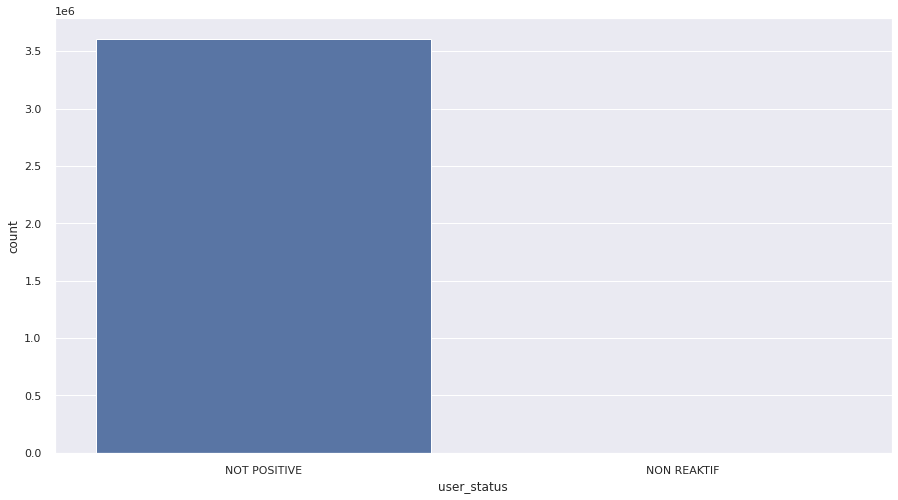

In [ ]:
sns.countplot(x='user_status', data=df_pl)
plt.show()

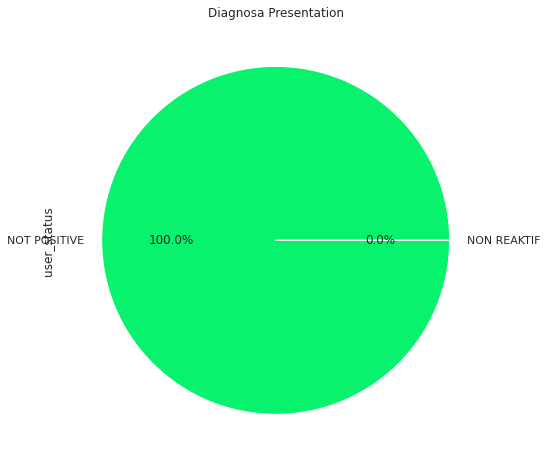

In [ ]:
user_status = df_pl['user_status'].value_counts()
label =['NOT POSITIVE','NON REAKTIF']
color = ['#08F26E', 'r']
user_status.plot(kind='pie', labels=label, colors=color, autopct='%1.1f%%')
plt.title('Diagnosa Presentation')
plt.show()

### **checkInTime**

checkInTime = waktu cekin di suatu tempat

In [ ]:
np.unique(df_pl['checkInTime'])

array(['2021-07-03', '2021-07-04', '2021-07-05', '2021-07-06',
       '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-10',
       '2021-07-11', '2021-07-12', '2021-07-13', '2021-07-14',
       '2021-07-16', '2021-07-17', '2021-07-18', '2021-07-19',
       '2021-07-20', '2021-07-21', '2021-07-22', '2021-07-23',
       '2021-07-24', '2021-07-25', '2021-07-26', '2021-07-27',
       '2021-07-28', '2021-07-29', '2021-07-30', '2021-08-01',
       '2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05',
       '2021-08-06', '2021-08-07', '2021-08-08', '2021-08-09',
       '2021-08-11', '2021-08-13', '2021-08-15', '2021-08-17',
       '2021-08-19', '2021-08-21', '2021-08-23'], dtype=object)

In [ ]:
df_pl['checkInTime'].value_counts()

2021-08-21    770567
2021-08-23    748376
2021-08-19    538391
2021-08-17    533756
2021-08-15    456660
2021-08-11    266144
2021-08-13    243792
2021-08-09      8799
2021-08-08      5794
2021-08-06      4929
2021-08-07      4830
2021-08-04      4446
2021-08-05      4393
2021-08-02      4033
2021-08-01      3603
2021-07-30      3024
2021-08-03      2947
2021-07-29      2340
2021-07-28       565
2021-07-26       225
2021-07-19       221
2021-07-16       218
2021-07-22       212
2021-07-27       188
2021-07-21       165
2021-07-23       156
2021-07-25       100
2021-07-20        63
2021-07-24        50
2021-07-18        47
2021-07-14        38
2021-07-10        37
2021-07-11        35
2021-07-13        32
2021-07-17        28
2021-07-12        25
2021-07-08        22
2021-07-09        18
2021-07-05        15
2021-07-07        12
2021-07-06        12
2021-07-04         5
2021-07-03         1
Name: checkInTime, dtype: int64

### **checkOutTime**

checkOutTime = waktu cekout di suatu tempat

In [ ]:
np.unique(df_pl['checkOutTime'])

array(['2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08',
       '2021-07-09', '2021-07-10', '2021-07-11', '2021-07-12',
       '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16',
       '2021-07-17', '2021-07-18', '2021-07-19', '2021-07-20',
       '2021-07-21', '2021-07-22', '2021-07-23', '2021-07-24',
       '2021-07-25', '2021-07-26', '2021-07-27', '2021-07-28',
       '2021-07-29', '2021-07-30', '2021-07-31', '2021-08-01',
       '2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05',
       '2021-08-06', '2021-08-07', '2021-08-08', '2021-08-09',
       '2021-08-10', '2021-08-11', '2021-08-12', '2021-08-13',
       '2021-08-14', '2021-08-15', '2021-08-16', '2021-08-17',
       '2021-08-18', '2021-08-19', '2021-08-20', '2021-08-21',
       '2021-08-22', '2021-08-23', '2021-08-24'], dtype=object)

In [ ]:
df_pl['checkOutTime'].value_counts()

2021-08-21    759179
2021-08-23    706430
2021-08-19    530813
2021-08-17    415557
2021-08-15    354153
2021-08-11    192975
2021-08-13    186152
2021-08-18    116677
2021-08-16    102507
2021-08-12     72945
2021-08-14     58080
2021-08-24     41946
2021-08-22     11388
2021-08-20      9100
2021-08-09      7523
2021-08-08      5260
2021-08-07      4812
2021-08-06      4764
2021-08-04      4348
2021-08-05      4311
2021-08-02      3803
2021-08-10      3573
2021-07-30      2867
2021-08-01      2586
2021-08-03      2580
2021-07-29      1932
2021-07-31       962
2021-07-28       307
2021-07-22       211
2021-07-27       209
2021-07-23       169
2021-07-19       139
2021-07-20       131
2021-07-26       128
2021-07-21       123
2021-07-16       120
2021-07-24       110
2021-07-17       104
2021-07-25        62
2021-07-12        44
2021-07-15        40
2021-07-11        33
2021-07-13        30
2021-07-18        26
2021-07-14        21
2021-07-09        20
2021-07-10        19
2021-07-06   

### **place_name**

place_name = nama tempat yang dikunjungi

In [ ]:
for i in np.unique(df_pl['place_name']):
  print(i)

 Ramayana Cimone
23 PASKAL SHOPPING CENTER
23 Paskal Shopping Center
ACE Bona Indah
ACE Cempaka Putih
ACE Cibubur
ACE Ciledug
ACE Ciputat Point/Pondok Cabe
ACE Depok Margonda
ACE Express Bekasi Caman
ACE Express Green Lake
ACE Express Greenville
ACE Express Pasar Minggu
ACE Express Rawabuntu
ACE Fatmawati
ACE Living Plaza Purwokerto
ACE Majapahit Semarang
ACE Mojokerto
ACE Panglima Polim
ACE Paramount Serpong
ACE Pemuda Rawamangun
ACE Pluit Lakeside
ACE Radio Dalam
ACE Rempoa
ACE Sawojajar
ACE Siliwangi
ACE TB Simatupang
ADHIBALADIKA AGUNG
AEON MALL BSD CITY
AEON MALL Jakarta Garden City
AEON MALL Jakarta Garden City - DKI
AEON MALL Sentul City
ALILA SEMINYAK MBL
AMQ - Bagage Claim - International
AMQ - Domestic Boarding Gate - 1
AMQ - Main Gate - Entrace - Terminal
AQ-VA HOTEL VILLAS MBL
ARION MALL
ASHTA
ASHTA - DKI Jakarta
AYANA Resort And Spa BALI
AYANA Resort And Spa BALI - Employee
AYU NADI TUBAN
Ace Express Kelapa Gading
Adit Sport
Ahmad Yani Golf Club
Akuatik Gelora Bung karno
A

Check All that start and end with with space

In [ ]:
for place in np.unique(df_pl['place_name']):
  if place != place.strip():
    df_pl.loc[df_pl['place_name'] == place, ['place_name']] = place.strip()
    print(place)

 Ramayana Cimone
Araya Golf 
Archery Range Summarecon Mall Bekasi 
BTC City Bekasi Timur 
Food Junction 
Gedung AIA Central 
HARCO MANGGA DUA 
Industri Rokok 
Lippo Mall Kuta 
Lippo Plaza Sidoarjo 
Lippo Plaza Sunset 
Living Plaza Kota Harapan Indah 
Living World Alam Sutera 
Mal Ciputra Tangerang 
Matahari Dept. Store Pasar Baru Jakarta Pusat 
PT Bridgestone Tire Indonesia Karawang Plant 
PT DENSO MANUFACTURING INDONESIA 
PT Kawasan Industri Jababeka 
PT. CHANGSHIN REKSA JAYA 
PT. Castrol Manufacturing Indonesia 
PT. Chandra Nugerah Cemerlang 
PT. Indonesia Epson Industry 
PT. Indotaisei Indah Development 
PT. TJAKRINDO MAS 
PT. Tanjung Kreasi Parquet Industry 
Paris Van Java 
RAMAYANA CIPLAZ KARAWANG 
The Laguna a Luxury Collection Resort Spa Bali 
The Plaza Office Tower 
The St Regis Bali Resort 
Transmart Yasmin 
citimall baturaja 
click square 


Change Some of Place Name

In [ ]:
place = '23 Paskal Shopping Center'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = place.upper()

In [ ]:
place = 'Jagorawi Golf CC'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = 'Jagorawi Golf Country Club'

In [ ]:
place = 'AEON MALL Jakarta Garden City - DKI'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = 'AEON MALL Jakarta Garden City'

In [ ]:
place = 'BANDUNG ELECTRONIC CENTER (BEC)'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = 'BANDUNG ELECTRONIC CENTER'

In [ ]:
place = 'BG Junction'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = 'BG Junction Mall'

In [ ]:
place = 'BTC FASHION MALL'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = 'BTC Fashion Mall'

In [ ]:
place = 'ASHTA'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = 'ASHTA - DKI Jakarta'

In [ ]:
place = 'AYANA Resort And Spa BALI - Employee'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = 'AYANA Resort And Spa BALI'

In [ ]:
place = 'Bali Collection - Sogo'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = 'Bali Collection'

In [ ]:
place = 'Ciputra Golf'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = 'Ciputra Golf Club Resto'

In [ ]:
place = 'Delipark'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = 'Delipark Mall'

In [ ]:
place = 'Emeralda Golf Club 1'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = 'Emeralda Golf'

In [ ]:
place = 'Gunung Geulis Country Club'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = 'Gunung Geulis Country Club (Golfer)'

In [ ]:
place = 'ITC CEMPAKA MAS'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = 'ITC Cempaka Mas'

In [ ]:
place = 'Industri Semi Konduktor Komponen Elektronik Lainnya'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = 'Industri Semi Konduktor dan Komponen Elektronik lainnya'

In [ ]:
place = 'LTC GLODOK'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = 'LTC Glodok'

In [ ]:
place = 'Mall@Alam Sutera'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = 'Mall Alam Sutera'

In [ ]:
place = 'MAL CIPUTRA JAKARTA - DKI'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = 'MAL CIPUTRA JAKARTA'

In [ ]:
place = 'MCD NANGKA BALI - DRIVE THRU'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = 'MCD NANGKA BALI'

In [ ]:
place = 'PLAZA KENARI MAS - DKI'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = 'PLAZA KENARI MAS'

In [ ]:
place = 'Mercure Bali Sanur Resort'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = 'Mercure Resort Sanur'

In [ ]:
place = 'PLAZA SENAYAN'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = 'PLAZA SENAYAN ARCADIA'

In [ ]:
place = 'PT DENSO MANUFACTURING INDONESIA - Plant2'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = 'PT DENSO MANUFACTURING INDONESIA'

In [ ]:
place = 'SUNTER MALL - DKI'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = 'SUNTER MALL'

In [ ]:
place = 'Senayan Park - DKI'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = 'Senayan Park'

In [ ]:
place = 'Taman Dayu Golf Club Resort - Driving Range'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = 'Taman Dayu Golf Club Resort'

In [ ]:
place = 'WTC E-mall Surabaya'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = 'WTC E-MALL Surabaya'

In [ ]:
place = 'WTC E-MALL Surabaya (PT. PURI PARIWARA)'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = 'WTC E-MALL Surabaya'

In [ ]:
place = 'YOGURT REPUBLIC LEGIAN'
df_pl.loc[df_pl['place_name'] == place, ['place_name']] = 'YOGURT REPUBLIC'

In [ ]:
df_pl['place_name'].value_counts()

Pondok Indah Mall                    121889
Summarecon Mall Kelapa Gading        115841
Lippo Mall Puri                      111143
Central Park Mall                    102832
Pakuwon Mall Pakuwon Trade Center     94747
                                      ...  
FAMILY KARAOKE ZARO4 MBL                  1
UPG-Gate-4                                1
TOKO KANO                                 1
PIZZA HOUSE MBL                           1
ACE Fatmawati                             1
Name: place_name, Length: 1448, dtype: int64

In [ ]:
np.unique(df_pl['place_name'])

array(['23 PASKAL SHOPPING CENTER', 'ACE Bona Indah', 'ACE Cempaka Putih',
       ..., 'uwu', 'vuteq indonesia', 'wisma kalla'], dtype=object)

### **place_categoryName**

place_categoryName = kategori tempat yang dikunjungi

In [ ]:
np.unique(df_pl['place_categoryName'])

array(['Bandara', 'Gedung', 'Industri', 'Mall', 'Outlet Mandiri', 'Sport',
       'Tenan Mall', 'Tenan Mandiri'], dtype=object)

In [ ]:
df_pl['place_categoryName'].value_counts()

Mall              3402959
Industri           144104
Sport               41970
Gedung              16361
Bandara              3343
Tenan Mandiri         497
Tenan Mall             69
Outlet Mandiri         11
Name: place_categoryName, dtype: int64

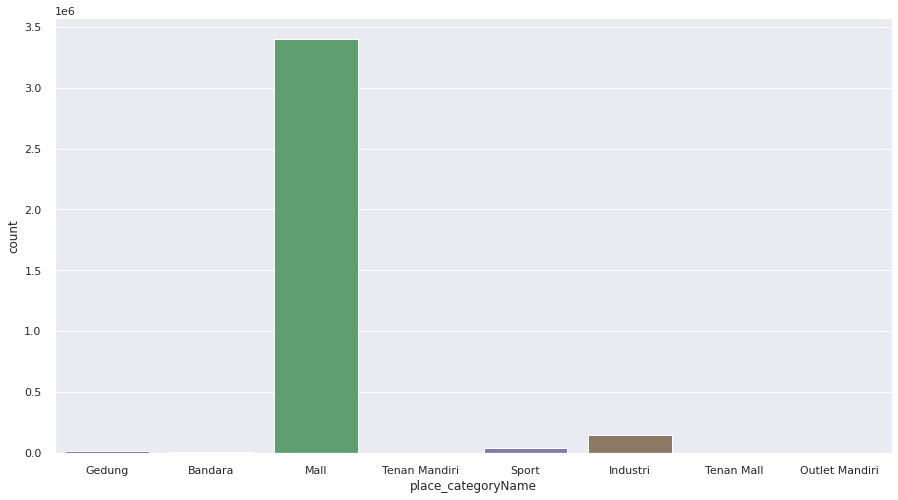

<Figure size 1440x1440 with 0 Axes>

In [ ]:
sns.countplot(x='place_categoryName', data=df_pl)
plt.figure(figsize=(20, 20))
plt.show()

### **locationAddress**

locationAddress = alamat tempat yang dikunjungi

In [ ]:
np.unique(df_pl['locationAddress'])

array([' Citra Raya Jl. Citra Raya Boulevard No.01 Ciakar Kec. Panongan Tangerang Banten 15710',
       ' Gramedia Supratman Bandung Jalan. WR Supratman No. 96 Rt.005 Rw. 011 Kel. Cihaurgeulis Kec. Cibeunying Kaler Kota Bandung 40122',
       ' JL. Inti II C7 No. 2 3 3A Kel. Cibatu Kec. Cikarang Selatan Kab. Bekasi Prop. Jawa Barat ',
       ..., 'jln. Pangeran Jayakarta No.45 Komplek kota indah blok d9-10',
       'kawasan industri Greenland Batavia Blok AF 21 25 26 Desa sukamahi Cikarang Pusat Bekasi 17520',
       'l. Kemang Raya No.45AA RT.9/RW.1 Bangka Kec. Mampang Prpt. Kota Jakarta Selatan Daerah Khusus Ibukota Jakarta 12730'],
      dtype=object)

In [ ]:
for location in np.unique(df_pl['locationAddress']):
  if location != location.strip():
    df_pl.loc[df_pl['locationAddress'] == location, ['locationAddress']] = location.strip()

In [ ]:
for i in np.unique(df_pl['locationAddress']):
  print(i)

105 Boulevard Diponegoro Lippo Karawaci 00-00 Kelurahan Bencongan Kecamatan Kelapa Dua Kabupaten Tangerang 15811
11 Jalan Pangeran Antasari Jl. Kemang Raya No.36 RW.5 Bangka Kec. Mampang Prpt. Kota Jakarta Selatan Daerah Khusus Ibukota Jakarta 12150
2709 Jalan Pulau Golf 2700 Lippo Village Tangerang 15811-Banten Indonesia
7 Boulevard Palem Raya Menara Matahari Ground Floor Lippo Karawaci Sentral Tangerang 15811 Banten
ACE HARDWARE TB Simatupang JL TB Simatupang Blok U Komplek Tanjung Barat Indah JAKARTA SELATAN
Alam Sutera Boulevard Kav 21 Alam Sutera
Alamat Pabrik Jl Wadas Blok Simaja RT03/RW01 Gombang Plumbon Kabupaten Cirebon Jawa Barat 45155
BLUMBANG RT.04 RW.01 KEC. KLEGO KAB. BOYOLALI
BR TOYA BUNGKAH BATUR TENGAH
Balai Sidang Jakarta Jl Jend Gatot Subroto Kelurahan Gelora Kecamatan Tanah Abang Jakarta Pusat
Bandar Udara Internasional Syamsudin Noor Jl.Akses Bandara Udara Landasan Ulin Banjarbaru 70724
Bekasi International Industrial Estate C-11 No. 1-5 Cibatu Cikarang Selatan Kab

In [ ]:
locationAddressDict = {
    "Desa Butuh RT 001 RW 002 Kelurahan Butuh Kecamatan Mojosongo Kabupaten Boyolali Provinsi Jawa Tengah" : 
    "Desa Butuh RT 001 RW 002 Kelurahan Butuh Kecamatan Mojosongo Kabupaten Boyolali Jawa Tengah",

    "Bintaro Jaya Jl. Boulevard Bintaro Jaya Pd. Jaya Kec. Pd. Aren Kota Tangerang Selatan Banten 15220" : 
    "Bintaro Jaya Jl. Boulevard Bintaro Jaya Pd. Jaya Kec. Pd. Aren Kota Tangerang Selatan Banten",

    "Club House Golf Graha Famili. Jl. Raya Golf Graha Famili - Surabaya kode pos : 60226" : 
    "Club House Graha Famili. Jl. Raya Golf Graha Famili - Surabaya Kode Pos : 60226",

    "Desa Bojongnangka Kec. Gunung Putri Kab. Bogor - 16965" : 
    "Desa Bojongnangka Kec. Gunung Putri Kab. Bogor",

    "Desa Butuh RT 001 RW 002 Kelurahan Butuh Kecamatan Mojosongo Kabupaten Boyolali Provinsi Jawa Tengah" : 
    "Desa Butuh RT 001 RW 002 Kelurahan Butuh Kecamatan Mojosongo Kabupaten Boyolali Jawa Tengah",

    "JALAN KRAMAT RAYA NO. 101 KEL. PASEBAN KEC SENEN JAKARTA PUSAT JAKARTA 10440" : 
    "JALAN KRAMAT RAYA NO. 101 KEL. PASEBAN KEC SENEN JAKARTA PUSAT 10440",

    "JL. KRAMAT JAYA NO. 30 RT.006 RW.007 KEL. TUGU UTARA KEC. KOJA JAKARTA UTARA 14260" : 
    "JL. KRAMAT JAYA NO. 30 RT.006 RW.017 KEL. TUGU UTARA KEC. KOJA JAKARTA UTARA 14260",

    "JL. LET JEN S PARMAN KAV 21 JAKARTA BARAT 11470" : 
    "JL. LET.JEND. S.PARMAN KAV. 21 JAKARTA 11470",

    "JL. Let. Jend. TB Simatupang Kav 88 Jl. Raya Ragunan No.1 RT.5/RW.7 Ps. Minggu Kec. Ps. Minggu Kota Jakarta Selatan Daerah Khusus Ibukota Jakarta 12520 (https://goo.gl/maps/yRDQNZKLyHRreufi7)" : 
    "JL. Let. Jend. TB Simatupang Kav 88 Jl. Raya Ragunan No.1 RT.5/RW.7 Ps. Minggu Kota Jakarta Selatan Daerah Khusus Ibukota Jakarta",

    "JL. PADANG GOLF HALIM III HALIM PERDANAKUSUMA Kel. Halim Perdana Kusuma Kec. Makasar Kota Adm. Jakarta Timur Prop. DKI Jakarta 13610" : 
    "JL. PADANG GOLF HALIM III HALIM PERDANAKUSUMA Kel. Halim Perdana Kusuma Kec. Makasar Kota Adm. Jakarta Timur Prop. DKI Jakarta",

    "JL. PURNAWARMAN 5-17 RT 001 / RW 005 Kelurahan BABAKAN CIAMIS KECAMATAN SUMUR BANDUNG KOTA BANDUNG 40117" : 
    "JL. Purnawarman 5-17 RT 001 / RW 005 KELURAHAN BABAKAN CIAMIS Kecamatan SUMUR BANDUNG KOTA BANDUNG 40117",

    "Jalan Bukit Golf 1. Sektor VI BSD City Tangerang Selatan" : 
    "Jalan Bukit Golf 1 Sektor VI BSD City Tangerang Selatan",

    "Jalan Sungkai Blok F26/19 K-L Kawasan Industri Delta Silicon 5 Desa Cicau Kecamatan Cikarang Pusat Kabupaten Bekasi 17530 Jawa Barat Indonesia" : 
    "Jalan Sungkai Blok F26/19 K-L Kawasan Industri Delta Silicon 5 Desa Cicau Kecamatan Cikarang Pusat Kabupaten Bekasi Jawa Barat 17530",

    "Jl Raya Parung Bogor" : 
    "Jl Raya Parung Kec Parung Jawa Barat",

    "Jl Sukajadi 137 - 139" : 
    "Jl Sukajadi 137-139 RT 01/ RW 09 Cipedes Sukajadi Bandung 40162",

    "Jl. A YANI NO 1. KELURAHAN KARANG KIDUL KECAMATAN SEMARANG TENGAH" : 
    "Jl. A YANI NO 1. KELURAHAN KARANG KIDUL KECAMATAN SEMARANG TENGAH KODE POS 50136",

    "Jl. Angsana Raya Blok A9 No. 8 Kawasan Industri Delta Silicon 1 Lippo Cikarang" : 
    "Jl. Angsana Raya Blok A9 No.8 Delta Silicon 1 Cikarang 17550",

    "Jl. Artha Gading Selatan No. 1 Kelapa Gading Barat Kelapa Gading Jakarta Utara" : 
    "Jl. Artha Gading Selatan No. 1 Kelapa Gading Kelapa Gading Barat Jakarta Utara",

    "Jl. Asia Afrika no. 8 Jakarta Pusat" : 
    "Jl. Asia Afrika No.8 RW.3 Gelora Kecamatan Tanah Abang Kota Jakarta Pusat Daerah Khusus Ibukota Jakarta 10270",

    "Jl. Boulevard Raya No.1 RT.003/RW.017 Kelurahan Jaka Setia Kecamatan Bekasi Selatan Bekasi Jawa Barat 17147" : 
    "Jl. Boulevard Raya No.1 RT.003/RW.017 Kelurahan Jakasetia Kecamatan Bekasi Selatan Bekasi Jawa Barat 17147",

    "Jl. Bukit Darmo Golf G No. 2 Surabaya" : 
    "Jl. Bukit Darmo Golf No.2 Pradahkalikendal Kec. Dukuhpakis Kota SBY Jawa Timur 60226",

    "Jl. Casablanca Raya Kav. 88 RT. 14 / RW. 5 Kelurahan Menteng Dalam Kecamatan Tebet Jakarta Selatan 128070" : 
    "Jl. Casablanca Raya Kav. 88 RT. 14 / RW. 5 Kelurahan Menteng Dalam Kecamatan Tebet Jakarta Selatan 12870",

    "Jl. Cendrawasih Sindon I Ngesrep Kec. Ngemplak Kabupaten Boyolali Jawa Tengah 57377" : 
    "Jl. Cendrawasih Sindon I Ngesrep Kec. Ngemplak Kabupaten Boyolali Jawa Tengah 57375",

    "Jl. Dr. Djunjunan 143 - 149 Bandung 40173 Telp : +62 22 6033845 (Hunting)" : 
    "Jl. Dr. Djunjunan No.143-149 Bandung Kel Pajajaran",

    "Jl. Gatot Subroto RT. 002/001 Desa Paya Kumang" : 
    "Jl. Gatot Subroto RT. 002/001Paya Kumang Kec. Delta Pawan Kab. Ketapang Prov. Kalimantan Barat",

    "Jl. Hasyim Ashari no. 125 Kelurahan Cideng Kecamatan Gambir Jakarta - 10150" : 
    "Jl. Hasyim Ashari no.125 Kelurahan Cideng Kecamatan Gambir Jakarta Pusat - 10150",

    "Jl. Hayam Wuruk 2 - 5 Jakarta Barat 11180" : 
    "Jl. Hayam Wuruk 2-5 Jakarta Barat 11180",

    "Jl. Inti Raya Blok C III No. 12 Kawasan BIIE Cibatu Cikarang Selatan Kabupaten Bekasi Jawa Barat 17550" : 
    "Jl. Inti Raya Blok C3 No. 12 Bekasi Intl. Industrial Estate Lemahabang Cikarang",

    "Jl. Kalibata Raya No.1 Rawajati pancoran jakarta selatan 12750" : 
    "Jl. Kalibata Raya No.1 kelurahan rawajati kecamatan pancoran 12750 Jakarta Selatan",

    "Jl. Karanggan Raya Gunung Putri Bogor Jawa Barat" : 
    "Jl. Karanggan Raya Gunung Putri Bogor Jawa Barat Indonesia",

    "Jl. Kartika Plaza Kuta Bali" : 
    "Jl. Kartika Plaza Lingkungan Segara Kuta Kabupaten Badung Bali 80361",

    "Jl. Kartika Plaza Lingkungan Segara Kuta Badung Bali 80361" : 
    "Jl. Kartika Plaza Lingkungan Segara Kuta Kabupaten Badung Bali 80361",

    "Jl. Kramat Jaya Raya RT.5/RW.9 Tugu Utara Kec. Koja Kota Jkt Utara Daerah Khusus Ibukota Jakarta 14260" : 
    "Jl. Kramat jaya RT.5 / RW.9 Tugu Utara Koja Jakarta",

    "Jl. M.H. Thamrin No.1 Kb. Melati Kec. Menteng Kota Jakarta Pusat Daerah Khusus Ibukota Jakarta 10310" : 
    "Jl. M.H. Thamrin No.1 Kb. Melati Kec. Menteng Kota Jakarta Pusat Daerah Khusus Ibukota Jakarta 10320",

    "Jl. Milleinum 23 Blok Q1 No. 2A Kel. Kaduagung Kec. Tigaraksa Kab. Tangerang Banten. -6.2593253" : 
    "Jl. Millenium 23 Blok Q1 No. 2A Kel. Kaduagung Kec. Tigaraksa Kab. Tangerang Banten.",

    "Jl. Moch. Toha No.307 Km. 7.3 Bandung Desa Citeureup Kec. Dayeuhkolot Kab. Bandung" : 
    "Jl. Moch. Toha KM. 7 3 No. 215 Kel. Citeureup Kec. Dayeuhkolot Kab. Bandung Propinsi Jawa Barat",

    "Jl. Pemuda 150" : 
    "Jl. Pemuda 150 kelurahan Sekayu kecamatan Semarang Tengah 50132",

    "Jl. Pemuda No. 33-37 Surabaya" : 
    "Jl. Pemuda No. 33 - 37 Embong Kaliasin Kecamatan Genteng Kota Surabaya Jawa Timur",

    "Jl. Prof. DR. Satrio No.Kav. 18 Kuningan Karet Kuningan Kecamatan Setiabudi Kota Jakarta Selatan" : 
    "Jl. Prof. DR. Satrio No.Kav. 18 Kuningan Karet Kuningan Kecamatan Setiabudi Kota Jakarta Selatan Daerah Khusus Ibukota Jakarta 12940",


    "Jl. Rawamangun Muka Raya No. 1 Rawamangun Pulogadung Jakarta Timur" : 
    "Jl. Rawamangun Muka Raya No.1 RT.10/RW.13 Rawamangun Kec. Pulo Gadung Kota Jakarta Timur Daerah Khusus Ibukota Jakarta 13220",

    "Jl. Raya Solo KM.9 Maguwoharjo Kec. Depok Kabupaten Sleman Daerah Istimewa Yogyakarta 55282" : 
    "Jl. Raya Solo KM.9 Maguwoharjo Kec. Depok Kabupaten Sleman Daerah Istimewa Yogyakarta 55286",

    "Jl. Senen Raya" : 
    "Jl. Senen Raya No.135 Jakarta",

    "Jl. Simpang Lima no 1 Semarang" : 
    "Jl. Simpang Lima No 1 Semarang Kelurahan Pekunden Kecamatan Semarang Tengah Kota Semarang",
 
    "Jl. Simpang Lima no 1 Kel. Pekunden Kec Semarang Tengah Kota Semarang" : 
    "Jl. Simpang Lima No 1 Semarang Kelurahan Pekunden Kecamatan Semarang Tengah Kota Semarang",

    "Jl. Thamrin Boulevard waduk melati Jakarta Pusat 10230 Telp 021 3199 0988 Fax 021 3199 0987" : 
    "Jl. Thamrin Boulevard Kebun melati Jakarta Pusat 10230 Telp 021 3199 0988 Fax 021 3199 0987",

    "Jln. Lombok Block N-12-2 MM2100 Industrial Town" : 
    "Jln. Lombok Block N-12-2 MM2100 Industrial Town Jln.Aru Block K-1 MM2100 Industrial Town",

    "Transmart Carrefour Cempaka Putih Jl. Jend. Ahmad Yani No.83 RW.7 Cemp. Putih Tim. Kec. Cemp. Putih Kota Jakarta Pusat Daerah Khusus Ibukota Jakarta 10510 Tampilan di Google Maps" : 
    "Transmart Carrefour Cempaka Putih Jl. Jend. Ahmad Yani No.83 RW.7 Cemp. Putih Tim. Kec. Cemp. Putih Kota Jakarta Pusat Daerah Khusus Ibukota Jakarta 10510",

}

for key, value in locationAddressDict.items():
  df_pl.loc[df_pl['place_name'] == key, ['place_name']] = value

### **location_latitude (Numerical)**

location_latitude = titik latitude tempat yang dikunjungi

In [ ]:
for i in df_pl['location_latitude'].unique():
  if type(i) == str:
    if i in df_pl['locationAddress']:
      df_pl[df_pl['location_latitude'] == i]['location_latitude'] = df_pl[df_pl['locationAddress'] == i]['location_latitude']
    else:
      print(i)
      print("Tidak Ada yang sama")

In [ ]:
np.unique(df_pl['location_latitude'])

array([-10.17034224, -10.16978519, -10.168837  , ...,   3.78124455,
         5.554417  ,   5.555031  ])

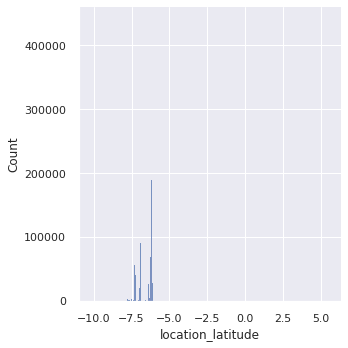

<Figure size 1440x1440 with 0 Axes>

In [ ]:
sns.displot(df_pl['location_latitude'])
plt.figure(figsize=(20, 20))
plt.show()

### **location_longitude  (Numerical)**

location_longitude = titik longitude tempat yang dikunjungi

In [ ]:
for i in df_pl['location_longitude'].unique():
  if type(i) == str:
    if i in df_pl['locationAddress']:
      df_pl[df_pl['location_longitude'] == i]['location_longitude'] = df_pl[df_pl['locationAddress'] == i]['location_longitude']
    else:
      print(i)
      print("Tidak Ada yang sama")

In [ ]:
np.unique(df_pl['location_longitude'])

array([ 95.331039  ,  95.331044  ,  98.67465614, ..., 128.088863  ,
       128.0891    , 140.5128    ])

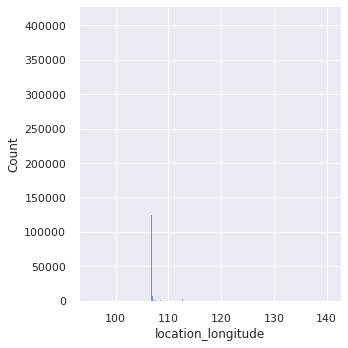

<Figure size 1440x1440 with 0 Axes>

In [ ]:
sns.displot(df_pl['location_longitude'])
plt.figure(figsize=(20, 20))
plt.show()

### **crowd**

crowd = banyaknya kerumunan saat cekin di suatu tempat

In [ ]:
np.unique(df_pl['crowd'])

array([     0,      1,      2, ..., 265410, 272904, 285365])

### **status**

status = status data (1=valid, 0=tidak valid)

In [ ]:
np.unique(df_pl['status'])

array([1])

### **userStatus**

userStatus = status warna seseorang saat mengunjungi suatu tempat (hijau/merah/hitam/kuning)

	- hijau: sudah vaksin 2x
	- merah: belum vaksin
	- hitam: positif 
	- kuning: baru vaksin 1x

In [ ]:
np.unique(df_pl['userStatus'])

array(['green', 'red', 'yellow'], dtype=object)

In [ ]:
df_pl['userStatus'].value_counts()

green     2760651
yellow     767759
red         80904
Name: userStatus, dtype: int64

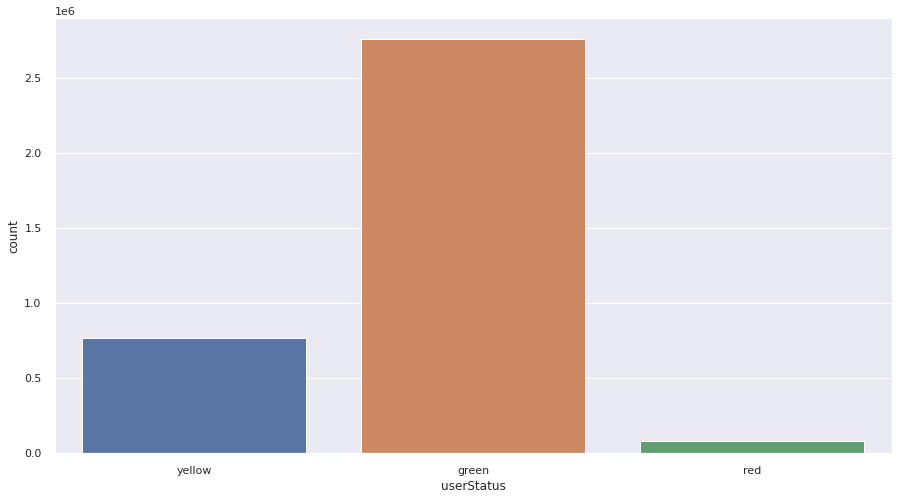

<Figure size 1440x1440 with 0 Axes>

In [ ]:
sns.countplot(x='userStatus', data=df_pl)
plt.figure(figsize=(20, 20))
plt.show()

### **updatedAt**

updatedAt = waktu update data

In [ ]:
np.unique(df_pl['updatedAt'])

array(['2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08',
       '2021-07-09', '2021-07-10', '2021-07-11', '2021-07-12',
       '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16',
       '2021-07-17', '2021-07-18', '2021-07-19', '2021-07-20',
       '2021-07-21', '2021-07-22', '2021-07-23', '2021-07-24',
       '2021-07-25', '2021-07-26', '2021-07-27', '2021-07-28',
       '2021-07-29', '2021-07-30', '2021-07-31', '2021-08-01',
       '2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05',
       '2021-08-06', '2021-08-07', '2021-08-08', '2021-08-09',
       '2021-08-10', '2021-08-11', '2021-08-12', '2021-08-13',
       '2021-08-14', '2021-08-15', '2021-08-16', '2021-08-17',
       '2021-08-18', '2021-08-19', '2021-08-20', '2021-08-21',
       '2021-08-22', '2021-08-23', '2021-08-24'], dtype=object)

### **createdAt**

createdAt = waktu pembuatan data

In [ ]:
np.unique(df_pl['createdAt'])

array(['2021-07-03', '2021-07-04', '2021-07-05', '2021-07-06',
       '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-10',
       '2021-07-11', '2021-07-12', '2021-07-13', '2021-07-14',
       '2021-07-16', '2021-07-17', '2021-07-18', '2021-07-19',
       '2021-07-20', '2021-07-21', '2021-07-22', '2021-07-23',
       '2021-07-24', '2021-07-25', '2021-07-26', '2021-07-27',
       '2021-07-28', '2021-07-29', '2021-07-30', '2021-08-01',
       '2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05',
       '2021-08-06', '2021-08-07', '2021-08-08', '2021-08-09',
       '2021-08-11', '2021-08-13', '2021-08-15', '2021-08-17',
       '2021-08-19', '2021-08-21', '2021-08-23'], dtype=object)

## **Make vaksinStatus from userStatus**

In [ ]:
df_pl.head()

,sid,userId,user_status,checkInTime,checkOutTime,place_name,place_categoryName,locationAddress,location_latitude,location_longitude,crowd,status,userStatus,updatedAt,createdAt
8,60f49257c8948d0cd01751d7,f2655420-d183-11eb-b38f-c9cfd4f6bf1c,NOT POSITIVE,2021-07-18,2021-07-19,CGK - Main Gate Entrance - 3,Gedung,Terminal 3 RT.001/RW.010 Pajang Benda Kota Tan...,-6.119108,106.664222,141,1,yellow,2021-07-19,2021-07-18
9,60f4df6336a60b94b5488a7d,796a6b60-e82a-11eb-a626-692cd0692ddf,NOT POSITIVE,2021-07-19,2021-07-19,BNI BAJERA,Gedung,RUKO BAJERA JL. NGURAH RAI - DENPASAR,-8.503062,115.027762,2,1,yellow,2021-07-19,2021-07-19
10,60f8fdf951338da2c37ca942,5c15c070-80a5-11ea-8113-f9d0dd9176a2,NOT POSITIVE,2021-07-22,2021-07-23,CGK - Main Gate Entrance - 5,Gedung,Terminal 3 RT.001/RW.010 Pajang Benda Kota Tan...,-6.119110,106.664168,35,1,green,2021-07-23,2021-07-22
11,60ff3d9938602070ee1bd854,660e8420-7193-11ea-a650-87080ae56964,NOT POSITIVE,2021-07-26,2021-07-27,YIA-Pintu-Masuk-Terminal,Bandara,Jl. Wates - Purworejo No.Km. 42 Area Kebun Gla...,-7.897897,110.059511,32,1,green,2021-07-27,2021-07-26
12,61034dc036a60b94b5488b71,dcb6a8d0-f06a-11eb-abf9-67e5f4cad68f,NOT POSITIVE,2021-07-30,2021-07-30,SRG-Terminal-Entrance,Bandara,Jalan Bandara Ahmad Yani Tambakharjo Semarang ...,-6.966105,110.375283,5,1,green,2021-07-30,2021-07-30


In [ ]:
df_pl.columns

Index(['sid', 'userId', 'user_status', 'checkInTime', 'checkOutTime',
       'place_name', 'place_categoryName', 'locationAddress',
       'location_latitude', 'location_longitude', 'crowd', 'status',
       'userStatus', 'updatedAt', 'createdAt'],
      dtype='object')

userStatus = status warna seseorang saat mengunjungi suatu tempat (hijau/merah/hitam/kuning)

	- hijau: sudah vaksin 2x
	- merah: belum vaksin
	- hitam: positif 
	- kuning: baru vaksin 1x

hijau, kuning --> sudah vaksin

hitam, merah --> belum vaksin

In [ ]:
def vaksinTestStatus(s):
    if (s['userStatus'] == "green") or (s['userStatus'] == "yellow"):
        return "Sudah Vaksin"
    else:
        return "Belum Vaksin"

In [ ]:
df_pl['vaksinTestStatus'] = df_pl.apply(vaksinTestStatus, axis=1)

In [ ]:
df_pl[df_pl['userStatus'] == "green"].head()

,sid,userId,user_status,checkInTime,checkOutTime,place_name,place_categoryName,locationAddress,location_latitude,location_longitude,crowd,status,userStatus,updatedAt,createdAt,vaksinTestStatus
10,60f8fdf951338da2c37ca942,5c15c070-80a5-11ea-8113-f9d0dd9176a2,NOT POSITIVE,2021-07-22,2021-07-23,CGK - Main Gate Entrance - 5,Gedung,Terminal 3 RT.001/RW.010 Pajang Benda Kota Tan...,-6.119110,106.664168,35,1,green,2021-07-23,2021-07-22,Sudah Vaksin
11,60ff3d9938602070ee1bd854,660e8420-7193-11ea-a650-87080ae56964,NOT POSITIVE,2021-07-26,2021-07-27,YIA-Pintu-Masuk-Terminal,Bandara,Jl. Wates - Purworejo No.Km. 42 Area Kebun Gla...,-7.897897,110.059511,32,1,green,2021-07-27,2021-07-26,Sudah Vaksin
12,61034dc036a60b94b5488b71,dcb6a8d0-f06a-11eb-abf9-67e5f4cad68f,NOT POSITIVE,2021-07-30,2021-07-30,SRG-Terminal-Entrance,Bandara,Jalan Bandara Ahmad Yani Tambakharjo Semarang ...,-6.966105,110.375283,5,1,green,2021-07-30,2021-07-30,Sudah Vaksin
13,610352405c9b78f825f31525,263be6d0-f072-11eb-a61e-b9038ccd2944,NOT POSITIVE,2021-07-30,2021-07-30,SRG-Terminal-Entrance,Bandara,Jalan Bandara Ahmad Yani Tambakharjo Semarang ...,-6.966105,110.375283,3,1,green,2021-07-30,2021-07-30,Sudah Vaksin
21,61090fa938748695bc95ea71,34b83be0-c7fb-11eb-ba63-6d6bec274177,NOT POSITIVE,2021-08-03,2021-08-04,Lippo Mall Puri,Mall,Puri Indah CBD Jl. Puri Indah Raya Blok U 1 Ke...,-6.187259,106.739046,62,1,green,2021-08-04,2021-08-03,Sudah Vaksin


In [ ]:
df_pl[df_pl['userStatus'] == "yellow"].head()

,sid,userId,user_status,checkInTime,checkOutTime,place_name,place_categoryName,locationAddress,location_latitude,location_longitude,crowd,status,userStatus,updatedAt,createdAt,vaksinTestStatus
8,60f49257c8948d0cd01751d7,f2655420-d183-11eb-b38f-c9cfd4f6bf1c,NOT POSITIVE,2021-07-18,2021-07-19,CGK - Main Gate Entrance - 3,Gedung,Terminal 3 RT.001/RW.010 Pajang Benda Kota Tan...,-6.119108,106.664222,141,1,yellow,2021-07-19,2021-07-18,Sudah Vaksin
9,60f4df6336a60b94b5488a7d,796a6b60-e82a-11eb-a626-692cd0692ddf,NOT POSITIVE,2021-07-19,2021-07-19,BNI BAJERA,Gedung,RUKO BAJERA JL. NGURAH RAI - DENPASAR,-8.503062,115.027762,2,1,yellow,2021-07-19,2021-07-19,Sudah Vaksin
14,61036670bac23799277a5c5a,7b473460-ca5f-11eb-a0b1-1701bc19c71e,NOT POSITIVE,2021-07-30,2021-07-30,BNI CANGGU,Gedung,JL. RAYA CANGGU-BADUNG,-8.642995,115.155647,13,1,yellow,2021-07-30,2021-07-30,Sudah Vaksin
15,610744d8347610d2327f9bf9,f4d9c020-7f94-11ea-af9a-392466bcdc51,NOT POSITIVE,2021-08-02,2021-08-03,BNI SANUR BALIMOON,Gedung,JL. DANAU TOBA NO.15 SANUR DENPASAR,-8.683162,115.260588,176,1,yellow,2021-08-03,2021-08-02,Sudah Vaksin
16,61089ca7347610d2327f9d89,b64efbc0-df1c-11eb-a533-6d8f15774b63,NOT POSITIVE,2021-08-03,2021-08-04,Graha Lippo,Gedung,Jln. Bolevard Diponegoro No. 101 Lippo Village...,-6.227072,106.609487,92,1,yellow,2021-08-04,2021-08-03,Sudah Vaksin


In [ ]:
df_pl[df_pl['userStatus'] == "red"]

,sid,userId,user_status,checkInTime,checkOutTime,place_name,place_categoryName,locationAddress,location_latitude,location_longitude,crowd,status,userStatus,updatedAt,createdAt,vaksinTestStatus
145,6104478c4e2a0119992fc7fe,f20baad0-edb0-11eb-ad27-736253fa9279,NOT POSITIVE,2021-07-30,2021-07-31,CGK - Main Gate Entrance - E,Gedung,Terminal 2E RT.001/RW.010 Pajang Benda Kota Ta...,-6.121412,106.652012,147,1,red,2021-07-31,2021-07-30,Belum Vaksin
156,6109fab0c38870572b3091bb,a39fc020-eee1-11eb-87e0-4f6bba1c4b0b,NOT POSITIVE,2021-08-04,2021-08-04,Graha Lippo,Gedung,Jln. Bolevard Diponegoro No. 101 Lippo Village...,-6.227072,106.609487,17,1,red,2021-08-04,2021-08-04,Belum Vaksin
295,6107d6c4094a4479023eb63a,5bc69100-a316-11eb-8aa1-81469475da8b,NOT POSITIVE,2021-08-02,2021-08-02,Lippo Mall Puri,Mall,Puri Indah CBD Jl. Puri Indah Raya Blok U 1 Ke...,-6.187233,106.739074,73,1,red,2021-08-02,2021-08-02,Belum Vaksin
449,6109c222730658f4f992e552,dc4e2c60-f051-11eb-a9d3-3bda3da82262,NOT POSITIVE,2021-08-03,2021-08-04,Lippo Kuningan,Gedung,JALAN HAJI R.RASUNA SAID KAV.B12 RT.6/RW.7 KAR...,-6.217001,106.830203,11,1,red,2021-08-03,2021-08-03,Belum Vaksin
589,610cc4089d7665da24f055d1,cd9e4b90-9be9-11ea-baaa-3f8c9d207b25,NOT POSITIVE,2021-08-06,2021-08-06,Lippo Plaza Jember,Mall,Jl. Gajah Mada No. 106 Kb. Kidul Jember Kidul ...,-8.173774,113.687744,2,1,red,2021-08-06,2021-08-06,Belum Vaksin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945432,61236d2f3c33ba8ef4e9aa9f,43ef4880-f9a4-11eb-8623-090f84d42efa,NOT POSITIVE,2021-08-23,2021-08-23,Pakuwon Mall Pakuwon Trade Center,Mall,Puncak Indah Lontar No. 2 Surabaya - 60216,-7.290197,112.675406,4667,1,red,2021-08-23,2021-08-23,Belum Vaksin
3945434,61237a0cda8e9e7d54f289be,92255650-025c-11ec-a281-77761e6d2bc4,NOT POSITIVE,2021-08-23,2021-08-23,Pakuwon Mall Pakuwon Trade Center,Mall,Puncak Indah Lontar No. 2 Surabaya - 60216,-7.287987,112.676520,4778,1,red,2021-08-23,2021-08-23,Belum Vaksin
3945468,612356cd3919a1d1659850a7,d7bbc5b0-f996-11eb-a5a0-fdd5135b9772,NOT POSITIVE,2021-08-23,2021-08-23,Pakuwon Mall Pakuwon Trade Center,Mall,Puncak Indah Lontar No. 2 Surabaya - 60216,-7.289510,112.673265,4585,1,red,2021-08-23,2021-08-23,Belum Vaksin
3945495,61236b8f07917532289d776b,5a882c00-0139-11ec-9802-5fba196327d6,NOT POSITIVE,2021-08-23,2021-08-23,Pakuwon Mall Pakuwon Trade Center,Mall,Puncak Indah Lontar No. 2 Surabaya - 60216,-7.289436,112.673963,4681,1,red,2021-08-23,2021-08-23,Belum Vaksin


In [ ]:
df_pl[df_pl['userStatus'] == "black"]

,sid,userId,user_status,checkInTime,checkOutTime,place_name,place_categoryName,locationAddress,location_latitude,location_longitude,crowd,status,userStatus,updatedAt,createdAt,vaksinTestStatus


In [ ]:
df_pl['userStatus'].unique()

array(['yellow', 'green', 'red'], dtype=object)

In [ ]:
df_pl.columns

Index(['sid', 'userId', 'user_status', 'checkInTime', 'checkOutTime',
       'place_name', 'place_categoryName', 'locationAddress',
       'location_latitude', 'location_longitude', 'crowd', 'status',
       'userStatus', 'updatedAt', 'createdAt', 'vaksinTestStatus'],
      dtype='object')

In [ ]:
new_columns = ['sid', 'userId', 'user_status', 'checkInTime', 'checkOutTime',
       'place_name', 'place_categoryName', 'locationAddress',
       'location_latitude', 'location_longitude', 'crowd', 'status',
       'userStatus', 'vaksinTestStatus', 'updatedAt', 'createdAt']

df_pl = df_pl[new_columns]
# df_pl=df_pl.reindex(columns=new_columns)

In [ ]:
df_pl.head()

,sid,userId,user_status,checkInTime,checkOutTime,place_name,place_categoryName,locationAddress,location_latitude,location_longitude,crowd,status,userStatus,vaksinTestStatus,updatedAt,createdAt
8,60f49257c8948d0cd01751d7,f2655420-d183-11eb-b38f-c9cfd4f6bf1c,NOT POSITIVE,2021-07-18,2021-07-19,CGK - Main Gate Entrance - 3,Gedung,Terminal 3 RT.001/RW.010 Pajang Benda Kota Tan...,-6.119108,106.664222,141,1,yellow,Sudah Vaksin,2021-07-19,2021-07-18
9,60f4df6336a60b94b5488a7d,796a6b60-e82a-11eb-a626-692cd0692ddf,NOT POSITIVE,2021-07-19,2021-07-19,BNI BAJERA,Gedung,RUKO BAJERA JL. NGURAH RAI - DENPASAR,-8.503062,115.027762,2,1,yellow,Sudah Vaksin,2021-07-19,2021-07-19
10,60f8fdf951338da2c37ca942,5c15c070-80a5-11ea-8113-f9d0dd9176a2,NOT POSITIVE,2021-07-22,2021-07-23,CGK - Main Gate Entrance - 5,Gedung,Terminal 3 RT.001/RW.010 Pajang Benda Kota Tan...,-6.119110,106.664168,35,1,green,Sudah Vaksin,2021-07-23,2021-07-22
11,60ff3d9938602070ee1bd854,660e8420-7193-11ea-a650-87080ae56964,NOT POSITIVE,2021-07-26,2021-07-27,YIA-Pintu-Masuk-Terminal,Bandara,Jl. Wates - Purworejo No.Km. 42 Area Kebun Gla...,-7.897897,110.059511,32,1,green,Sudah Vaksin,2021-07-27,2021-07-26
12,61034dc036a60b94b5488b71,dcb6a8d0-f06a-11eb-abf9-67e5f4cad68f,NOT POSITIVE,2021-07-30,2021-07-30,SRG-Terminal-Entrance,Bandara,Jalan Bandara Ahmad Yani Tambakharjo Semarang ...,-6.966105,110.375283,5,1,green,Sudah Vaksin,2021-07-30,2021-07-30


In [ ]:
df_pl.isna().sum()

sid                   0
userId                0
user_status           0
checkInTime           0
checkOutTime          0
place_name            0
place_categoryName    0
locationAddress       0
location_latitude     0
location_longitude    0
crowd                 0
status                0
userStatus            0
vaksinTestStatus      0
updatedAt             0
createdAt             0
dtype: int64

In [ ]:
df_pl.duplicated().sum()

0

## **Save Data Clean Peduli Lindungi**

In [ ]:
df_pl.reset_index(inplace = True, drop = True)
df_pl.head()

,sid,userId,user_status,checkInTime,checkOutTime,place_name,place_categoryName,locationAddress,location_latitude,location_longitude,crowd,status,userStatus,vaksinTestStatus,updatedAt,createdAt
0,60f49257c8948d0cd01751d7,f2655420-d183-11eb-b38f-c9cfd4f6bf1c,NOT POSITIVE,2021-07-18,2021-07-19,CGK - Main Gate Entrance - 3,Gedung,Terminal 3 RT.001/RW.010 Pajang Benda Kota Tan...,-6.119108,106.664222,141,1,yellow,Sudah Vaksin,2021-07-19,2021-07-18
1,60f4df6336a60b94b5488a7d,796a6b60-e82a-11eb-a626-692cd0692ddf,NOT POSITIVE,2021-07-19,2021-07-19,BNI BAJERA,Gedung,RUKO BAJERA JL. NGURAH RAI - DENPASAR,-8.503062,115.027762,2,1,yellow,Sudah Vaksin,2021-07-19,2021-07-19
2,60f8fdf951338da2c37ca942,5c15c070-80a5-11ea-8113-f9d0dd9176a2,NOT POSITIVE,2021-07-22,2021-07-23,CGK - Main Gate Entrance - 5,Gedung,Terminal 3 RT.001/RW.010 Pajang Benda Kota Tan...,-6.119110,106.664168,35,1,green,Sudah Vaksin,2021-07-23,2021-07-22
3,60ff3d9938602070ee1bd854,660e8420-7193-11ea-a650-87080ae56964,NOT POSITIVE,2021-07-26,2021-07-27,YIA-Pintu-Masuk-Terminal,Bandara,Jl. Wates - Purworejo No.Km. 42 Area Kebun Gla...,-7.897897,110.059511,32,1,green,Sudah Vaksin,2021-07-27,2021-07-26
4,61034dc036a60b94b5488b71,dcb6a8d0-f06a-11eb-abf9-67e5f4cad68f,NOT POSITIVE,2021-07-30,2021-07-30,SRG-Terminal-Entrance,Bandara,Jalan Bandara Ahmad Yani Tambakharjo Semarang ...,-6.966105,110.375283,5,1,green,Sudah Vaksin,2021-07-30,2021-07-30


In [ ]:
df_pl.to_csv('scanPeduliLindungi-Clean.csv', index=False)


## **Save month 7 and month 8**

In [ ]:
import pandas as pd
df_plc = pd.read_csv('scanPeduliLindungi-Clean.csv')
df_plc.head()

,sid,userId,user_status,checkInTime,checkOutTime,place_name,place_categoryName,locationAddress,location_latitude,location_longitude,crowd,status,userStatus,vaksinTestStatus,updatedAt,createdAt
0,60f49257c8948d0cd01751d7,f2655420-d183-11eb-b38f-c9cfd4f6bf1c,NOT POSITIVE,2021-07-18,2021-07-19,CGK - Main Gate Entrance - 3,Gedung,Terminal 3 RT.001/RW.010 Pajang Benda Kota Tan...,-6.119108,106.664222,141,1,yellow,Sudah Vaksin,2021-07-19,2021-07-18
1,60f4df6336a60b94b5488a7d,796a6b60-e82a-11eb-a626-692cd0692ddf,NOT POSITIVE,2021-07-19,2021-07-19,BNI BAJERA,Gedung,RUKO BAJERA JL. NGURAH RAI - DENPASAR,-8.503062,115.027762,2,1,yellow,Sudah Vaksin,2021-07-19,2021-07-19
2,60f8fdf951338da2c37ca942,5c15c070-80a5-11ea-8113-f9d0dd9176a2,NOT POSITIVE,2021-07-22,2021-07-23,CGK - Main Gate Entrance - 5,Gedung,Terminal 3 RT.001/RW.010 Pajang Benda Kota Tan...,-6.119110,106.664168,35,1,green,Sudah Vaksin,2021-07-23,2021-07-22
3,60ff3d9938602070ee1bd854,660e8420-7193-11ea-a650-87080ae56964,NOT POSITIVE,2021-07-26,2021-07-27,YIA-Pintu-Masuk-Terminal,Bandara,Jl. Wates - Purworejo No.Km. 42 Area Kebun Gla...,-7.897897,110.059511,32,1,green,Sudah Vaksin,2021-07-27,2021-07-26
4,61034dc036a60b94b5488b71,dcb6a8d0-f06a-11eb-abf9-67e5f4cad68f,NOT POSITIVE,2021-07-30,2021-07-30,SRG-Terminal-Entrance,Bandara,Jalan Bandara Ahmad Yani Tambakharjo Semarang ...,-6.966105,110.375283,5,1,green,Sudah Vaksin,2021-07-30,2021-07-30


In [ ]:
date_col = ["checkInTime", "checkOutTime", "updatedAt", "createdAt"]
for x in date_col:
  df_plc[x] = pd.to_datetime(df_plc[x])

In [ ]:
df_plc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609314 entries, 0 to 3609313
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   sid                 object        
 1   userId              object        
 2   user_status         object        
 3   checkInTime         datetime64[ns]
 4   checkOutTime        datetime64[ns]
 5   place_name          object        
 6   place_categoryName  object        
 7   locationAddress     object        
 8   location_latitude   float64       
 9   location_longitude  float64       
 10  crowd               int64         
 11  status              int64         
 12  userStatus          object        
 13  vaksinTestStatus    object        
 14  updatedAt           datetime64[ns]
 15  createdAt           datetime64[ns]
dtypes: datetime64[ns](4), float64(2), int64(2), object(8)
memory usage: 440.6+ MB


In [ ]:
start_date = '2021-07-01'
end_date = '2021-08-31'
mask = (df_plc['createdAt'] >= start_date) & (df_plc['createdAt'] <= end_date)
df_plc = df_plc.loc[mask]
df_plc.head()

,sid,userId,user_status,checkInTime,checkOutTime,place_name,place_categoryName,locationAddress,location_latitude,location_longitude,crowd,status,userStatus,vaksinTestStatus,updatedAt,createdAt
0,60f49257c8948d0cd01751d7,f2655420-d183-11eb-b38f-c9cfd4f6bf1c,NOT POSITIVE,2021-07-18,2021-07-19,CGK - Main Gate Entrance - 3,Gedung,Terminal 3 RT.001/RW.010 Pajang Benda Kota Tan...,-6.119108,106.664222,141,1,yellow,Sudah Vaksin,2021-07-19,2021-07-18
1,60f4df6336a60b94b5488a7d,796a6b60-e82a-11eb-a626-692cd0692ddf,NOT POSITIVE,2021-07-19,2021-07-19,BNI BAJERA,Gedung,RUKO BAJERA JL. NGURAH RAI - DENPASAR,-8.503062,115.027762,2,1,yellow,Sudah Vaksin,2021-07-19,2021-07-19
2,60f8fdf951338da2c37ca942,5c15c070-80a5-11ea-8113-f9d0dd9176a2,NOT POSITIVE,2021-07-22,2021-07-23,CGK - Main Gate Entrance - 5,Gedung,Terminal 3 RT.001/RW.010 Pajang Benda Kota Tan...,-6.119110,106.664168,35,1,green,Sudah Vaksin,2021-07-23,2021-07-22
3,60ff3d9938602070ee1bd854,660e8420-7193-11ea-a650-87080ae56964,NOT POSITIVE,2021-07-26,2021-07-27,YIA-Pintu-Masuk-Terminal,Bandara,Jl. Wates - Purworejo No.Km. 42 Area Kebun Gla...,-7.897897,110.059511,32,1,green,Sudah Vaksin,2021-07-27,2021-07-26
4,61034dc036a60b94b5488b71,dcb6a8d0-f06a-11eb-abf9-67e5f4cad68f,NOT POSITIVE,2021-07-30,2021-07-30,SRG-Terminal-Entrance,Bandara,Jalan Bandara Ahmad Yani Tambakharjo Semarang ...,-6.966105,110.375283,5,1,green,Sudah Vaksin,2021-07-30,2021-07-30


In [ ]:
np.sort(df_plc["createdAt"].unique())

array(['2021-07-03T00:00:00.000000000', '2021-07-04T00:00:00.000000000',
       '2021-07-05T00:00:00.000000000', '2021-07-06T00:00:00.000000000',
       '2021-07-07T00:00:00.000000000', '2021-07-08T00:00:00.000000000',
       '2021-07-09T00:00:00.000000000', '2021-07-10T00:00:00.000000000',
       '2021-07-11T00:00:00.000000000', '2021-07-12T00:00:00.000000000',
       '2021-07-13T00:00:00.000000000', '2021-07-14T00:00:00.000000000',
       '2021-07-16T00:00:00.000000000', '2021-07-17T00:00:00.000000000',
       '2021-07-18T00:00:00.000000000', '2021-07-19T00:00:00.000000000',
       '2021-07-20T00:00:00.000000000', '2021-07-21T00:00:00.000000000',
       '2021-07-22T00:00:00.000000000', '2021-07-23T00:00:00.000000000',
       '2021-07-24T00:00:00.000000000', '2021-07-25T00:00:00.000000000',
       '2021-07-26T00:00:00.000000000', '2021-07-27T00:00:00.000000000',
       '2021-07-28T00:00:00.000000000', '2021-07-29T00:00:00.000000000',
       '2021-07-30T00:00:00.000000000', '2021-08-01

In [ ]:
df_plc.to_csv('scanPeduliLindungi-Clean0708.csv', index=False)
df_plc.to_csv('/content/drive/MyDrive/Colab Notebooks/Data Science   Data Analyst/DSLS/Materials/Capstone Project/Dataset/Data DTO/scanPeduliLindungi-Clean0708.csv', index=False)

In [6]:
import pandas as pd
df_plc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science   Data Analyst/DSLS/Materials/Capstone Project/Dataset/Data DTO/scanPeduliLindungi-Clean0708.csv')
df_plc.head()

,sid,userId,user_status,checkInTime,checkOutTime,place_name,place_categoryName,locationAddress,location_latitude,location_longitude,crowd,status,userStatus,vaksinTestStatus,updatedAt,createdAt
0,60f49257c8948d0cd01751d7,f2655420-d183-11eb-b38f-c9cfd4f6bf1c,NOT POSITIVE,2021-07-18,2021-07-19,CGK - Main Gate Entrance - 3,Gedung,Terminal 3 RT.001/RW.010 Pajang Benda Kota Tan...,-6.119108,106.664222,141,1,yellow,Sudah Vaksin,2021-07-19,2021-07-18
1,60f4df6336a60b94b5488a7d,796a6b60-e82a-11eb-a626-692cd0692ddf,NOT POSITIVE,2021-07-19,2021-07-19,BNI BAJERA,Gedung,RUKO BAJERA JL. NGURAH RAI - DENPASAR,-8.503062,115.027762,2,1,yellow,Sudah Vaksin,2021-07-19,2021-07-19
2,60f8fdf951338da2c37ca942,5c15c070-80a5-11ea-8113-f9d0dd9176a2,NOT POSITIVE,2021-07-22,2021-07-23,CGK - Main Gate Entrance - 5,Gedung,Terminal 3 RT.001/RW.010 Pajang Benda Kota Tan...,-6.119110,106.664168,35,1,green,Sudah Vaksin,2021-07-23,2021-07-22
3,60ff3d9938602070ee1bd854,660e8420-7193-11ea-a650-87080ae56964,NOT POSITIVE,2021-07-26,2021-07-27,YIA-Pintu-Masuk-Terminal,Bandara,Jl. Wates - Purworejo No.Km. 42 Area Kebun Gla...,-7.897897,110.059511,32,1,green,Sudah Vaksin,2021-07-27,2021-07-26
4,61034dc036a60b94b5488b71,dcb6a8d0-f06a-11eb-abf9-67e5f4cad68f,NOT POSITIVE,2021-07-30,2021-07-30,SRG-Terminal-Entrance,Bandara,Jalan Bandara Ahmad Yani Tambakharjo Semarang ...,-6.966105,110.375283,5,1,green,Sudah Vaksin,2021-07-30,2021-07-30


In [7]:
df_plc.shape

(3609314, 16)

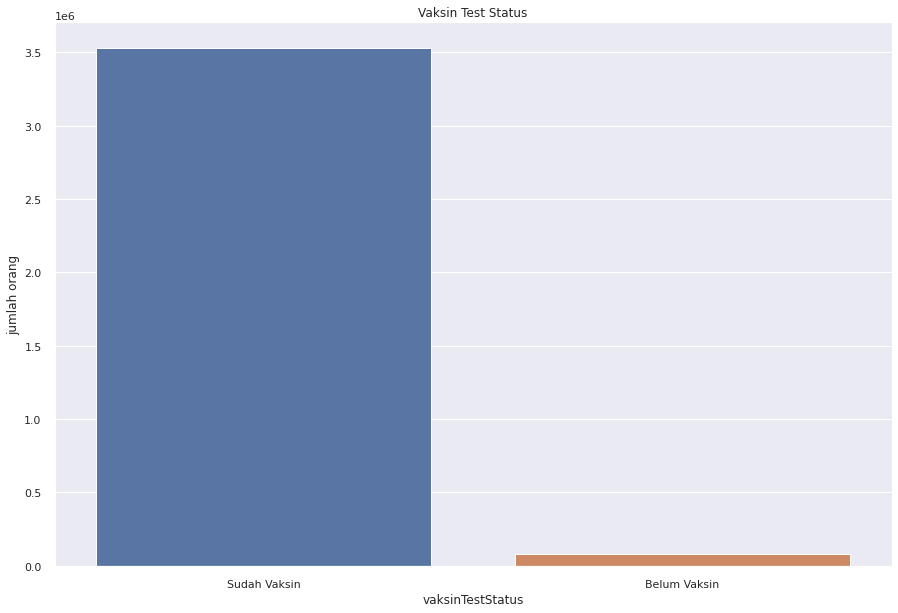

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(x='vaksinTestStatus', data=df_plc)
plt.title('Vaksin Test Status')
plt.xlabel('vaksinTestStatus')
plt.ylabel('jumlah orang')
plt.show()

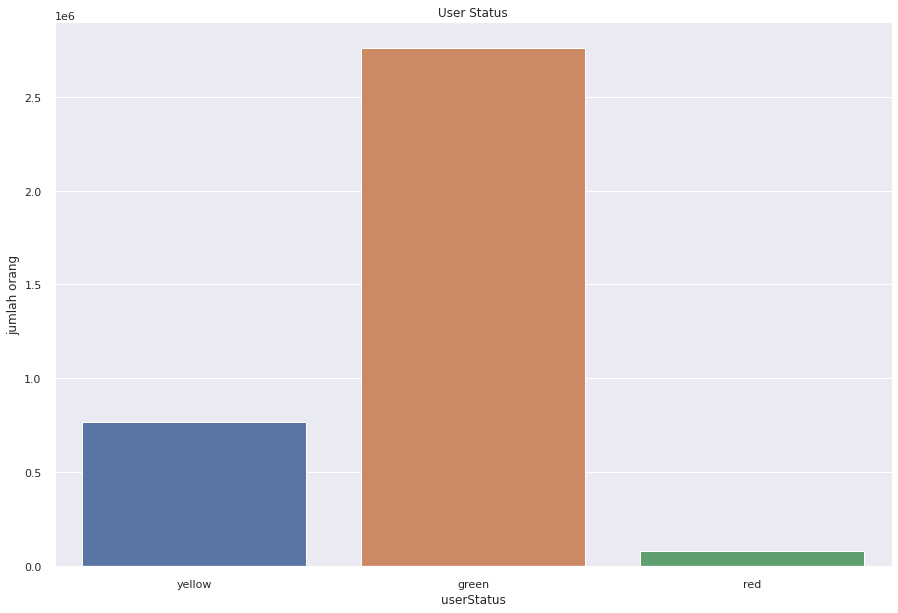

In [12]:
plt.figure(figsize=(15,10))
sns.countplot(x='userStatus', data=df_plc)
plt.title('User Status')
plt.xlabel('userStatus')
plt.ylabel('jumlah orang')
plt.show()

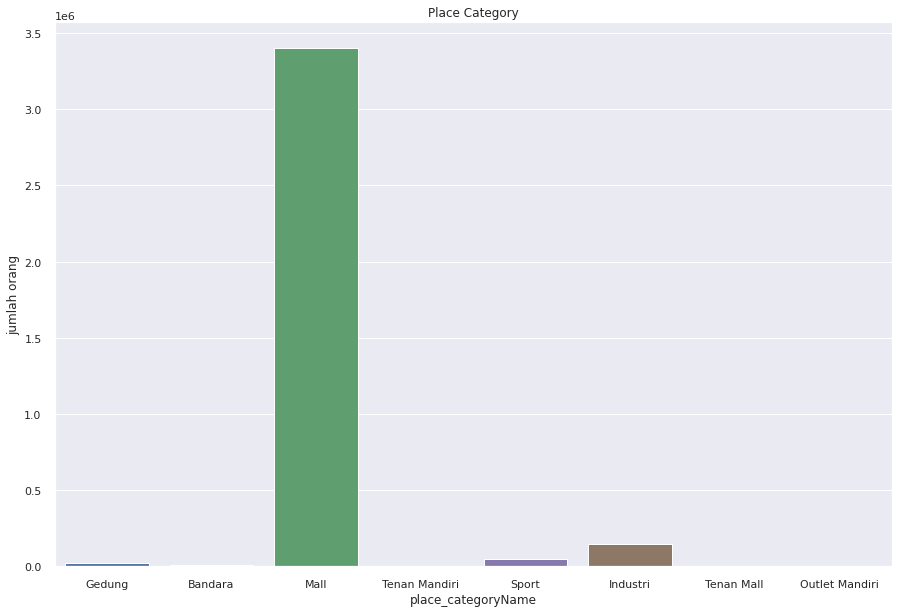

In [11]:
plt.figure(figsize=(15,10))
sns.countplot(x='place_categoryName', data=df_plc)
plt.title('Place Category')
plt.xlabel('place_categoryName')
plt.ylabel('jumlah orang')
plt.show()

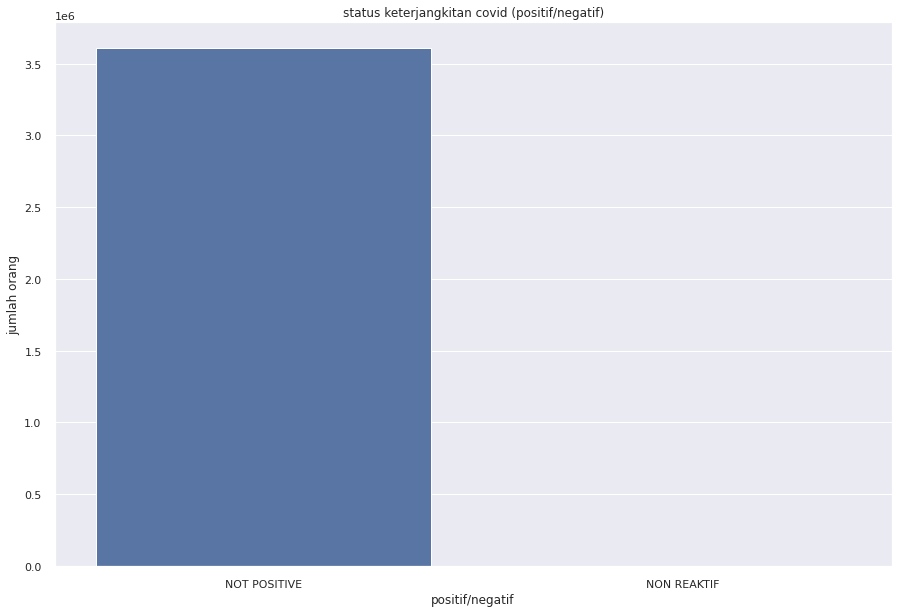

In [10]:
plt.figure(figsize=(15,10))
sns.countplot(x='user_status', data=df_plc)
plt.title('status keterjangkitan covid (positif/negatif)')
plt.xlabel('positif/negatif')
plt.ylabel('jumlah orang')
plt.show()

# **Data Ehac**

Data pengisian form eHac seseorang yang akan melakukan perjalanan

* `sid` : auto generated id
* `createdBy_userId` : auto generated kode user
* `createdAt` : tanggal dibuat (DD-MM-YYYY) / waktu pembuatan data 
* `createdBy_status` : status (not reaktif, not positive, positive) / status keterjangkitan covid (positif/negatif)
* `healthDeclaration_hospitalName` : Nama RS / Nama tempat yang merilis hasil tes
* `healthDeclaration_visitedCountry` : Lokasi (negara) yang merilis hasil tes
* `healthDeclaration_symptoms` : Gejala (bentuknya list) / hasil diagnosa detail dari hasil test
* `personalDetail_travelPurpose` : tujuan travel / tujuan perjalanan dari seseorang (kategori tidak jelas)
* `personalDetail_passportCountry` : asal passport / paspor negara seseorag
* `personalDetail_citizen` : status kewarganegaraan (Indonesia, international, foreign)
* `personalDetail_gender` : jenis kelamin
* `personalDetail_bornDate` : tanggal lahir
* `scan_latitude` : titik latitude tempat yang dikunjung
* `scan_longitude` : titik longitude tempat yang dikunjung
* `travelDetail_transportation_vehicleType` : jenis transportasi / jenis kendaraan yang digunakan untuk perjalanan	
* `travelDetail_destination_cityName` : kota tujuan / nama kota tujuan perjalanan
* `travelDetail_destination_provinceName` : provinsi tujuan / nama provinsi tujuan perjalanan
* `travelDetail_origin_cityName` : kota asal / nama kota asal perjalanan
* `travelDetail_origin_provinceName` : provinsi asal / nama provinsi asal perjalanan
* `typeEhac` : jenis ehac (domestik/international)
* `updatedAt` : tanggal update

## **Load Datasets**

In [ ]:
df_ehac = pd.read_csv("DataEHac.csv")
df_ehac.head()

,sid,createdBy_userId,createdAt,createdBy_status,healthDeclaration_hospitalName,healthDeclaration_visitedCountry,healthDeclaration_symptoms,personalDetail_travelPurpose,personalDetail_passportCountry,personalDetail_citizen,personalDetail_gender,personalDetail_bornDate,scan_latitude,scan_longitude,travelDetail_transportation_vehicleType,travelDetail_destination_cityName,travelDetail_destination_provinceName,travelDetail_origin_cityName,travelDetail_origin_provinceName,typeEhac,updatedAt
0,6135d6652cec4b52128176a7,66242bc0-0eec-11ec-890d-63d6a3558c03,2021-09-06,NOT POSITIVE,Al Arab medical laboratories,Egypt,Tidak ada,Tourism / Leisure / Vacation,Egypt,international,Laki-Laki,1997-03-17,-0.147067,109.404786,By Air,NaN,NaN,NaN,NaN,international,2021-09-06
1,613712ee4230e9d963213bdd,d8807fb0-fd90-11eb-8b12-d7ec5b6c3058,2021-09-07,NOT POSITIVE,Qatar Petroleum Health Center,Qatar,Tidak ada,Business,Indonesia,international,Male,1977-03-23,-6.118872,106.663694,By Air,NaN,NaN,NaN,NaN,international,2021-09-07
2,6137b8beb6a111dd0c590a82,ee6dfce0-0e79-11ec-83da-89d4c6034ad7,2021-09-07,NOT POSITIVE,Istituti Clinici Scientifici Maugeri,NaN,Tidak ada,Tourism / Leisure / Vacation,Indonesia,international,Female,13/02/2002,-6.118879,106.663699,By Air,NaN,NaN,NaN,NaN,international,2021-09-07
3,618fb6d5bff29a7f6f141d5b,c23b92a0-0ac2-11ec-9c31-95ebfb7efbf5,2021-11-13,NOT POSITIVE,Nova Diagnistika,NaN,Tidak ada,Business,Ukraine,international,Female,1993-12-06,-6.265337,106.884579,By Air,NaN,NaN,NaN,NaN,international,2021-11-13
4,615eb4f746e03b60fc854e04,24c9e5f0-6fd5-11ea-9e46-f9b81ceaed99,2021-10-07,NOT POSITIVE,test hospital,NaN,Tidak ada,Business,Brazil,international,Male,05/03/1995,-6.265337,106.884579,By Air,NaN,NaN,NaN,NaN,international,2021-10-07


## **Explore Datasets**

In [ ]:
print('Total rows (Ehac):', df_ehac.shape[0])
print('Total features (Ehac):', df_ehac.shape[1])

Total rows (Ehac): 1604332
Total features (Ehac): 21


In [ ]:
df_ehac.columns

Index(['sid', 'createdBy_userId', 'createdAt', 'createdBy_status',
       'healthDeclaration_hospitalName', 'healthDeclaration_visitedCountry',
       'healthDeclaration_symptoms', 'personalDetail_travelPurpose',
       'personalDetail_passportCountry', 'personalDetail_citizen',
       'personalDetail_gender', 'personalDetail_bornDate', 'scan_latitude',
       'scan_longitude', 'travelDetail_transportation_vehicleType',
       'travelDetail_destination_cityName',
       'travelDetail_destination_provinceName', 'travelDetail_origin_cityName',
       'travelDetail_origin_provinceName', 'typeEhac', 'updatedAt'],
      dtype='object')

In [ ]:
# get the info of each columns
df_ehac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604332 entries, 0 to 1604331
Data columns (total 21 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   sid                                      1604332 non-null  object 
 1   createdBy_userId                         1604332 non-null  object 
 2   createdAt                                1604332 non-null  object 
 3   createdBy_status                         1604332 non-null  object 
 4   healthDeclaration_hospitalName           3777 non-null     object 
 5   healthDeclaration_visitedCountry         334763 non-null   object 
 6   healthDeclaration_symptoms               1507059 non-null  object 
 7   personalDetail_travelPurpose             1596547 non-null  object 
 8   personalDetail_passportCountry           1604332 non-null  object 
 9   personalDetail_citizen                   1597051 non-null  object 
 10  personalDetail_gen

In [ ]:
df_ehac.describe()

,scan_latitude,scan_longitude
count,1.604332e+06,1.604332e+06
mean,-4.817176e+00,1.118598e+02
std,3.163315e+00,8.747368e+00
min,-1.017206e+01,0.000000e+00
25%,-6.966294e+00,1.068846e+02
50%,-6.265337e+00,1.103743e+02
75%,-2.570576e+00,1.151642e+02
max,5.534771e+00,1.407263e+02


## **Missing Value**

In [ ]:
df_ehac.isnull().any()

sid                                        False
createdBy_userId                           False
createdAt                                  False
createdBy_status                           False
healthDeclaration_hospitalName              True
healthDeclaration_visitedCountry            True
healthDeclaration_symptoms                  True
personalDetail_travelPurpose                True
personalDetail_passportCountry             False
personalDetail_citizen                      True
personalDetail_gender                      False
personalDetail_bornDate                    False
scan_latitude                              False
scan_longitude                             False
travelDetail_transportation_vehicleType     True
travelDetail_destination_cityName           True
travelDetail_destination_provinceName       True
travelDetail_origin_cityName                True
travelDetail_origin_provinceName            True
typeEhac                                   False
updatedAt           

In [ ]:
df_ehac.isna().sum()

sid                                              0
createdBy_userId                                 0
createdAt                                        0
createdBy_status                                 0
healthDeclaration_hospitalName             1600555
healthDeclaration_visitedCountry           1269569
healthDeclaration_symptoms                   97273
personalDetail_travelPurpose                  7785
personalDetail_passportCountry                   0
personalDetail_citizen                        7281
personalDetail_gender                            0
personalDetail_bornDate                          0
scan_latitude                                    0
scan_longitude                                   0
travelDetail_transportation_vehicleType      34319
travelDetail_destination_cityName             3777
travelDetail_destination_provinceName         3777
travelDetail_origin_cityName                  3777
travelDetail_origin_provinceName              3777
typeEhac                       

In [ ]:
(100.00 * df_ehac.isnull().sum()) / df_ehac.shape[0]

sid                                         0.000000
createdBy_userId                            0.000000
createdAt                                   0.000000
createdBy_status                            0.000000
healthDeclaration_hospitalName             99.764575
healthDeclaration_visitedCountry           79.133808
healthDeclaration_symptoms                  6.063147
personalDetail_travelPurpose                0.485249
personalDetail_passportCountry              0.000000
personalDetail_citizen                      0.453834
personalDetail_gender                       0.000000
personalDetail_bornDate                     0.000000
scan_latitude                               0.000000
scan_longitude                              0.000000
travelDetail_transportation_vehicleType     2.139146
travelDetail_destination_cityName           0.235425
travelDetail_destination_provinceName       0.235425
travelDetail_origin_cityName                0.235425
travelDetail_origin_provinceName            0.

drop column that have > 50 %

In [ ]:
# Remove nan columns using the same formula
nan_column = ["healthDeclaration_hospitalName","healthDeclaration_visitedCountry"]
df_ehac = df_ehac.drop(nan_column,axis = 1)
df_ehac.columns

Index(['sid', 'createdBy_userId', 'createdAt', 'createdBy_status',
       'healthDeclaration_symptoms', 'personalDetail_travelPurpose',
       'personalDetail_passportCountry', 'personalDetail_citizen',
       'personalDetail_gender', 'personalDetail_bornDate', 'scan_latitude',
       'scan_longitude', 'travelDetail_transportation_vehicleType',
       'travelDetail_destination_cityName',
       'travelDetail_destination_provinceName', 'travelDetail_origin_cityName',
       'travelDetail_origin_provinceName', 'typeEhac', 'updatedAt'],
      dtype='object')

In [ ]:
df_ehac.isna().sum()

sid                                            0
createdBy_userId                               0
createdAt                                      0
createdBy_status                               0
healthDeclaration_symptoms                 97273
personalDetail_travelPurpose                7785
personalDetail_passportCountry                 0
personalDetail_citizen                      7281
personalDetail_gender                          0
personalDetail_bornDate                        0
scan_latitude                                  0
scan_longitude                                 0
travelDetail_transportation_vehicleType    34319
travelDetail_destination_cityName           3777
travelDetail_destination_provinceName       3777
travelDetail_origin_cityName                3777
travelDetail_origin_provinceName            3777
typeEhac                                       0
updatedAt                                      0
dtype: int64

In [ ]:
df_ehac = df_ehac.dropna()

In [ ]:
df_ehac.shape # 1604332

(1470899, 19)

In [ ]:
df_ehac.isna().sum()

sid                                        0
createdBy_userId                           0
createdAt                                  0
createdBy_status                           0
healthDeclaration_symptoms                 0
personalDetail_travelPurpose               0
personalDetail_passportCountry             0
personalDetail_citizen                     0
personalDetail_gender                      0
personalDetail_bornDate                    0
scan_latitude                              0
scan_longitude                             0
travelDetail_transportation_vehicleType    0
travelDetail_destination_cityName          0
travelDetail_destination_provinceName      0
travelDetail_origin_cityName               0
travelDetail_origin_provinceName           0
typeEhac                                   0
updatedAt                                  0
dtype: int64

## **Duplicate Value**

In [ ]:
df_ehac.duplicated().sum()

427

In [ ]:
print(f"Data Frame Dimension Before Duplicate Removal: {df_ehac.shape}")
df_ehac = df_ehac.drop_duplicates()
print(f"Data Frame Dimension After Duplicate Removal: {df_ehac.shape}")

Data Frame Dimension Before Duplicate Removal: (1470899, 19)
Data Frame Dimension After Duplicate Removal: (1470472, 19)


## **Explore Each Columns**

### **sid**

sid = auto generated id

In [ ]:
np.unique(df_ehac['sid'])

array(['60bfe8299266998bedd0f70a', '60c734f09266998bedd0fc92',
       '60e165db5bf24cd531a7b6c6', ..., '61a22bb8322d39592b60e111',
       '61a22bc08ab2cd9c4f24bbb9', '61a22bce8c13d2f5a8382b09'],
      dtype=object)

In [ ]:
sid = df_ehac['sid'].value_counts()
sid

616bcc784d9c4cf98a3fb382    2
617725acaf0bad53d0c00167    2
6184b74492f95f1747708b35    1
619478bb9ab9693f852bc7ea    1
6188db8f6eeb637f1ed755d7    1
                           ..
613c25239050682fca87e13f    1
61775ceb5362de09b931a0ed    1
617888b151c51a63a485b679    1
6190bafb8edd19a06152cd3b    1
613b113840d6fc4c897d05e5    1
Name: sid, Length: 1470470, dtype: int64

In [ ]:
for i in sid:
  if i > 1:
    print("Ada id yang lebih dari 1")
    break;
else:
  print("Semuanya memiliki hanya 1 id")

Ada id yang lebih dari 1


### **createdBy_userId**

createdBy_userId = auto generated kode user

In [ ]:
df_ehac.rename(columns={'createdBy_userId': 'userId'}, inplace=True)

In [ ]:
np.unique(df_ehac['userId'])

array(['00000ca0-265d-11ec-9393-c5d4f5bd5438',
       '00001660-9b65-11eb-b505-6da0e18282c4',
       '00001f50-15d8-11ec-81f0-b9657945ad98', ...,
       'ffffd980-d984-11eb-b12f-3570f239b477',
       'ffffde20-2e76-11ec-ae1a-3744965e0756',
       'fffffe30-fb7e-11eb-bc9c-2b05cafbe4db'], dtype=object)

In [ ]:
user_id = df_pl['userId'].value_counts()
user_id

9f704c40-bdd6-11eb-8f24-cbdbb3fae9e3    136
080fa840-c278-11eb-a437-5334524d3d09    131
0ed73170-ef78-11eb-928d-235e4656812e    124
ca63da30-0191-11ec-85b4-8dbac5cb3a0f    114
6ac0f480-ef73-11eb-b29c-71b598e65505    112
                                       ... 
aced7c50-fae2-11eb-ab36-6d8ff3975426      1
e4efc170-8776-11ea-86a3-7b533d47cc9f      1
875e8f10-928c-11eb-b505-6da0e18282c4      1
d385bf80-deef-11eb-879e-0f8723dc7e95      1
aa3829c0-f2b2-11eb-8b7b-3b3eb81d3933      1
Name: userId, Length: 1570847, dtype: int64

In [ ]:
for i in user_id:
  if i > 1:
    print("Ada id yang lebih dari 1")
    break;
else:
  print("Semuanya memiliki hanya 1 id")

Ada id yang lebih dari 1


### **createdAt**

createdAt = waktu pembuatan data

In [ ]:
np.unique(df_ehac['createdAt'])

array(['2021-06-08', '2021-06-14', '2021-07-04', '2021-07-09',
       '2021-07-10', '2021-07-12', '2021-07-15', '2021-07-16',
       '2021-07-17', '2021-07-18', '2021-07-19', '2021-07-22',
       '2021-07-23', '2021-07-25', '2021-07-26', '2021-07-27',
       '2021-07-30', '2021-08-01', '2021-08-02', '2021-08-03',
       '2021-08-04', '2021-08-05', '2021-08-06', '2021-08-07',
       '2021-08-08', '2021-08-09', '2021-08-10', '2021-08-11',
       '2021-08-12', '2021-08-13', '2021-08-14', '2021-08-15',
       '2021-08-16', '2021-08-17', '2021-08-18', '2021-08-19',
       '2021-08-20', '2021-08-21', '2021-08-22', '2021-08-23',
       '2021-08-24', '2021-08-25', '2021-08-26', '2021-08-27',
       '2021-08-28', '2021-08-29', '2021-08-30', '2021-08-31',
       '2021-09-01', '2021-09-02', '2021-09-03', '2021-09-04',
       '2021-09-05', '2021-09-06', '2021-09-07', '2021-09-08',
       '2021-09-09', '2021-09-10', '2021-09-11', '2021-09-12',
       '2021-09-13', '2021-09-14', '2021-09-15', '2021-

### **createdBy_status**

createdBy_status = status keterjangkitan covid (positif/negatif)

In [ ]:
np.unique(df_ehac['createdBy_status'])

array(['NON REAKTIF', 'NOT POSITIVE', 'POSITIVE'], dtype=object)

In [ ]:
df_ehac['createdBy_status'].value_counts()

NOT POSITIVE    1470461
NON REAKTIF           9
POSITIVE              2
Name: createdBy_status, dtype: int64

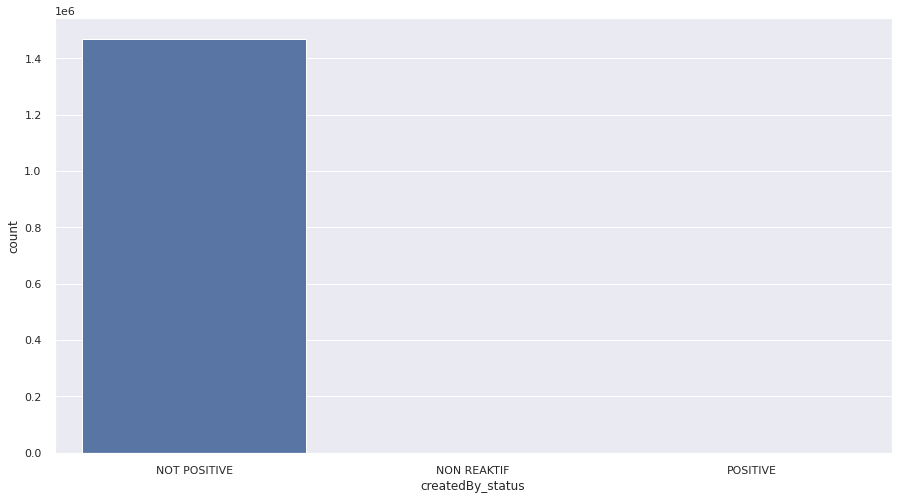

In [ ]:
sns.countplot(x='createdBy_status', data=df_ehac)
plt.show()

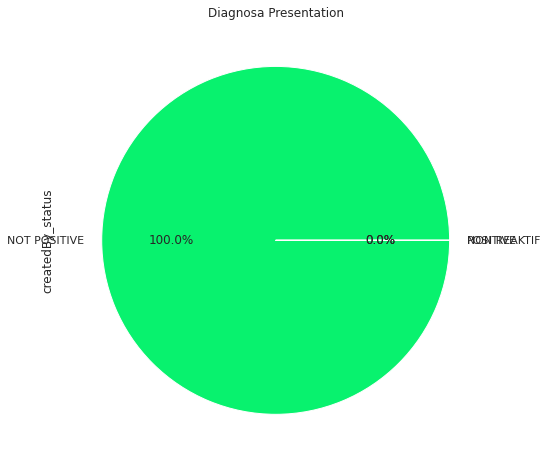

In [ ]:
createdBy_status = df_ehac['createdBy_status'].value_counts()
label =['NOT POSITIVE','NON REAKTIF', 'POSITIVE']
color = ['#08F26E', 'r']
createdBy_status.plot(kind='pie', labels=label, colors=color, autopct='%1.1f%%')
plt.title('Diagnosa Presentation')
plt.show()

### **healthDeclaration_symptoms**

healthDeclaration_symptoms = hasil diagnosa detail dari hasil test

In [ ]:
np.unique(df_ehac['healthDeclaration_symptoms'])

array(['Demam', 'Demam;Diare', 'Demam;Diare;Leher kaku;Mata merah',
       'Demam;Diare;Sesak napas',
       'Demam;Diare;Sesak napas;Mata merah;Leher kaku',
       'Demam;Kejang-Kejang', 'Demam;Kejang-Kejang;Leher kaku;Lainnya',
       'Demam;Kejang-Kejang;Mata kuning',
       'Demam;Kejang-Kejang;Mata kuning;Lainnya',
       'Demam;Kejang-Kejang;Sesak napas', 'Demam;Lainnya',
       'Demam;Lainnya;Ruam kulit;Mata kuning;Kejang-Kejang;Leher kaku;Mata merah;Diare;Sesak napas',
       'Demam;Leher kaku',
       'Demam;Leher kaku;Kejang-Kejang;Mata kuning;Ruam kulit',
       'Demam;Leher kaku;Kejang-Kejang;Mata merah', 'Demam;Mata kuning',
       'Demam;Mata kuning;Sesak napas;Kejang-Kejang', 'Demam;Mata merah',
       'Demam;Mata merah;Lainnya',
       'Demam;Mata merah;Leher kaku;Diare;Ruam kulit;Mata kuning',
       'Demam;Mata merah;Mata kuning;Diare', 'Demam;Ruam kulit',
       'Demam;Ruam kulit;Mata merah;Leher kaku;Kejang-Kejang;Sesak napas',
       'Demam;Ruam kulit;Sesak napas',

### **personalDetail_travelPurpose**

personalDetail_travelPurpose = tujuan perjalanan dari seseorang

In [ ]:
np.unique(df_ehac['personalDetail_travelPurpose'])

array([' ', ' / / ', '+62 812-7246-989',
       'Alamat Mess PT Bandang Mining Coal (BMC) Jl. Jurusan Pelaihari No.12 RT.12 RW.03 Kel. Landasan Ulin Selatan Kec. Liang Anggang Kota Banjarbaru - Kalimantan Selatan.',
       'Alamat kene Jl moh yamin 1 Medan barat Sumatra utara',
       'Alamat ktr lama Jl Dr Samratulangi No 28 Manado kec Wenang kelurahan Wenang Selatan.',
       'Alamat plk: Desa tanjung kajuei kecamatan rungan Gunung Mas Kalimantan tengah',
       'Bima nusa tenggara barat', 'Bisnis', 'Bontang kalimntan timur',
       'Business', 'Dinas', 'Foreign Worker', 'Foreign Workers',
       'Hotel Wyndham Surabaya Jl. Basuki Rahmat No. 67 73 Embong Kaliasin Kec. Genteng Kota Surabaya Jawa Timur 60264',
       'Jakarta',
       'Jalan A. Yani Landasan Ulin Guntungmanggis Kec. Landasan Ulin Kota Banjar Baru Kalimantan Selatan 70721 ',
       'Jawa tengah', 'Jl Nusa indah no 12 p. Siantar',
       'Jl.Pandu II No.1 Tanjung Bungkak Sumerta Kelod Denpasar Timur.',
       'Jl.Tambun 

In [ ]:
df_ehac['personalDetail_travelPurpose'].value_counts()

Business                                                                                                                                                                542654
Tourism / Leisure / Vacation                                                                                                                                            457647
Pariwisata / Waktu luang / Liburan                                                                                                                                      236495
Foreign Workers                                                                                                                                                         149474
Bisnis                                                                                                                                                                   75559
Tenaga kerja asing                                                                                                           

' ', ' / / ', '+62 812-7246-989' --> Ini diapakan yah ?

### **personalDetail_passportCountry**

personalDetail_passportCountry = paspor negara seseorag

In [ ]:
np.unique(df_ehac['personalDetail_passportCountry'])

array(['Global', 'Indonesia'], dtype=object)

In [ ]:
df_ehac['personalDetail_passportCountry'].value_counts()

Indonesia    1458697
Global         11775
Name: personalDetail_passportCountry, dtype: int64

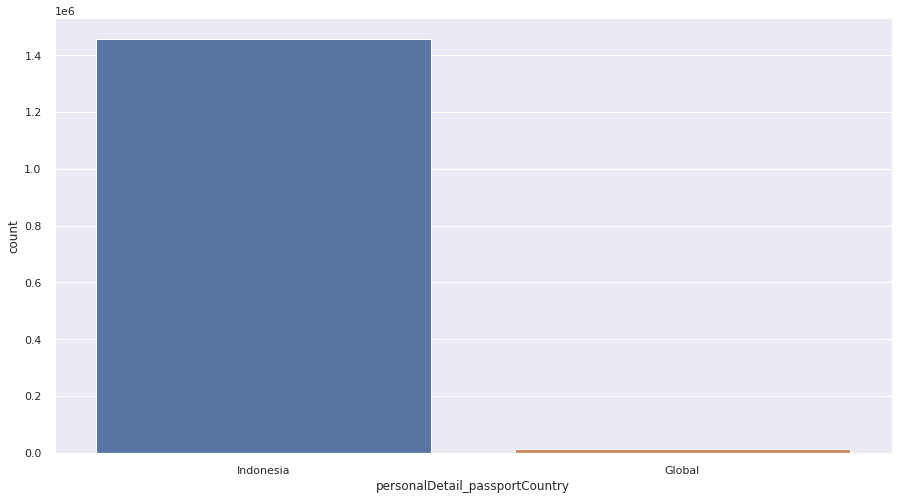

In [ ]:
sns.countplot(x='personalDetail_passportCountry', data=df_ehac)
plt.show()

### **personalDetail_citizen**

personalDetail_citizen	= kewarganegaraan seseorang

In [ ]:
np.unique(df_ehac['personalDetail_citizen'])

array(['Foreign', 'Indonesia'], dtype=object)

In [ ]:
df_ehac['personalDetail_citizen'].value_counts()

Indonesia    1458697
Foreign        11775
Name: personalDetail_citizen, dtype: int64

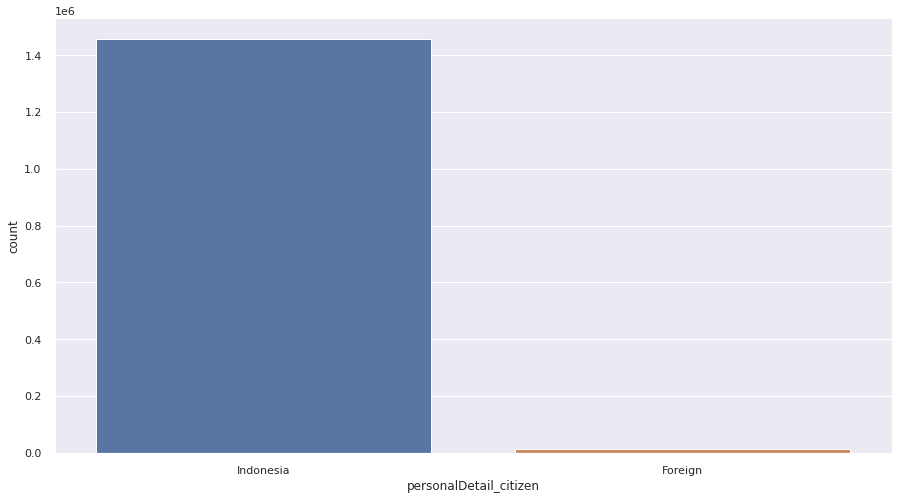

In [ ]:
sns.countplot(x='personalDetail_citizen', data=df_ehac)
plt.show()

### **personalDetail_gender**

personalDetail_gender	= jenis kelamin

In [ ]:
np.unique(df_ehac['personalDetail_gender'])

array(['1671040710650005', 'FEMALE', 'Female', 'Laki-Laki', 'MALE',
       'Male', 'Perempuan', 'female', 'gender', 'male'], dtype=object)

In [ ]:
df_ehac['personalDetail_gender'].value_counts()

Laki-Laki           499266
Male                408625
Perempuan           288291
Female              256226
female                9302
male                  8282
gender                 359
MALE                   101
FEMALE                  19
1671040710650005         1
Name: personalDetail_gender, dtype: int64

In [ ]:
df_ehac = df_ehac[df_ehac['personalDetail_gender'] != "1671040710650005"].reset_index(drop=True)
df_ehac = df_ehac[df_ehac['personalDetail_gender'] != "gender"].reset_index(drop=True)

In [ ]:
df_ehac['personalDetail_gender'] = df_ehac['personalDetail_gender'].replace(['Male', 'male', 'MALE'],'Laki-Laki')
df_ehac['personalDetail_gender'] = df_ehac['personalDetail_gender'].replace(['Female', 'female', 'FEMALE'],'Perempuan')

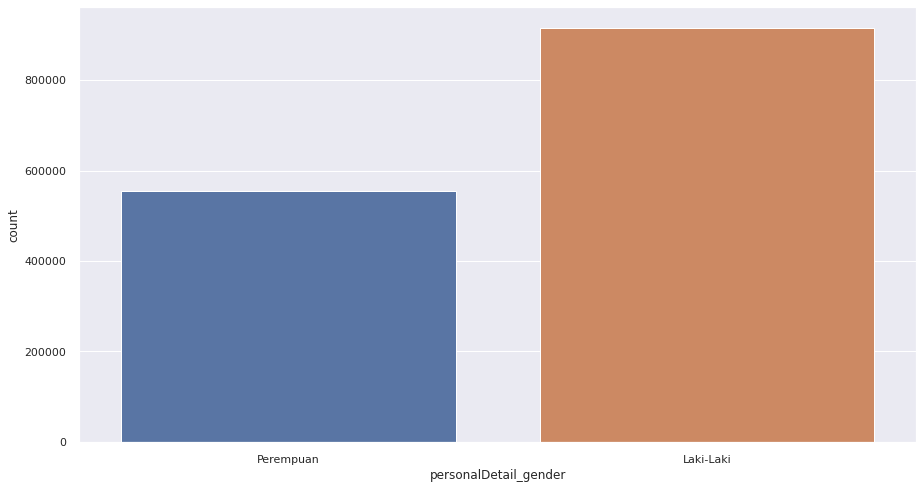

In [ ]:
sns.countplot(x='personalDetail_gender', data=df_ehac)
plt.show()

### **personalDetail_bornDate**

personalDetail_bornDate = tanggal lahir

In [ ]:
import datetime

for i in np.unique(df_ehac['personalDetail_bornDate']):
  try:
    text = datetime.datetime.strptime(
        i.strip().replace(" ", "").replace("- ", "-").replace("_", "-").replace(" - ", "-"), "%Y-%m-%d").strftime('%d/%m/%Y')
    df_ehac.loc[df_ehac['personalDetail_bornDate'] == i, ['personalDetail_bornDate']] = text
  except ValueError:
    pass
    # try:
    #   datetime.datetime.strptime(i, '%d/%m/%Y')
    # except:
    #    print(i)

for i in np.unique(df_ehac['personalDetail_bornDate']):
  try:
    text = datetime.datetime.strptime(i.strip().replace(" ", ""), "%d-%m-%Y").strftime('%d/%m/%Y')
    df_ehac.loc[df_ehac['personalDetail_bornDate'] == i, ['personalDetail_bornDate']] = text
  except ValueError:
    pass
    # try:
    #   datetime.datetime.strptime(i, '%d/%m/%Y')
    # except:
    #    print(i)


dictionary = {"Januari":"January", 
              "Februari":"February", 
              "Maret":"March", 
              "April":"April", 
              "Mei":"May", 
              "Juni":"June", 
              "Juli":"July", 
              "Agustus":"August", 
              "September":"September", 
              "Oktober":"October", 
              "November":"November", 
              "Desember":"December"} 

for i in np.unique(df_ehac['personalDetail_bornDate']):
  temp = i
  for key in list(dictionary.keys()):
    temp = temp.title().replace(key, dictionary[key])
  try:
    text = datetime.datetime.strptime(temp.strip().replace("-", " "), "%d %B %Y").strftime('%d/%m/%Y')
    df_ehac.loc[df_ehac['personalDetail_bornDate'] == i, ['personalDetail_bornDate']] = text
  except ValueError:
    pass
    # try:
    #   datetime.datetime.strptime(i, '%d/%m/%Y')
    # except:
    #    print(i)



for i in np.unique(df_ehac['personalDetail_bornDate']):
  try:
    text = datetime.datetime.strptime(i.strip(), "%d%m%Y").strftime('%d/%m/%Y')
    df_ehac.loc[df_ehac['personalDetail_bornDate'] == i, ['personalDetail_bornDate']] = text
  except ValueError:
    pass
    # try:
    #   datetime.datetime.strptime(i, '%d/%m/%Y')
    # except:
    #    print(i)

for i in np.unique(df_ehac['personalDetail_bornDate']):
  try:
    text = datetime.datetime.strptime(i.strip(), "%Y%m%d").strftime('%d/%m/%Y')
    df_ehac.loc[df_ehac['personalDetail_bornDate'] == i, ['personalDetail_bornDate']] = text
  except ValueError:
    pass
    # try:
    #   datetime.datetime.strptime(i, '%d/%m/%Y')
    # except:
    #    print(i)

for i in np.unique(df_ehac['personalDetail_bornDate']):
  try:
    text = datetime.datetime.strptime(i.strip(), "%d %m %Y").strftime('%d/%m/%Y')
    df_ehac.loc[df_ehac['personalDetail_bornDate'] == i, ['personalDetail_bornDate']] = text
  except ValueError:
    pass
    # try:
    #   datetime.datetime.strptime(i, '%d/%m/%Y')
    # except:
    #    print(i)

replace_txt = [".", " ", "/", "--", " - "]

for i in np.unique(df_ehac['personalDetail_bornDate']):
  temp = i.strip()
  for key in replace_txt:
    temp = temp.replace(key, "")
  try:
    text = datetime.datetime.strptime(temp, "%Y-%m-%d").strftime('%d/%m/%Y')
    df_ehac.loc[df_ehac['personalDetail_bornDate'] == i, ['personalDetail_bornDate']] = text
  except ValueError:
    pass
    # try:
    #   datetime.datetime.strptime(i, '%d/%m/%Y')
    # except:
    #    print(i)

In [ ]:
for i in np.unique(df_ehac['personalDetail_bornDate']):
  try:
      datetime.datetime.strptime(i, '%d/%m/%Y')
  except:
    print(i)

 10/03/1982
 29/07/1979 
0080292
01/06/196
01/09/283
01january 1987
02 feb 1965
02/01/371
02/03/85
02/04/585
02/08/869
02251986
03_05_1990
04-12-87
0412 1986
05 sept 1968
06-30-1997
06/09/908
07-101999
08 Okt 1954
08/07/601
0813-6467-2657
081326797954
09-07-19-82
0911 1977
0l-06-1980
101290
10141986
10juni
11.12.1985
12 Jan 1972
13_06_1987
14 okt 1979
14.07.1991
16 NOPEMBER 19966
16 Oktober 20000
16-12-74
16maret 86
16mei1994
17/04/75
18November 1999
19-01-84
1962.11.04
1966 08 08
1967 16 06
1969/01/03
1971-07-71
1972/06/25
1974 09 18
1975-30-11
1976/04/27
1977-02--12
1977/04/07
1978/09/16
1979-31-12
1980 Maret 1
1980/07/24
19852909
1989 03 08
1990-16-07
1990-20-01
1991 - 17 -08
1992 maret 11
1992/02/16
1993 APRIL 28
1995-16-05
1995/05/17
1998 06 24
1999 02 07
20.07.1985
20/01/524
20/08/82
2003-24-11
2004 06 21
2004 11 14
21.02.1968
21agustus 1965
22 Mai 1964
23-07-94
23juni2000
24 Mei 199
24.04.1986
25/01/985
26-09-89
31-07-00
31januari1978
3271061509840004
3674026107810002
5 juni1991

In [ ]:
bornDateDict = {
    " 10/03/1982" : "10/03/1982",
    " 29/07/1979 " : "29/07/1979",
    "0080292" : "08/02/1992",
    "01/06/196" : "01/06/1965",
    "01/09/283" : "01/09/1983",
    "01january 1987" : "01/01/1987",
    "02 feb 1965" : "02/02/1965",
    "02/01/371" : "02/01/1971",
    "02/03/85" : "02/03/1985",
    "02/04/585" : "02/04/1985",
    "02/08/869" : "02/08/1969",
    "02251986" : "25/02/1986",
    "03_05_1990" : "03/05/1990",
    "04-12-87" : "04/12/1987",
    "0412 1986" : "04/12/1986",
    "05 sept 1968" : "05/09/1968",
    "06-30-1997" : "30/06/1997",
    "06/09/908" : "06/09/1998",
    "07-101999" : "07/10/1999",
    "08 Okt 1954" : "08/10/1954",
    "08/07/601" : "08/07/1961",
    # "0813-6467-2657" : "",
    # "081326797954" : "",
    "09-07-19-82" : "09/07/1982",
    "0911 1977" : "09/11/1977",
    "0l-06-1980" : "01/06/1980",
    "101290" : "10/12/1990",
    "10141986" : "14/10/1986",
    # "10juni" : "10/06/1997",
    "11.12.1985" : "11/12/1985",
    "12 Jan 1972" : "12/01/1972",
    "13_06_1987" : "13/06/1987",
    "14 okt 1979" : "14/10/1979",
    "14.07.1991" : "14/07/1991",
    "16 NOPEMBER 19966" : "16/11/1996",
    "16 Oktober 20000" : "16/10/2000",
    "16-12-74" : "16/12/1974",
    "16maret 86" : "16/03/1986",
    "16mei1994" : "16/05/1994",
    "17/04/75" : "17/04/1975",
    "18November 1999" : "18/11/1999",
    "19-01-84" : "19/01/1984",
    "1962.11.04" : "04/11/1962",
    "1966 08 08" : "08/08/1966",
    "1967 16 06" : "16/06/1967",
    "1969/01/03" : "03/01/1969",
    "1971-07-71" : "17/07/1971",
    "1972/06/25" : "25/06/1972",
    "1974 09 18" : "18/09/1974",
    "1975-30-11" : "30/11/1975",
    "1976/04/27" : "27/04/1976",
    "1977-02--12" : "12/02/1977",
    "1977/04/07" : "07/04/1977",
    "1978/09/16" : "16/09/1978",
    "1979-31-12" : "31/12/1979",
    "1980 Maret 1" : "01/03/1980",
    "1980/07/24" : "24/07/1980",
    "19852909" : "29/09/1985",
    "1989 03 08" : "08/03/1989",
    "1990-16-07" : "16/07/1990",
    "1990-20-01" : "20/01/1990",
    "1991 - 17 -08" : "17/08/1991",
    "1992 maret 11" : "11/03/1992",
    "1992/02/16" : "16/02/1992",
    "1993 APRIL 28" : "28/04/1993",
    "1995-16-05" : "16/05/1995",
    "1995/05/17" : "17/05/1995",
    "1998 06 24" : "24/06/1998",
    "1999 02 07" : "07/02/1999",
    "20.07.1985" : "20/07/1985",
    "20/01/524" : "20/01/1990",
    "20/08/82" : "20/08/1982",
    "2003-24-11" : "24/11/2003",
    "2004 06 21" : "21/06/2004",
    "2004 11 14" : "14/11/2004",
    "21.02.1968" : "21/02/1968",
    "21agustus 1965" : "21/08/1965",
    "22 Mai 1964" : "22/05/1964",
    "23-07-94" : "23/07/1994",
    "23juni2000" : "23/06/2000",
    "24 Mei 199" : "24/05/1990",
    "24.04.1986" : "24/04/1986",
    "25/01/985" : "25/01/1985",
    "26-09-89" : "26/09/1989",
    "31-07-00" : "31/07/2000",
    "31januari1978" : "31/01/1978",
    # "3271061509840004" : "",
    # "3674026107810002" : "",
    "5 juni1991" : "05/06/1991",
    # "7998799867" : "",
    "92-06-18" : "18/06/1992",
    # "Assalamu alaikum. Ika Aba Kahfi so nae pesawat. In shaa Allah jam 09.40 WIB sampe di Bandara Soekarno Hatta di Tangeran di Tampa kedatangan Garuda neh. Terima kasih. Wassalam. " : "",
    # "BBLK Palembang" : "",
    # "Great will send out the zoom invites soon" : "",
    "Jember 20-03-1996" : "20/03/1996",
    "Juli-10-1982" : "10/07/1982",
    "O1-07-1978" : "01/07/1978",
    # "Semarang" : "",
    "Takalar 02 - 02 - 1990" : "02/02/1990",
    # "borndate" : "",
    # "https://drive.google.com/file/d/1vFlmiONaag_SrGkBLaQQrwxn3D9MHtNH/view?usp=drivesdk" : "",
    # "noling" : "",
    "selasa 23 08 1988" : "23/08/1988",
}

for key, value in bornDateDict.items():
  df_ehac.loc[df_ehac['personalDetail_bornDate'] == key, ['personalDetail_bornDate']] = value

In [ ]:
for i in np.unique(df_ehac['personalDetail_bornDate']):
  try:
      datetime.datetime.strptime(i, '%d/%m/%Y')
  except:
    print(i)

0813-6467-2657
081326797954
10juni
3271061509840004
3674026107810002
7998799867
Assalamu alaikum. Ika Aba Kahfi so nae pesawat. In shaa Allah jam 09.40 WIB sampe di Bandara Soekarno Hatta di Tangeran di Tampa kedatangan Garuda neh. Terima kasih. Wassalam. 
BBLK Palembang
Great will send out the zoom invites soon
Semarang
borndate
https://drive.google.com/file/d/1vFlmiONaag_SrGkBLaQQrwxn3D9MHtNH/view?usp=drivesdk
noling


In [ ]:
bornDateRemove = [
  "0813-6467-2657",
  "081326797954",
  "10juni",
  "3271061509840004",
  "3674026107810002",
  "7998799867",
  "Assalamu alaikum. Ika Aba Kahfi so nae pesawat. In shaa Allah jam 09.40 WIB sampe di Bandara Soekarno Hatta di Tangeran di Tampa kedatangan Garuda neh. Terima kasih. Wassalam. ",
  "BBLK Palembang",
  "Great will send out the zoom invites soon",
  "Semarang",
  "borndate",
  "https://drive.google.com/file/d/1vFlmiONaag_SrGkBLaQQrwxn3D9MHtNH/view?usp=drivesdk",
  "noling"
]

df_ehac = df_ehac[~df_ehac['personalDetail_bornDate'].isin(bornDateRemove)]
df_ehac.head()

,sid,userId,createdAt,createdBy_status,healthDeclaration_symptoms,personalDetail_travelPurpose,personalDetail_passportCountry,personalDetail_citizen,personalDetail_gender,personalDetail_bornDate,scan_latitude,scan_longitude,travelDetail_transportation_vehicleType,travelDetail_destination_cityName,travelDetail_destination_provinceName,travelDetail_origin_cityName,travelDetail_origin_provinceName,typeEhac,updatedAt
0,614308e26dc27b670037e516,a5e3abd0-067e-11ec-b01c-81579cec6191,2021-09-16,NOT POSITIVE,Tidak ada,Business,Indonesia,Indonesia,Perempuan,06/10/1997,-6.265337,106.884579,Airplane,KAB. MALANG,Jawa Timur,KAB. AGAM,Sumatera Barat,domestic,2021-09-16
1,617cb2b08cbb729f2b6481be,64e44f00-fda4-11eb-9fb0-1d79fb7ff9e3,2021-10-30,NOT POSITIVE,Tidak ada,Tourism / Leisure / Vacation,Indonesia,Indonesia,Laki-Laki,21/07/1997,-7.374848,112.793765,Airplane,KAB. MALANG,Jawa Timur,KAB. AGAM,Sumatera Barat,domestic,2021-10-30
2,6189f3db6cef808dae3a3d1c,98daa320-1228-11ec-958b-c1a568b08621,2021-11-09,NOT POSITIVE,Kejang-Kejang,Foreign Workers,Indonesia,Indonesia,Laki-Laki,29/12/2001,-6.265337,106.884579,Airplane,KAB. AGAM,Sumatera Barat,KAB. AGAM,Sumatera Barat,domestic,2021-11-09
3,6194ec93b32b3953e15d2f38,c7ad8350-4088-11ec-85c8-97789bc87e08,2021-11-17,NOT POSITIVE,Tidak ada,Pariwisata / Waktu luang / Liburan,Indonesia,Indonesia,Perempuan,23/11/2021,-0.786172,100.285642,Car,KAB. AGAM,Sumatera Barat,KAB. AGAM,Sumatera Barat,domestic,2021-11-17
4,614fb0334d9252677c02237f,440f0df0-ddf7-11eb-83ee-5d270fc0332f,2021-09-25,NOT POSITIVE,Tidak ada,Business,Indonesia,Indonesia,Laki-Laki,17/01/1965,-0.786651,100.286831,Airplane,KAB. AGAM,Sumatera Barat,KAB. AGAM,Sumatera Barat,domestic,2021-09-25


In [ ]:
for i in np.unique(df_ehac['personalDetail_bornDate']):
  try:
      datetime.datetime.strptime(i, '%d/%m/%Y')
  except:
    print(i)

### **scan_latitude**

scan_latitude	= titik latitude tempat yang dikunjung

In [ ]:
np.unique(df_ehac['scan_latitude'])

array([-10.1720559, -10.1715255, -10.1691653, ...,   5.521739 ,
         5.5219486,   5.5347712])

### **scan_longitude**

scan_longitude	= titik longitude tempat yang dikunjung

In [ ]:
np.unique(df_ehac['scan_longitude'])

array([  0.       ,  95.2951535,  95.4131   , ..., 140.712949 ,
       140.7174916, 140.7263418])

### **travelDetail_transportation_vehicleType**

travelDetail_transportation_vehicleType = jenis kendaraan yang digunakan untuk perjalanan	

In [ ]:
np.unique(df_ehac['travelDetail_transportation_vehicleType'])

array(['Airplane', 'Bus Umum', 'Car', 'DGW85K', 'Kapal Laut',
       'Mobil Pribadi', 'Pesawat', 'Public Bus', 'Ship'], dtype=object)

In [ ]:
df_ehac['travelDetail_transportation_vehicleType'].value_counts()

Airplane         1031048
Car               216728
Pesawat           179366
Kapal Laut         28311
Ship               12105
Mobil Pribadi       1119
Bus Umum             633
Public Bus           521
DGW85K                 1
Name: travelDetail_transportation_vehicleType, dtype: int64

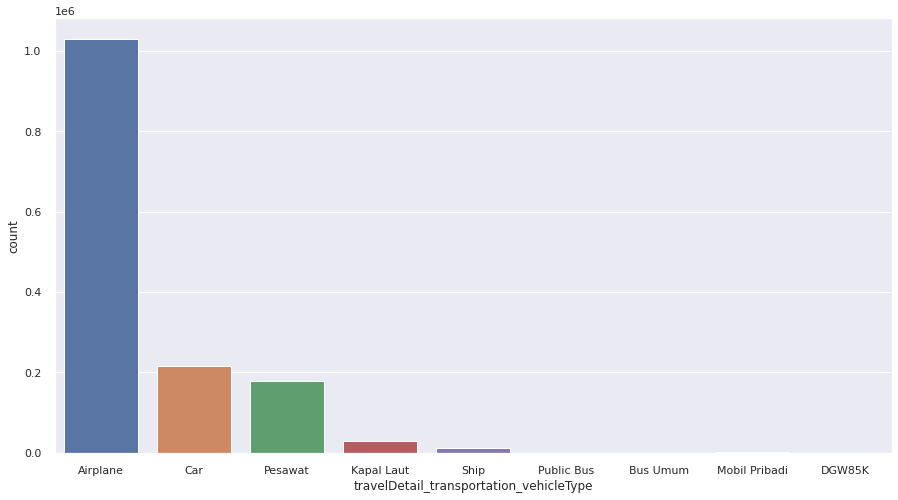

In [ ]:
sns.countplot(x='travelDetail_transportation_vehicleType', data=df_ehac)
plt.show()

### **travelDetail_destination_cityName**

travelDetail_destination_cityName = nama kota tujuan perjalanan

In [ ]:
for i in np.unique(df_ehac['travelDetail_destination_cityName']):
  print(i)

KAB PEGUNUNGAN BINTANG
KAB TIMOR TENGAH SELATAN
KAB. ACEH BARAT
KAB. ACEH BARAT DAYA
KAB. ACEH BESAR
KAB. ACEH JAYA
KAB. ACEH SELATAN
KAB. ACEH SINGKIL
KAB. ACEH TAMIANG
KAB. ACEH TENGAH
KAB. ACEH TENGGARA
KAB. ACEH TIMUR
KAB. ACEH UTARA
KAB. ADM. KEP. SERIBU
KAB. AGAM
KAB. ALOR
KAB. ASAHAN
KAB. ASMAT
KAB. BADUNG
KAB. BALANGAN
KAB. BANDUNG
KAB. BANDUNG BARAT
KAB. BANGGAI
KAB. BANGGAI KEPULAUAN
KAB. BANGGAI LAUT
KAB. BANGKA
KAB. BANGKA BARAT
KAB. BANGKA SELATAN
KAB. BANGKA TENGAH
KAB. BANGKALAN
KAB. BANGLI
KAB. BANJAR
KAB. BANJARNEGARA
KAB. BANTAENG
KAB. BANTUL
KAB. BANYUASIN
KAB. BANYUMAS
KAB. BANYUWANGI
KAB. BARITO KUALA
KAB. BARITO SELATAN
KAB. BARITO TIMUR
KAB. BARITO UTARA
KAB. BARRU
KAB. BATANG
KAB. BATANGHARI
KAB. BATU BARA
KAB. BEKASI
KAB. BELITUNG
KAB. BELITUNG TIMUR
KAB. BELU
KAB. BENER MERIAH
KAB. BENGKALIS
KAB. BENGKAYANG
KAB. BENGKULU SELATAN
KAB. BENGKULU TENGAH
KAB. BENGKULU UTARA
KAB. BERAU
KAB. BIAK NUMFOR
KAB. BIMA
KAB. BINTAN
KAB. BIREUEN
KAB. BLITAR
KAB. BLORA
KAB. B

### **travelDetail_destination_provinceName**

travelDetail_destination_provinceName = nama provinsi tujuan perjalanan

In [ ]:
for i in np.unique(df_ehac['travelDetail_destination_provinceName']):
  print(i)

Aceh
Bali
Banten
Bengkulu
DKI Jakarta
Gorontalo
Jambi
Jawa Barat
Jawa Tengah
Jawa Timur
Kalimantan Barat
Kalimantan Selatan
Kalimantan Tengah
Kalimantan Timur
Kalimantan Utara
Kepulauan Bangka Belitung
Kepulauan Riau
Lampung
Maluku
Maluku Utara
Nusa Tenggara Barat
Nusa Tenggara Timur
Papua
Papua Barat
Riau
Sulawesi Barat
Sulawesi Selatan
Sulawesi Tengah
Sulawesi Tenggara
Sulawesi Utara
Sumatera Barat
Sumatera Selatan
Sumatera Utara
Yogyakarta


### **travelDetail_origin_cityName**

travelDetail_origin_cityName = nama kota asal perjalanan

In [ ]:
for i in np.unique(df_ehac['travelDetail_origin_cityName']):
  print(i)

KAB PEGUNUNGAN BINTANG
KAB TIMOR TENGAH SELATAN
KAB. ACEH BARAT
KAB. ACEH BARAT DAYA
KAB. ACEH BESAR
KAB. ACEH JAYA
KAB. ACEH SELATAN
KAB. ACEH SINGKIL
KAB. ACEH TAMIANG
KAB. ACEH TENGAH
KAB. ACEH TENGGARA
KAB. ACEH TIMUR
KAB. ACEH UTARA
KAB. ADM. KEP. SERIBU
KAB. AGAM
KAB. ALOR
KAB. ASAHAN
KAB. ASMAT
KAB. BADUNG
KAB. BALANGAN
KAB. BANDUNG
KAB. BANDUNG BARAT
KAB. BANGGAI
KAB. BANGGAI KEPULAUAN
KAB. BANGGAI LAUT
KAB. BANGKA
KAB. BANGKA BARAT
KAB. BANGKA SELATAN
KAB. BANGKA TENGAH
KAB. BANGKALAN
KAB. BANGLI
KAB. BANJAR
KAB. BANJARNEGARA
KAB. BANTAENG
KAB. BANTUL
KAB. BANYUASIN
KAB. BANYUMAS
KAB. BANYUWANGI
KAB. BARITO KUALA
KAB. BARITO SELATAN
KAB. BARITO TIMUR
KAB. BARITO UTARA
KAB. BARRU
KAB. BATANG
KAB. BATANGHARI
KAB. BATU BARA
KAB. BEKASI
KAB. BELITUNG
KAB. BELITUNG TIMUR
KAB. BELU
KAB. BENER MERIAH
KAB. BENGKALIS
KAB. BENGKAYANG
KAB. BENGKULU SELATAN
KAB. BENGKULU TENGAH
KAB. BENGKULU UTARA
KAB. BERAU
KAB. BIAK NUMFOR
KAB. BIMA
KAB. BINTAN
KAB. BIREUEN
KAB. BLITAR
KAB. BLORA
KAB. B

### **travelDetail_origin_provinceName**

travelDetail_origin_provinceName = nama provinsi asal perjalanan	

In [ ]:
for i in np.unique(df_ehac['travelDetail_origin_provinceName']):
  print(i)

Aceh
Bali
Banten
Bengkulu
DKI Jakarta
Gorontalo
Jambi
Jawa Barat
Jawa Tengah
Jawa Timur
Kalimantan Barat
Kalimantan Selatan
Kalimantan Tengah
Kalimantan Timur
Kalimantan Utara
Kepulauan Bangka Belitung
Kepulauan Riau
Lampung
Maluku
Maluku Utara
Nusa Tenggara Barat
Nusa Tenggara Timur
Papua
Papua Barat
Riau
Sulawesi Barat
Sulawesi Selatan
Sulawesi Tengah
Sulawesi Tenggara
Sulawesi Utara
Sumatera Barat
Sumatera Selatan
Sumatera Utara
Yogyakarta


### **typeEhac**

In [ ]:
np.unique(df_ehac['typeEhac'])

array(['domestic'], dtype=object)

### **updatedAt**

In [ ]:
np.unique(df_ehac['updatedAt'])

array(['2021-06-08', '2021-06-14', '2021-07-04', '2021-07-09',
       '2021-07-12', '2021-07-15', '2021-07-16', '2021-07-17',
       '2021-07-18', '2021-07-19', '2021-07-22', '2021-07-23',
       '2021-07-25', '2021-07-27', '2021-07-30', '2021-08-01',
       '2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05',
       '2021-08-06', '2021-08-07', '2021-08-08', '2021-08-09',
       '2021-08-10', '2021-08-11', '2021-08-12', '2021-08-13',
       '2021-08-14', '2021-08-15', '2021-08-16', '2021-08-17',
       '2021-08-18', '2021-08-19', '2021-08-20', '2021-08-21',
       '2021-08-22', '2021-08-23', '2021-08-24', '2021-08-25',
       '2021-08-26', '2021-08-27', '2021-08-28', '2021-08-29',
       '2021-08-30', '2021-08-31', '2021-09-01', '2021-09-02',
       '2021-09-03', '2021-09-04', '2021-09-05', '2021-09-06',
       '2021-09-07', '2021-09-08', '2021-09-09', '2021-09-10',
       '2021-09-11', '2021-09-12', '2021-09-13', '2021-09-14',
       '2021-09-15', '2021-09-16', '2021-09-17', '2021-

## **Save Data Clean Ehac**

In [ ]:
df_ehac.reset_index(inplace = True, drop = True)
df_ehac.head()

,sid,userId,createdAt,createdBy_status,healthDeclaration_symptoms,personalDetail_travelPurpose,personalDetail_passportCountry,personalDetail_citizen,personalDetail_gender,personalDetail_bornDate,scan_latitude,scan_longitude,travelDetail_transportation_vehicleType,travelDetail_destination_cityName,travelDetail_destination_provinceName,travelDetail_origin_cityName,travelDetail_origin_provinceName,typeEhac,updatedAt
0,614308e26dc27b670037e516,a5e3abd0-067e-11ec-b01c-81579cec6191,2021-09-16,NOT POSITIVE,Tidak ada,Business,Indonesia,Indonesia,Perempuan,06/10/1997,-6.265337,106.884579,Airplane,KAB. MALANG,Jawa Timur,KAB. AGAM,Sumatera Barat,domestic,2021-09-16
1,617cb2b08cbb729f2b6481be,64e44f00-fda4-11eb-9fb0-1d79fb7ff9e3,2021-10-30,NOT POSITIVE,Tidak ada,Tourism / Leisure / Vacation,Indonesia,Indonesia,Laki-Laki,21/07/1997,-7.374848,112.793765,Airplane,KAB. MALANG,Jawa Timur,KAB. AGAM,Sumatera Barat,domestic,2021-10-30
2,6189f3db6cef808dae3a3d1c,98daa320-1228-11ec-958b-c1a568b08621,2021-11-09,NOT POSITIVE,Kejang-Kejang,Foreign Workers,Indonesia,Indonesia,Laki-Laki,29/12/2001,-6.265337,106.884579,Airplane,KAB. AGAM,Sumatera Barat,KAB. AGAM,Sumatera Barat,domestic,2021-11-09
3,6194ec93b32b3953e15d2f38,c7ad8350-4088-11ec-85c8-97789bc87e08,2021-11-17,NOT POSITIVE,Tidak ada,Pariwisata / Waktu luang / Liburan,Indonesia,Indonesia,Perempuan,23/11/2021,-0.786172,100.285642,Car,KAB. AGAM,Sumatera Barat,KAB. AGAM,Sumatera Barat,domestic,2021-11-17
4,614fb0334d9252677c02237f,440f0df0-ddf7-11eb-83ee-5d270fc0332f,2021-09-25,NOT POSITIVE,Tidak ada,Business,Indonesia,Indonesia,Laki-Laki,17/01/1965,-0.786651,100.286831,Airplane,KAB. AGAM,Sumatera Barat,KAB. AGAM,Sumatera Barat,domestic,2021-09-25


In [ ]:
df_ehac.to_csv('DataEHac-Clean.csv', index=False)


## **Save month 7 and month 8**

In [ ]:
import pandas as pd
df_ehac = pd.read_csv('scanPeduliLindungi-Clean.csv')
df_ehac.head()

,sid,userId,user_status,checkInTime,checkOutTime,place_name,place_categoryName,locationAddress,location_latitude,location_longitude,crowd,status,userStatus,updatedAt,createdAt
0,60f49257c8948d0cd01751d7,f2655420-d183-11eb-b38f-c9cfd4f6bf1c,NOT POSITIVE,2021-07-18,2021-07-19,CGK - Main Gate Entrance - 3,Gedung,Terminal 3 RT.001/RW.010 Pajang Benda Kota Tan...,-6.119108,106.664222,141,1,yellow,2021-07-19,2021-07-18
1,60f4df6336a60b94b5488a7d,796a6b60-e82a-11eb-a626-692cd0692ddf,NOT POSITIVE,2021-07-19,2021-07-19,BNI BAJERA,Gedung,RUKO BAJERA JL. NGURAH RAI - DENPASAR,-8.503062,115.027762,2,1,yellow,2021-07-19,2021-07-19
2,60f8fdf951338da2c37ca942,5c15c070-80a5-11ea-8113-f9d0dd9176a2,NOT POSITIVE,2021-07-22,2021-07-23,CGK - Main Gate Entrance - 5,Gedung,Terminal 3 RT.001/RW.010 Pajang Benda Kota Tan...,-6.119110,106.664168,35,1,green,2021-07-23,2021-07-22
3,60ff3d9938602070ee1bd854,660e8420-7193-11ea-a650-87080ae56964,NOT POSITIVE,2021-07-26,2021-07-27,YIA-Pintu-Masuk-Terminal,Bandara,Jl. Wates - Purworejo No.Km. 42 Area Kebun Gla...,-7.897897,110.059511,32,1,green,2021-07-27,2021-07-26
4,61034dc036a60b94b5488b71,dcb6a8d0-f06a-11eb-abf9-67e5f4cad68f,NOT POSITIVE,2021-07-30,2021-07-30,SRG-Terminal-Entrance,Bandara,Jalan Bandara Ahmad Yani Tambakharjo Semarang ...,-6.966105,110.375283,5,1,green,2021-07-30,2021-07-30


In [ ]:
df_ehac.columns

Index(['sid', 'userId', 'user_status', 'checkInTime', 'checkOutTime',
       'place_name', 'place_categoryName', 'locationAddress',
       'location_latitude', 'location_longitude', 'crowd', 'status',
       'userStatus', 'updatedAt', 'createdAt'],
      dtype='object')

In [ ]:
date_col = ["checkInTime", "checkOutTime", "updatedAt", "createdAt"]
for x in date_col:
  df_ehac[x] = pd.to_datetime(df_ehac[x])

In [ ]:
df_ehac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609314 entries, 0 to 3609313
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   sid                 object        
 1   userId              object        
 2   user_status         object        
 3   checkInTime         datetime64[ns]
 4   checkOutTime        datetime64[ns]
 5   place_name          object        
 6   place_categoryName  object        
 7   locationAddress     object        
 8   location_latitude   float64       
 9   location_longitude  float64       
 10  crowd               int64         
 11  status              int64         
 12  userStatus          object        
 13  updatedAt           datetime64[ns]
 14  createdAt           datetime64[ns]
dtypes: datetime64[ns](4), float64(2), int64(2), object(7)
memory usage: 413.1+ MB


In [ ]:
start_date = '2021-07-01'
end_date = '2021-08-31'
mask = (df_ehac['createdAt'] >= start_date) & (df_ehac['createdAt'] <= end_date)
df_ehac = df_ehac.loc[mask]
df_ehac.head()

,sid,userId,user_status,checkInTime,checkOutTime,place_name,place_categoryName,locationAddress,location_latitude,location_longitude,crowd,status,userStatus,updatedAt,createdAt
0,60f49257c8948d0cd01751d7,f2655420-d183-11eb-b38f-c9cfd4f6bf1c,NOT POSITIVE,2021-07-18,2021-07-19,CGK - Main Gate Entrance - 3,Gedung,Terminal 3 RT.001/RW.010 Pajang Benda Kota Tan...,-6.119108,106.664222,141,1,yellow,2021-07-19,2021-07-18
1,60f4df6336a60b94b5488a7d,796a6b60-e82a-11eb-a626-692cd0692ddf,NOT POSITIVE,2021-07-19,2021-07-19,BNI BAJERA,Gedung,RUKO BAJERA JL. NGURAH RAI - DENPASAR,-8.503062,115.027762,2,1,yellow,2021-07-19,2021-07-19
2,60f8fdf951338da2c37ca942,5c15c070-80a5-11ea-8113-f9d0dd9176a2,NOT POSITIVE,2021-07-22,2021-07-23,CGK - Main Gate Entrance - 5,Gedung,Terminal 3 RT.001/RW.010 Pajang Benda Kota Tan...,-6.119110,106.664168,35,1,green,2021-07-23,2021-07-22
3,60ff3d9938602070ee1bd854,660e8420-7193-11ea-a650-87080ae56964,NOT POSITIVE,2021-07-26,2021-07-27,YIA-Pintu-Masuk-Terminal,Bandara,Jl. Wates - Purworejo No.Km. 42 Area Kebun Gla...,-7.897897,110.059511,32,1,green,2021-07-27,2021-07-26
4,61034dc036a60b94b5488b71,dcb6a8d0-f06a-11eb-abf9-67e5f4cad68f,NOT POSITIVE,2021-07-30,2021-07-30,SRG-Terminal-Entrance,Bandara,Jalan Bandara Ahmad Yani Tambakharjo Semarang ...,-6.966105,110.375283,5,1,green,2021-07-30,2021-07-30


In [ ]:
np.sort(df_ehac["createdAt"].unique())

array(['2021-07-03T00:00:00.000000000', '2021-07-04T00:00:00.000000000',
       '2021-07-05T00:00:00.000000000', '2021-07-06T00:00:00.000000000',
       '2021-07-07T00:00:00.000000000', '2021-07-08T00:00:00.000000000',
       '2021-07-09T00:00:00.000000000', '2021-07-10T00:00:00.000000000',
       '2021-07-11T00:00:00.000000000', '2021-07-12T00:00:00.000000000',
       '2021-07-13T00:00:00.000000000', '2021-07-14T00:00:00.000000000',
       '2021-07-16T00:00:00.000000000', '2021-07-17T00:00:00.000000000',
       '2021-07-18T00:00:00.000000000', '2021-07-19T00:00:00.000000000',
       '2021-07-20T00:00:00.000000000', '2021-07-21T00:00:00.000000000',
       '2021-07-22T00:00:00.000000000', '2021-07-23T00:00:00.000000000',
       '2021-07-24T00:00:00.000000000', '2021-07-25T00:00:00.000000000',
       '2021-07-26T00:00:00.000000000', '2021-07-27T00:00:00.000000000',
       '2021-07-28T00:00:00.000000000', '2021-07-29T00:00:00.000000000',
       '2021-07-30T00:00:00.000000000', '2021-08-01

In [ ]:
df_ehac.to_csv('DataEHac-Clean0708.csv', index=False)


In [ ]:
import pandas as pd
df_ehac = pd.read_csv('DataEHac-Clean0708.csv')
df_ehac.head()

,sid,userId,user_status,checkInTime,checkOutTime,place_name,place_categoryName,locationAddress,location_latitude,location_longitude,crowd,status,userStatus,updatedAt,createdAt
0,60f49257c8948d0cd01751d7,f2655420-d183-11eb-b38f-c9cfd4f6bf1c,NOT POSITIVE,2021-07-18,2021-07-19,CGK - Main Gate Entrance - 3,Gedung,Terminal 3 RT.001/RW.010 Pajang Benda Kota Tan...,-6.119108,106.664222,141,1,yellow,2021-07-19,2021-07-18
1,60f4df6336a60b94b5488a7d,796a6b60-e82a-11eb-a626-692cd0692ddf,NOT POSITIVE,2021-07-19,2021-07-19,BNI BAJERA,Gedung,RUKO BAJERA JL. NGURAH RAI - DENPASAR,-8.503062,115.027762,2,1,yellow,2021-07-19,2021-07-19
2,60f8fdf951338da2c37ca942,5c15c070-80a5-11ea-8113-f9d0dd9176a2,NOT POSITIVE,2021-07-22,2021-07-23,CGK - Main Gate Entrance - 5,Gedung,Terminal 3 RT.001/RW.010 Pajang Benda Kota Tan...,-6.119110,106.664168,35,1,green,2021-07-23,2021-07-22
3,60ff3d9938602070ee1bd854,660e8420-7193-11ea-a650-87080ae56964,NOT POSITIVE,2021-07-26,2021-07-27,YIA-Pintu-Masuk-Terminal,Bandara,Jl. Wates - Purworejo No.Km. 42 Area Kebun Gla...,-7.897897,110.059511,32,1,green,2021-07-27,2021-07-26
4,61034dc036a60b94b5488b71,dcb6a8d0-f06a-11eb-abf9-67e5f4cad68f,NOT POSITIVE,2021-07-30,2021-07-30,SRG-Terminal-Entrance,Bandara,Jalan Bandara Ahmad Yani Tambakharjo Semarang ...,-6.966105,110.375283,5,1,green,2021-07-30,2021-07-30


# **Data Microsite**

Data verifikasi keberangkatan seseorang via perjalanan udara

* `sid` : auto generated id
* `userId` : auto generated kode user
* `place` : tempat? nama lab? (kode tempat)
* `swabDate` : tgl swab (waktu pelaksanaan tes swab)
* `swabResult` : hasil tes swab
* `swabHospital` : RS swab / tempat pelaksanaan tes swab
* `swabValid` : validasi swab / status tes swab (T/F)
* `antigenDate` : tgl antigen / waktu pelaksanaan tes antigen
* `antigenResult` : hasil antigen
* `antigenHospital` : RS antigen / tempat pelaksanaan tes antigen
* `antigenValid` : validasi antigen (T/F)
* `flightStatus` : naik pesawat? (T/F) / status diperbolehkannya perjalanan seseorang berdasarkan hasil tes swab/antigen (false/true)
* `createdAt` : tgl dibuat
* `updatedAt` : tgl diupdate

## **Load Datasets**

In [ ]:
df_mc = pd.read_csv("DataMicrosite.csv")
df_mc.head()

,sid,userId,place,swabDate,swabResult,swabHospital,swabValid,antigenDate,antigenResult,antigenHospital,antigenValid,flightStatus,createdAt,updatedAt
0,60fb7e041ccf9ed2fdf4e3fa,e0ee4dc0-b7f0-11eb-8988-5fb466026cb9,SRG,2021-07-23,NEGATIF,LABORATORIUM KLINIK ESENSIA SEMARANG,True,2021-07-18,POSITIF,KLINIK UTAMA RAWAT INAP ESENSIA,False,False,2021-07-24,2021-07-24
1,60fcfb6384c7bb281bf4423d,e0ee4dc0-b7f0-11eb-8988-5fb466026cb9,SRG,2021-07-24,NEGATIF,LABORATORIUM KF SEMARANG,True,2021-07-23,NEGATIF,RS Islam Surakarta YARSIS,False,True,2021-07-25,2021-07-25
2,613815f6d5e841a26798d24a,c76daa70-eda2-11eb-b283-bf3fd4393649,KKP Kelas II Jayapura Akun 2,1970-01-01,NaN,NaN,False,2021-09-08,NEGATIF,LABORATORIUM KLINIK ASA,True,False,2021-09-08,2021-09-08
3,6138536c1dd7709ce0d27e02,42f07c20-e369-11eb-9869-b798d2e88909,HLP,1970-01-01,NaN,NaN,False,2021-09-07,NEGATIF,RS GRAHA MEDIKA,True,True,2021-09-08,2021-09-08
4,61385f9ba496721bacac87c5,c6985910-eda2-11eb-97b1-c51d7a65b913,KKP Kelas II Kendari Akun 2,2021-09-08,NEGATIF,RS Bahteramas Provinsi Sultra,True,2021-08-16,NEGATIF,Klinik Utama Taradita 48,False,True,2021-09-08,2021-09-08


## **Explore Datasets**

In [ ]:
print('Total rows (Microsite):', df_mc.shape[0])
print('Total features (Microsite):', df_mc.shape[1])

Total rows (Microsite): 6035850
Total features (Microsite): 14


In [ ]:
df_mc.columns

Index(['sid', 'userId', 'place', 'swabDate', 'swabResult', 'swabHospital',
       'swabValid', 'antigenDate', 'antigenResult', 'antigenHospital',
       'antigenValid', 'flightStatus', 'createdAt', 'updatedAt'],
      dtype='object')

In [ ]:
# get the info of each columns
df_mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6035850 entries, 0 to 6035849
Data columns (total 14 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   sid              object
 1   userId           object
 2   place            object
 3   swabDate         object
 4   swabResult       object
 5   swabHospital     object
 6   swabValid        bool  
 7   antigenDate      object
 8   antigenResult    object
 9   antigenHospital  object
 10  antigenValid     bool  
 11  flightStatus     bool  
 12  createdAt        object
 13  updatedAt        object
dtypes: bool(3), object(11)
memory usage: 523.8+ MB


In [ ]:
df_mc.describe()

,sid,userId,place,swabDate,swabResult,swabHospital,swabValid,antigenDate,antigenResult,antigenHospital,antigenValid,flightStatus,createdAt,updatedAt
count,6035850,6035850,6035850,6035850,1661271,1661271,6035850,6035850,1435428,1435428,6035850,6035850,6035850,6035850
unique,6035850,138,138,98,2,4542,2,99,2,10721,2,2,59,59
top,60fb7e041ccf9ed2fdf4e3fa,bigbox-38f3-11eb-16b5-1d43657e7249,bigbox,1970-01-01,NEGATIF,Laboratorium Bumame Jakarta,False,1970-01-01,NEGATIF,Klinik Utama Taradita 48,False,False,2021-09-10,2021-09-10
freq,1,4150185,4150185,4374579,1635840,50647,4716719,4600422,1427940,100307,5337632,4300179,402880,402880


## **Missing Value**

In [ ]:
df_mc.isnull().any()

sid                False
userId             False
place              False
swabDate           False
swabResult          True
swabHospital        True
swabValid          False
antigenDate        False
antigenResult       True
antigenHospital     True
antigenValid       False
flightStatus       False
createdAt          False
updatedAt          False
dtype: bool

In [ ]:
df_mc.isna().sum()

sid                      0
userId                   0
place                    0
swabDate                 0
swabResult         4374579
swabHospital       4374579
swabValid                0
antigenDate              0
antigenResult      4600422
antigenHospital    4600422
antigenValid             0
flightStatus             0
createdAt                0
updatedAt                0
dtype: int64

In [ ]:
(100.00 * df_mc.isnull().sum()) / df_mc.shape[0]

sid                 0.000000
userId              0.000000
place               0.000000
swabDate            0.000000
swabResult         72.476602
swabHospital       72.476602
swabValid           0.000000
antigenDate         0.000000
antigenResult      76.218296
antigenHospital    76.218296
antigenValid        0.000000
flightStatus        0.000000
createdAt           0.000000
updatedAt           0.000000
dtype: float64

drop column that have > 50 % or fill missing value

Tidak ada yang beul swab dan antigen yang melakukan penerbangan dari missing value

In [ ]:
df_mc[(df_mc["swabResult"].isnull()) & (df_mc["antigenResult"].isnull()) & (df_mc["flightStatus"] == 'True')].head()

,sid,userId,place,swabDate,swabResult,swabHospital,swabValid,antigenDate,antigenResult,antigenHospital,antigenValid,flightStatus,createdAt,updatedAt


### **SwabResult**

6035850 row datasets all

In [ ]:
df_mc["swabResult"].unique()

array(['NEGATIF', nan, 'POSITIF'], dtype=object)

In [ ]:
df_mc["swabResult"].isna().sum()

4374579

In [ ]:
df_mc[df_mc["swabResult"].isnull()].head()

,sid,userId,place,swabDate,swabResult,swabHospital,swabValid,antigenDate,antigenResult,antigenHospital,antigenValid,flightStatus,createdAt,updatedAt
2,613815f6d5e841a26798d24a,c76daa70-eda2-11eb-b283-bf3fd4393649,KKP Kelas II Jayapura Akun 2,1970-01-01,NaN,NaN,False,2021-09-08,NEGATIF,LABORATORIUM KLINIK ASA,True,False,2021-09-08,2021-09-08
3,6138536c1dd7709ce0d27e02,42f07c20-e369-11eb-9869-b798d2e88909,HLP,1970-01-01,NaN,NaN,False,2021-09-07,NEGATIF,RS GRAHA MEDIKA,True,True,2021-09-08,2021-09-08
6,61392e8ef99873c7bf2f19ff,92618520-b893-11eb-9618-53b0e83139d0,AMQ,1970-01-01,NaN,NaN,False,2021-09-08,NEGATIF,BKPM Provinsi Maluku,True,False,2021-09-08,2021-09-08
11,61397d54357e62ac8533c7a6,c4f0c390-eda2-11eb-a5c1-1b0c4c3cfa9b,KKP Kelas I Surabaya Akun 1,1970-01-01,NaN,NaN,False,2021-09-07,NEGATIF,RS Sari Asih Ciputat,False,False,2021-09-09,2021-09-09
12,6139889a110175332f744321,e0ee4dc0-b7f0-11eb-8988-5fb466026cb9,SRG,1970-01-01,NaN,NaN,False,2021-09-09,NEGATIF,Klinik Utama Klinikita TK Singosari,True,True,2021-09-09,2021-09-09


Maybe fill this nan ?

In [ ]:
df_mc["swabResult"] = df_mc["swabResult"].fillna("Belum")

In [ ]:
df_mc["swabResult"].unique()

array(['NEGATIF', 'Belum', 'POSITIF'], dtype=object)

In [ ]:
df_mc["swabResult"].isna().sum()

0

In [ ]:
df_mc[df_mc["swabResult"] == "Belum"].head(2)

,sid,userId,place,swabDate,swabResult,swabHospital,swabValid,antigenDate,antigenResult,antigenHospital,antigenValid,flightStatus,createdAt,updatedAt
2,613815f6d5e841a26798d24a,c76daa70-eda2-11eb-b283-bf3fd4393649,KKP Kelas II Jayapura Akun 2,1970-01-01,Belum,NaN,False,2021-09-08,NEGATIF,LABORATORIUM KLINIK ASA,True,False,2021-09-08,2021-09-08
3,6138536c1dd7709ce0d27e02,42f07c20-e369-11eb-9869-b798d2e88909,HLP,1970-01-01,Belum,NaN,False,2021-09-07,NEGATIF,RS GRAHA MEDIKA,True,True,2021-09-08,2021-09-08


### **swabHospital**

In [ ]:
df_mc["swabHospital"].unique()

array(['LABORATORIUM KLINIK ESENSIA SEMARANG', 'LABORATORIUM KF SEMARANG',
       nan, ..., 'Drive Thru COVID-19 Gatot Subroto Jakarta',
       'KLINIK PUSPITA MEDIKA', 'UPTD PUSKESMAS KAHURIPAN'], dtype=object)

In [ ]:
df_mc["swabHospital"].isna().sum()

4374579

Maybe fill this nan ?

In [ ]:
df_mc["swabHospital"] = df_mc["swabHospital"].fillna("None")

In [ ]:
df_mc["swabHospital"].unique()

array(['LABORATORIUM KLINIK ESENSIA SEMARANG', 'LABORATORIUM KF SEMARANG',
       'None', ..., 'Drive Thru COVID-19 Gatot Subroto Jakarta',
       'KLINIK PUSPITA MEDIKA', 'UPTD PUSKESMAS KAHURIPAN'], dtype=object)

In [ ]:
df_mc["swabHospital"].isna().sum()

0

In [ ]:
df_mc[df_mc["swabHospital"] == "None"].head(2)

,sid,userId,place,swabDate,swabResult,swabHospital,swabValid,antigenDate,antigenResult,antigenHospital,antigenValid,flightStatus,createdAt,updatedAt
2,613815f6d5e841a26798d24a,c76daa70-eda2-11eb-b283-bf3fd4393649,KKP Kelas II Jayapura Akun 2,1970-01-01,Belum,None,False,2021-09-08,NEGATIF,LABORATORIUM KLINIK ASA,True,False,2021-09-08,2021-09-08
3,6138536c1dd7709ce0d27e02,42f07c20-e369-11eb-9869-b798d2e88909,HLP,1970-01-01,Belum,None,False,2021-09-07,NEGATIF,RS GRAHA MEDIKA,True,True,2021-09-08,2021-09-08


### **antigenResult**

In [ ]:
df_mc["antigenResult"].unique()

array(['POSITIF', 'NEGATIF', nan], dtype=object)

In [ ]:
df_mc["antigenResult"].isna().sum() 

4600422

Maybe fill this nan ?

In [ ]:
df_mc["antigenResult"] = df_mc["antigenResult"].fillna("Belum")

In [ ]:
df_mc["antigenResult"].unique()

array(['POSITIF', 'NEGATIF', 'Belum'], dtype=object)

In [ ]:
df_mc["antigenResult"].isna().sum()

0

In [ ]:
df_mc[df_mc["antigenResult"] == "Belum"].head(2)

,sid,userId,place,swabDate,swabResult,swabHospital,swabValid,antigenDate,antigenResult,antigenHospital,antigenValid,flightStatus,createdAt,updatedAt
110851,60fa32f662487311430f7edf,e0ee4dc0-b7f0-11eb-8988-5fb466026cb9,SRG,2021-07-22,NEGATIF,Laboratorium RSUD Temanggung,True,1970-01-01,Belum,NaN,False,True,2021-07-23,2021-07-23
110852,60fa5e7d724c57318140a0c0,f9e105c0-b7f0-11eb-8988-5fb466026cb9,SOC,2021-07-22,NEGATIF,Laboratorium RS Dr.Oen Kandang Sapi,True,1970-01-01,Belum,NaN,False,True,2021-07-23,2021-07-23


### **antigenHospital**

In [ ]:
df_mc["antigenHospital"].unique()

array(['KLINIK UTAMA RAWAT INAP ESENSIA', 'RS Islam Surakarta YARSIS',
       'LABORATORIUM KLINIK ASA', ..., 'SUMBUL', 'PKM KOTAPINANG',
       'GUMPANG'], dtype=object)

In [ ]:
df_mc["antigenHospital"].isna().sum()

4600422

Maybe fill this nan ?

In [ ]:
df_mc["antigenHospital"] = df_mc["antigenHospital"].fillna("None")

In [ ]:
df_mc["antigenHospital"].unique()

array(['KLINIK UTAMA RAWAT INAP ESENSIA', 'RS Islam Surakarta YARSIS',
       'LABORATORIUM KLINIK ASA', ..., 'SUMBUL', 'PKM KOTAPINANG',
       'GUMPANG'], dtype=object)

In [ ]:
df_mc["antigenHospital"].isna().sum()

0

In [ ]:
df_mc[df_mc["antigenHospital"] == "None"].head(2)

,sid,userId,place,swabDate,swabResult,swabHospital,swabValid,antigenDate,antigenResult,antigenHospital,antigenValid,flightStatus,createdAt,updatedAt
110851,60fa32f662487311430f7edf,e0ee4dc0-b7f0-11eb-8988-5fb466026cb9,SRG,2021-07-22,NEGATIF,Laboratorium RSUD Temanggung,True,1970-01-01,Belum,None,False,True,2021-07-23,2021-07-23
110852,60fa5e7d724c57318140a0c0,f9e105c0-b7f0-11eb-8988-5fb466026cb9,SOC,2021-07-22,NEGATIF,Laboratorium RS Dr.Oen Kandang Sapi,True,1970-01-01,Belum,None,False,True,2021-07-23,2021-07-23


In [ ]:
# Remove nan columns using the same formula
# nan_column = ["swabResult","swabHospital", "antigenResult", "antigenHospital"]
# df_mc = df_mc.drop(nan_column,axis = 1)
# df_mc.columns

In [ ]:
df_mc.isna().sum()

sid                0
userId             0
place              0
swabDate           0
swabResult         0
swabHospital       0
swabValid          0
antigenDate        0
antigenResult      0
antigenHospital    0
antigenValid       0
flightStatus       0
createdAt          0
updatedAt          0
dtype: int64

In [ ]:
df_mc.shape # 6035850

(6035850, 14)

## **Duplicate Value**

In [ ]:
df_mc.duplicated().sum()

0

In [ ]:
print(f"Data Frame Dimension Before Duplicate Removal: {df_mc.shape}")
df_mc = df_mc.drop_duplicates()
print(f"Data Frame Dimension After Duplicate Removal: {df_mc.shape}")

Data Frame Dimension Before Duplicate Removal: (6035850, 14)
Data Frame Dimension After Duplicate Removal: (6035850, 14)


## **Explore Each Columns**

In [ ]:
df_mc.columns

Index(['sid', 'userId', 'place', 'swabDate', 'swabResult', 'swabHospital',
       'swabValid', 'antigenDate', 'antigenResult', 'antigenHospital',
       'antigenValid', 'flightStatus', 'createdAt', 'updatedAt'],
      dtype='object')

### **sid**

sid = auto generated id

In [ ]:
np.unique(df_mc['sid'])

array(['60f8efef4bc3553991eb0364', '60f8eff0724c573181409eaa',
       '60f8eff1724c573181409eab', ..., '614e667faef16a041def3afc',
       '614e667fc7158918f47285a6', '614e667fc7158918f47285a7'],
      dtype=object)

In [ ]:
sid = df_mc['sid'].value_counts()
sid

60fb7e041ccf9ed2fdf4e3fa    1
613d7bac655f9553e1878ad5    1
613d81f1dab773b13863b46c    1
613d80d72966f18f23d8084a    1
613d800f2966f18f23d807f0    1
                           ..
6144cb9eaef16a041de94344    1
6144ca6ac7158918f46c8f51    1
6144c737aef16a041de94278    1
6144c5682985c59579499f80    1
61412997655f9553e1888002    1
Name: sid, Length: 6035850, dtype: int64

In [ ]:
for i in sid:
  if i > 1:
    print("Ada id yang lebih dari 1")
    break;
else:
  print("Semuanya memiliki hanya 1 id")

Semuanya memiliki hanya 1 id


### **userId**

userId = auto generated kode user

In [ ]:
np.unique(df_mc['userId'])

array(['02c09930-b7f1-11eb-8988-5fb466026cb9',
       '0c203d10-e36a-11eb-8b9e-af7e764a1e77',
       '0c4b87d0-b7f1-11eb-8988-5fb466026cb9',
       '0c799e20-dc0b-11eb-88a2-9fc4f6aedec3',
       '159f12c0-b7f1-11eb-8988-5fb466026cb9',
       '19e15da0-b870-11eb-b009-3b86a1529dfa',
       '1a58fc50-e36a-11eb-be34-17ed09f9f0c6',
       '1eff9600-b7f1-11eb-8988-5fb466026cb9',
       '266d49f0-b7f1-11eb-8988-5fb466026cb9',
       '2cd1fd50-e36a-11eb-870d-d733504dad4d',
       '2f78f670-b7f1-11eb-8988-5fb466026cb9',
       '366656d0-b7f1-11eb-8988-5fb466026cb9',
       '3f6bf110-ea3f-11eb-b669-5b94560a72d7',
       '3fc53760-e36a-11eb-9e45-3f5859a0ea0d',
       '4050f1a0-b7f1-11eb-8988-5fb466026cb9',
       '42f07c20-e369-11eb-9869-b798d2e88909',
       '468473c0-ef5b-11eb-b0f5-fd35ac2a7502',
       '4caa00d0-ea38-11eb-9841-873d88fb10dd',
       '51b3a8f0-06c7-11ec-b82e-25539729cf03',
       '53373e60-e36a-11eb-b784-07d9622aaed1',
       '5ed380d0-e36a-11eb-bbd2-b7b4b4748851',
       '61eb8

In [ ]:
user_id = df_mc['userId'].value_counts()
user_id

bigbox-38f3-11eb-16b5-1d43657e7249      4150185
0c799e20-dc0b-11eb-88a2-9fc4f6aedec3     491274
159f12c0-b7f1-11eb-8988-5fb466026cb9     163788
2f78f670-b7f1-11eb-8988-5fb466026cb9     147205
02c09930-b7f1-11eb-8988-5fb466026cb9     128267
                                         ...   
3f6bf110-ea3f-11eb-b669-5b94560a72d7          1
c0f94aa0-eda2-11eb-b397-d78ff9296602          1
c3e37240-eda2-11eb-8f1c-cbb62de4dc51          1
e18a69b0-0d42-11ec-b044-536f5314836d          1
e25fe220-0d42-11ec-b044-536f5314836d          1
Name: userId, Length: 138, dtype: int64

In [ ]:
for i in user_id:
  if i > 1:
    print("Ada id yang lebih dari 1")
    break;
else:
  print("Semuanya memiliki hanya 1 id")

Ada id yang lebih dari 1


### **place**

place = kode tempat

In [ ]:
for i in np.unique(df_mc['place']):
  print(i)

AMQ
Admin cms
BBTKLPP Surabaya Akun 1
BBTKLPP Surabaya Akun 2
BDJ
BDO
BIK
BKS
BPN
BTH
BTJ
BWX
CMS CGK
DJB
DJJ
DPS
DTB
EHAC KKP Kelas I Soekarno Hatta Akun 1
EHAC KKP Kelas II Manado Akun 1
EHAC KKP Kelas II Palembang Akun 2
EHAC KKP Kelas II Tarakan Akun 1
EHAC KKP Kelas II Tarakan Akun 2
EHAC KKP Kelas III Kupang Akun 1
EHAC KKP Kelas III Kupang Akun 2
EHAC KKP Kelas III Manokwari Akun 1
EHAC KKP Kelas III Manokwari Akun 2
EHAC KKP Kelas III Merauke Akun 1
EHAC KKP Kelas III Merauke Akun 2
EHAC KKP Kelas III Palangkaraya Akun 2
EHAC KKP Kelas III Palu Akun 2
EHAC KKP Kelas III Sampit Akun 1
EHAC KKP Kelas III Ternate Akun 1
HLP
JOG
KAI
KKP Kelas I Batam Akun 1
KKP Kelas I Denpasar Akun 1
KKP Kelas I Denpasar Akun 2
KKP Kelas I Makassar Akun 1
KKP Kelas I Makassar Akun 2
KKP Kelas I Medan Akun 1
KKP Kelas I Soekarno Hatta Akun 1
KKP Kelas I Soekarno Hatta Akun 2
KKP Kelas I Surabaya Akun 1
KKP Kelas I Surabaya Akun 2
KKP Kelas II Ambon Akun 1
KKP Kelas II Ambon Akun 2
KKP Kelas II Bali

### **swabDate**

swabDate = waktu pelaksanaan tes swab

In [ ]:
np.unique(df_mc['swabDate'])

array(['1970-01-01', '2021-06-21', '2021-06-22', '2021-06-23',
       '2021-06-24', '2021-06-25', '2021-06-26', '2021-06-27',
       '2021-06-28', '2021-06-29', '2021-06-30', '2021-07-01',
       '2021-07-02', '2021-07-03', '2021-07-04', '2021-07-05',
       '2021-07-06', '2021-07-07', '2021-07-08', '2021-07-09',
       '2021-07-10', '2021-07-11', '2021-07-12', '2021-07-13',
       '2021-07-14', '2021-07-15', '2021-07-16', '2021-07-17',
       '2021-07-18', '2021-07-19', '2021-07-20', '2021-07-21',
       '2021-07-22', '2021-07-23', '2021-07-24', '2021-07-25',
       '2021-07-26', '2021-07-27', '2021-07-28', '2021-07-29',
       '2021-07-30', '2021-07-31', '2021-08-01', '2021-08-02',
       '2021-08-03', '2021-08-04', '2021-08-05', '2021-08-06',
       '2021-08-07', '2021-08-08', '2021-08-09', '2021-08-10',
       '2021-08-11', '2021-08-12', '2021-08-13', '2021-08-14',
       '2021-08-15', '2021-08-16', '2021-08-17', '2021-08-18',
       '2021-08-19', '2021-08-20', '2021-08-21', '2021-

### **swabResult**

swabResult = hasil tes swab

In [ ]:
np.unique(df_mc['swabResult'])

array(['Belum', 'NEGATIF', 'POSITIF'], dtype=object)

In [ ]:
df_mc['swabResult'].value_counts()

Belum      4374579
NEGATIF    1635840
POSITIF      25431
Name: swabResult, dtype: int64

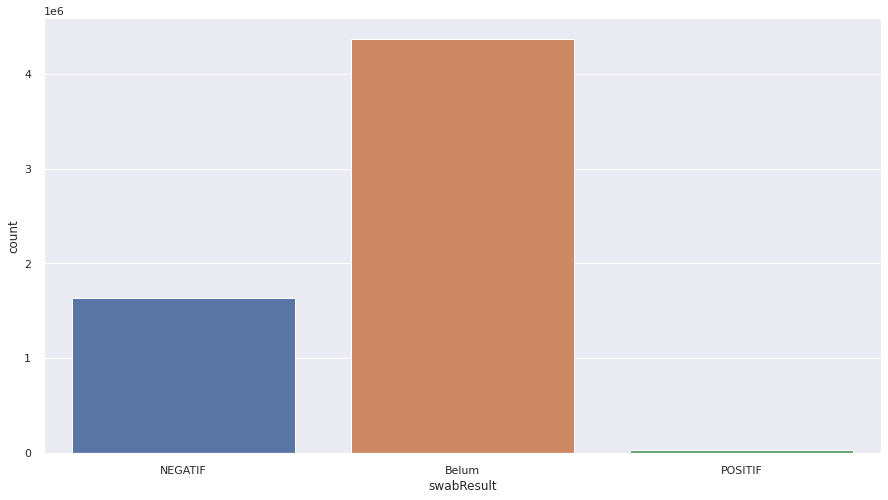

In [ ]:
sns.countplot(x='swabResult', data=df_mc)
plt.show()

### **swabHospital**

swabHospital = tempat pelaksanaan tes swab

In [ ]:
np.unique(df_mc['swabHospital'])

array(['10. Pusk lansat kadap', '23 ILIR', '4 ULU', ...,
       'laboratorium RS Husada',
       'laboratorium RS TNI AL Fx Suhardjo Ambon',
       'laboratorium RSUD Majalengka'], dtype=object)

In [ ]:
df_mc['swabHospital'].value_counts()

None                                     4374579
Laboratorium Bumame Jakarta                50647
Laboratorium Naraya Jabar                  27195
Laboratorium Khusus Quicktest Jakarta      25790
RS KARTIKA PULOMAS                         24522
                                          ...   
RS Bhayangkara Jitra Kota Bengkulu             1
RS Paru Dungus                                 1
DINKES BANDUNG                                 1
Bogor Senior Hospital                          1
UPTD PUSKESMAS KAHURIPAN                       1
Name: swabHospital, Length: 4543, dtype: int64

### **swabValid**

swabValid = status tes swab (false/true)

In [ ]:
np.unique(df_mc['swabValid'])

array([False,  True])

In [ ]:
df_mc['swabValid'].value_counts()

False    4716719
True     1319131
Name: swabValid, dtype: int64

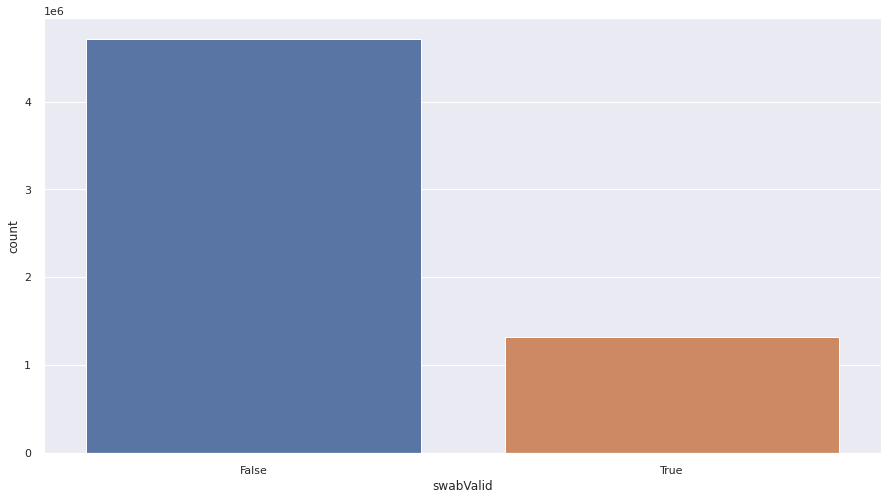

In [ ]:
sns.countplot(x='swabValid', data=df_mc)
plt.show()

### **antigenDate**

antigenDate = waktu pelaksanaan tes antigen

In [ ]:
np.unique(df_mc['antigenDate'])

array(['1970-01-01', '2021-06-20', '2021-06-21', '2021-06-22',
       '2021-06-23', '2021-06-24', '2021-06-25', '2021-06-26',
       '2021-06-27', '2021-06-28', '2021-06-29', '2021-06-30',
       '2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
       '2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08',
       '2021-07-09', '2021-07-10', '2021-07-11', '2021-07-12',
       '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16',
       '2021-07-17', '2021-07-18', '2021-07-19', '2021-07-20',
       '2021-07-21', '2021-07-22', '2021-07-23', '2021-07-24',
       '2021-07-25', '2021-07-26', '2021-07-27', '2021-07-28',
       '2021-07-29', '2021-07-30', '2021-07-31', '2021-08-01',
       '2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05',
       '2021-08-06', '2021-08-07', '2021-08-08', '2021-08-09',
       '2021-08-10', '2021-08-11', '2021-08-12', '2021-08-13',
       '2021-08-14', '2021-08-15', '2021-08-16', '2021-08-17',
       '2021-08-18', '2021-08-19', '2021-08-20', '2021-

### **antigenResult**

atigenResult = hasil tes antigen

In [ ]:
np.unique(df_mc['antigenResult'])

array(['Belum', 'NEGATIF', 'POSITIF'], dtype=object)

In [ ]:
df_mc['antigenResult'].value_counts()

Belum      4600422
NEGATIF    1427940
POSITIF       7488
Name: antigenResult, dtype: int64

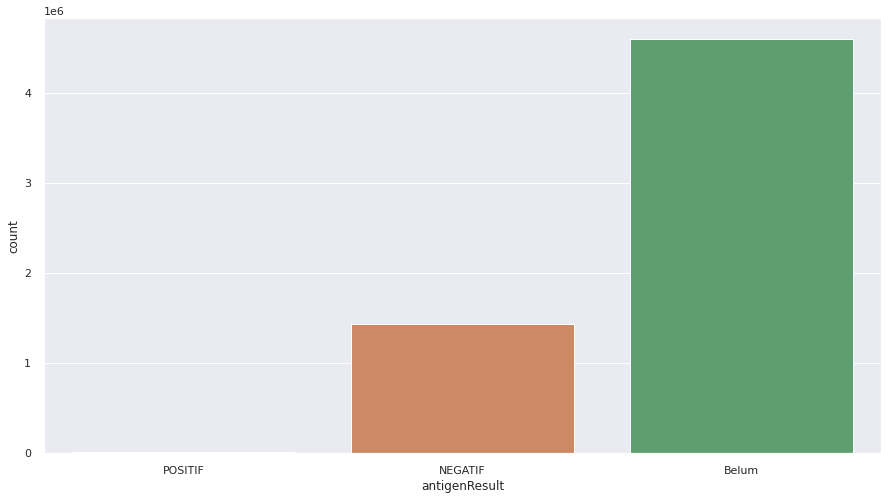

In [ ]:
sns.countplot(x='antigenResult', data=df_mc)
plt.show()

### **antigenHospital**

antigenHospital = tempat pelaksanaan tes antigen

In [ ]:
np.unique(df_mc['antigenHospital'])

array(['081328558633', '23 ILIR', '7 ULU', ..., 'sikeslanudash',
       'sky clinic', 'yomamedika'], dtype=object)

In [ ]:
df_mc['antigenHospital'].value_counts()

None                                4600422
Klinik Utama Taradita 48             100307
Klinik THC Telkom Landmark Tower      71304
Klinik Utama Jasa Prima               48913
Klinik Ramadhan                       34850
                                     ...   
RUSUNAWA                                  1
CIMENYAN                                  1
KEBON PEDES                               1
SEPUTIH BANYAK                            1
GUMPANG                                   1
Name: antigenHospital, Length: 10722, dtype: int64

### **antigenValid**

antigenValid = status tes antigen (false/true)

In [ ]:
np.unique(df_mc['antigenValid'])

array([False,  True])

In [ ]:
df_mc['antigenValid'].value_counts()

False    5337632
True      698218
Name: antigenValid, dtype: int64

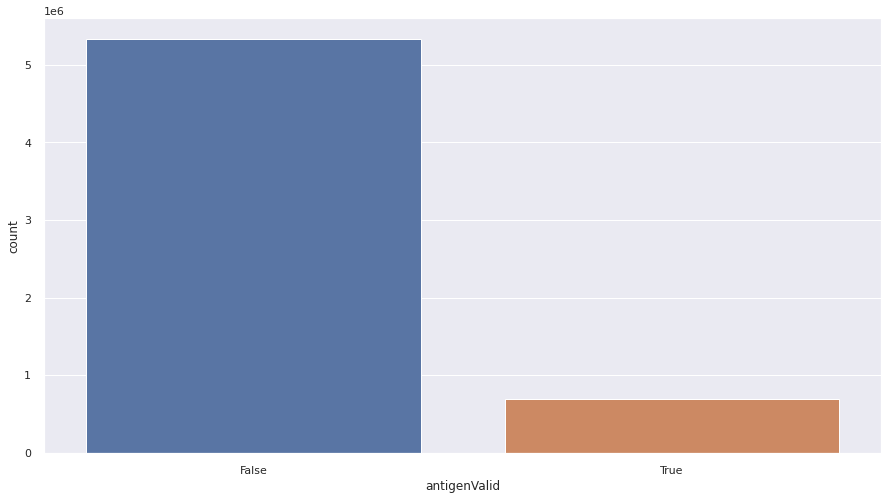

In [ ]:
sns.countplot(x='antigenValid', data=df_mc)
plt.show()

### **flightStatus**

flightStatus = status diperbolehkannya perjalanan seseorang berdasarkan hasil tes swab/antigen (false/true)

In [ ]:
np.unique(df_mc['flightStatus'])

array([False,  True])

In [ ]:
df_mc['flightStatus'].value_counts()

False    4300179
True     1735671
Name: flightStatus, dtype: int64

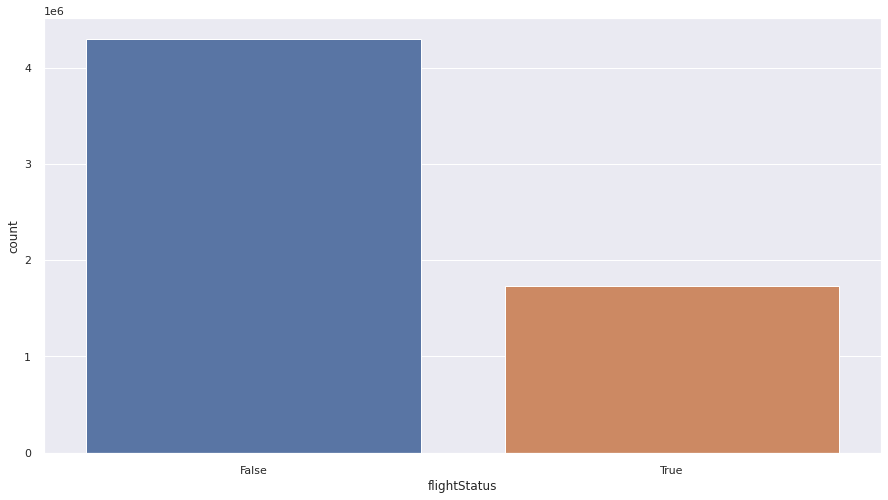

In [ ]:
sns.countplot(x='flightStatus', data=df_mc)
plt.show()

### **createdAt**

In [ ]:
np.unique(df_mc['createdAt'])

array(['2021-07-22', '2021-07-23', '2021-07-24', '2021-07-25',
       '2021-07-26', '2021-07-27', '2021-07-28', '2021-07-29',
       '2021-07-30', '2021-08-01', '2021-08-02', '2021-08-03',
       '2021-08-04', '2021-08-05', '2021-08-06', '2021-08-07',
       '2021-08-08', '2021-08-09', '2021-08-10', '2021-08-11',
       '2021-08-12', '2021-08-13', '2021-08-14', '2021-08-16',
       '2021-08-17', '2021-08-18', '2021-08-19', '2021-08-20',
       '2021-08-21', '2021-08-22', '2021-08-23', '2021-08-24',
       '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-28',
       '2021-08-29', '2021-08-30', '2021-09-01', '2021-09-02',
       '2021-09-03', '2021-09-04', '2021-09-05', '2021-09-06',
       '2021-09-08', '2021-09-09', '2021-09-10', '2021-09-11',
       '2021-09-12', '2021-09-13', '2021-09-14', '2021-09-16',
       '2021-09-17', '2021-09-18', '2021-09-19', '2021-09-20',
       '2021-09-22', '2021-09-23', '2021-09-24'], dtype=object)

### **updatedAt**

In [ ]:
np.unique(df_mc['updatedAt'])

array(['2021-07-22', '2021-07-23', '2021-07-24', '2021-07-25',
       '2021-07-26', '2021-07-27', '2021-07-28', '2021-07-29',
       '2021-07-30', '2021-08-01', '2021-08-02', '2021-08-03',
       '2021-08-04', '2021-08-05', '2021-08-06', '2021-08-07',
       '2021-08-08', '2021-08-09', '2021-08-10', '2021-08-11',
       '2021-08-12', '2021-08-13', '2021-08-14', '2021-08-16',
       '2021-08-17', '2021-08-18', '2021-08-19', '2021-08-20',
       '2021-08-21', '2021-08-22', '2021-08-23', '2021-08-24',
       '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-28',
       '2021-08-29', '2021-08-30', '2021-09-01', '2021-09-02',
       '2021-09-03', '2021-09-04', '2021-09-05', '2021-09-06',
       '2021-09-08', '2021-09-09', '2021-09-10', '2021-09-11',
       '2021-09-12', '2021-09-13', '2021-09-14', '2021-09-16',
       '2021-09-17', '2021-09-18', '2021-09-19', '2021-09-20',
       '2021-09-22', '2021-09-23', '2021-09-24'], dtype=object)

## **Make Swab Status and Modify Swab Result**

In [ ]:
df_mc.head()

,sid,userId,place,swabDate,swabResult,swabHospital,swabValid,antigenDate,antigenResult,antigenHospital,antigenValid,flightStatus,createdAt,updatedAt
0,60fb7e041ccf9ed2fdf4e3fa,e0ee4dc0-b7f0-11eb-8988-5fb466026cb9,SRG,2021-07-23,NEGATIF,LABORATORIUM KLINIK ESENSIA SEMARANG,True,2021-07-18,POSITIF,KLINIK UTAMA RAWAT INAP ESENSIA,False,False,2021-07-24,2021-07-24
1,60fcfb6384c7bb281bf4423d,e0ee4dc0-b7f0-11eb-8988-5fb466026cb9,SRG,2021-07-24,NEGATIF,LABORATORIUM KF SEMARANG,True,2021-07-23,NEGATIF,RS Islam Surakarta YARSIS,False,True,2021-07-25,2021-07-25
2,613815f6d5e841a26798d24a,c76daa70-eda2-11eb-b283-bf3fd4393649,KKP Kelas II Jayapura Akun 2,1970-01-01,Belum,None,False,2021-09-08,NEGATIF,LABORATORIUM KLINIK ASA,True,False,2021-09-08,2021-09-08
3,6138536c1dd7709ce0d27e02,42f07c20-e369-11eb-9869-b798d2e88909,HLP,1970-01-01,Belum,None,False,2021-09-07,NEGATIF,RS GRAHA MEDIKA,True,True,2021-09-08,2021-09-08
4,61385f9ba496721bacac87c5,c6985910-eda2-11eb-97b1-c51d7a65b913,KKP Kelas II Kendari Akun 2,2021-09-08,NEGATIF,RS Bahteramas Provinsi Sultra,True,2021-08-16,NEGATIF,Klinik Utama Taradita 48,False,True,2021-09-08,2021-09-08


In [ ]:
df_mc.columns

Index(['sid', 'userId', 'place', 'swabDate', 'swabResult', 'swabHospital',
       'swabValid', 'antigenDate', 'antigenResult', 'antigenHospital',
       'antigenValid', 'flightStatus', 'createdAt', 'updatedAt'],
      dtype='object')

Swab Result --> Negative --> Sudah Test

Swab Result --> Positif --> Sudah Test

Swab Result --> Belum --> Belum Test

Antigen Result --> Negative --> Sudah Test

Antigen Result --> Positif --> Sudah Test

Antigen Result --> Belum --> Belum Test

In [ ]:
df_mc['swabStatus'] = np.where(df_mc['swabResult']=='NEGATIF',"Sudah Test", (np.where(df_mc['swabResult']=='Belum', 'Belum Test', 'Sudah Test')))
df_mc['antigenStatus'] = np.where(df_mc['antigenResult']=='NEGATIF',"Sudah Test", (np.where(df_mc['antigenResult']=='Belum', 'Belum Test', 'Sudah Test')))

In [ ]:
df_mc.head()

,sid,userId,place,swabDate,swabResult,swabHospital,swabValid,antigenDate,antigenResult,antigenHospital,antigenValid,flightStatus,createdAt,updatedAt,swabStatus,antigenStatus
0,60fb7e041ccf9ed2fdf4e3fa,e0ee4dc0-b7f0-11eb-8988-5fb466026cb9,SRG,2021-07-23,NEGATIF,LABORATORIUM KLINIK ESENSIA SEMARANG,True,2021-07-18,POSITIF,KLINIK UTAMA RAWAT INAP ESENSIA,False,False,2021-07-24,2021-07-24,Sudah Test,Sudah Test
1,60fcfb6384c7bb281bf4423d,e0ee4dc0-b7f0-11eb-8988-5fb466026cb9,SRG,2021-07-24,NEGATIF,LABORATORIUM KF SEMARANG,True,2021-07-23,NEGATIF,RS Islam Surakarta YARSIS,False,True,2021-07-25,2021-07-25,Sudah Test,Sudah Test
2,613815f6d5e841a26798d24a,c76daa70-eda2-11eb-b283-bf3fd4393649,KKP Kelas II Jayapura Akun 2,1970-01-01,Belum,None,False,2021-09-08,NEGATIF,LABORATORIUM KLINIK ASA,True,False,2021-09-08,2021-09-08,Belum Test,Sudah Test
3,6138536c1dd7709ce0d27e02,42f07c20-e369-11eb-9869-b798d2e88909,HLP,1970-01-01,Belum,None,False,2021-09-07,NEGATIF,RS GRAHA MEDIKA,True,True,2021-09-08,2021-09-08,Belum Test,Sudah Test
4,61385f9ba496721bacac87c5,c6985910-eda2-11eb-97b1-c51d7a65b913,KKP Kelas II Kendari Akun 2,2021-09-08,NEGATIF,RS Bahteramas Provinsi Sultra,True,2021-08-16,NEGATIF,Klinik Utama Taradita 48,False,True,2021-09-08,2021-09-08,Sudah Test,Sudah Test


In [ ]:
df_mc['swabResult'] = df_mc['swabResult'].replace("Belum",'NEGATIF')
df_mc['antigenResult'] = df_mc['antigenResult'].replace("Belum",'NEGATIF')

In [ ]:
df_mc['swabStatus'].unique()

array(['Sudah Test', 'Belum Test'], dtype=object)

In [ ]:
df_mc['antigenStatus'].unique()

array(['Sudah Test', 'Belum Test'], dtype=object)

In [ ]:
df_mc['swabResult'].unique()

array(['NEGATIF', 'POSITIF'], dtype=object)

In [ ]:
df_mc['antigenResult'].unique()

array(['POSITIF', 'NEGATIF'], dtype=object)

In [ ]:
new_columns = ['sid', 'userId', 'place', 'swabDate', 'swabStatus', 'swabResult', 'swabHospital',
       'swabValid', 'antigenDate', 'antigenStatus', 'antigenResult', 'antigenHospital',
       'antigenValid', 'flightStatus', 'createdAt', 'updatedAt']

df_mc = df_mc[new_columns]
# df_mc=df_mc.reindex(columns=new_columns)

In [ ]:
df_mc.head()

In [ ]:
df_mc.isna().sum()

In [ ]:
df_mc.duplicated().sum()

## **Combine Data Status**

In [ ]:
def covidTestStatus(s):
    if (s['swabStatus'] == "Sudah Test") or (s['antigenStatus'] == "Sudah Test"):
        return "Sudah"
    else:
        return "Belum"

In [ ]:
df_mc['covidTestStatus'] = df_mc.apply(covidTestStatus, axis=1)

In [ ]:
df_mc[(df_mc["swabStatus"] == "Belum Test") & (df_mc["antigenStatus"] == "Belum Test")]

In [ ]:
def covidTestResult(s):
    if (s['swabResult'] == "NEGATIF") and (s['antigenResult'] == "NEGATIF"):
        return "NEGATIF"
    else:
        return "POSITIF"

In [ ]:
df_mc['covidTestResult'] = df_mc.apply(covidTestResult, axis=1)

## **Save Data Clean Microsite**

In [ ]:
df_mc.reset_index(inplace = True, drop = True)
df_mc.head()

In [ ]:
df_mc.to_csv('DataMicrosite-Clean.csv', index=False)


## **Save month 7 and month 8**

In [ ]:
import pandas as pd
df_mc = pd.read_csv('DataMicrosite-Clean.csv')
df_mc.head()

In [ ]:
df_mc.columns

In [ ]:
date_col = ['swabDate', 'antigenDate', 'createdAt', 'updatedAt']
for x in date_col:
  df_mc[x] = pd.to_datetime(df_mc[x])

In [ ]:
df_mc.info()

In [ ]:
start_date = '2021-07-01'
end_date = '2021-08-31'
mask = (df_mc['createdAt'] >= start_date) & (df_mc['createdAt'] <= end_date)
df_mc = df_mc.loc[mask]
df_mc.head()

In [ ]:
np.sort(df_mc["createdAt"].unique())

In [ ]:
df_mc.to_csv('DataMicrosite-Clean0708.csv', index=False)

In [14]:
import pandas as pd
df_mc = pd.read_csv('DataMicrosite-Clean0708.csv')
df_mc.head()

,sid,userId,place,swabDate,swabStatus,swabResult,swabHospital,swabValid,antigenDate,antigenStatus,antigenResult,antigenHospital,antigenValid,flightStatus,createdAt,updatedAt,covidTestStatus,covidTestResult
0,60fb7e041ccf9ed2fdf4e3fa,e0ee4dc0-b7f0-11eb-8988-5fb466026cb9,SRG,2021-07-23,Sudah Test,NEGATIF,LABORATORIUM KLINIK ESENSIA SEMARANG,True,2021-07-18,Sudah Test,POSITIF,KLINIK UTAMA RAWAT INAP ESENSIA,False,False,2021-07-24,2021-07-24,Sudah,POSITIF
1,60fcfb6384c7bb281bf4423d,e0ee4dc0-b7f0-11eb-8988-5fb466026cb9,SRG,2021-07-24,Sudah Test,NEGATIF,LABORATORIUM KF SEMARANG,True,2021-07-23,Sudah Test,NEGATIF,RS Islam Surakarta YARSIS,False,True,2021-07-25,2021-07-25,Sudah,NEGATIF
2,6105ff65d93af0c765d3c7e8,76a5a310-e369-11eb-ad5d-37cfa98ef911,PGK,2021-07-30,Sudah Test,NEGATIF,UPTD BLK PROV.KEP. BANGKA BELITUNG,True,2021-07-16,Sudah Test,NEGATIF,RS Siloam Kebun Jeruk,False,False,2021-08-01,2021-08-01,Sudah,NEGATIF
3,6107ef9f9181897a9188b93f,pcare-38f3-11eb-96b5-1d43657e7249,PCARE,1970-01-01,Belum Test,NEGATIF,None,False,2021-07-26,Sudah Test,NEGATIF,Klinik THC Telkom Landmark Tower,False,False,2021-08-02,2021-08-02,Sudah,NEGATIF
4,6107efb913abae6c711c4c7f,pcare-38f3-11eb-96b5-1d43657e7249,PCARE,1970-01-01,Belum Test,NEGATIF,None,False,2021-07-26,Sudah Test,NEGATIF,Klinik THC Telkom Landmark Tower,False,False,2021-08-02,2021-08-02,Sudah,NEGATIF


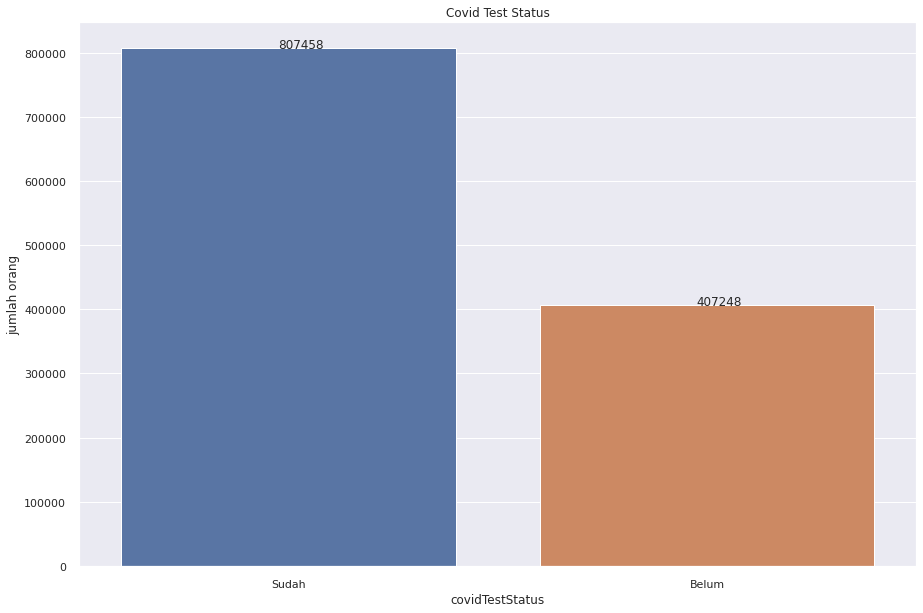

In [31]:
plt.figure(figsize=(15,10))
# sns.countplot(x='covidTestStatus', data=df_mc)

ax = sns.countplot(df_mc["covidTestStatus"], 
                   order = df_mc["covidTestStatus"].value_counts().index)

for p, label in zip(ax.patches, df_mc["covidTestStatus"].value_counts()):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))

plt.title('Covid Test Status')
plt.xlabel('covidTestStatus')
plt.ylabel('jumlah orang')
plt.show()

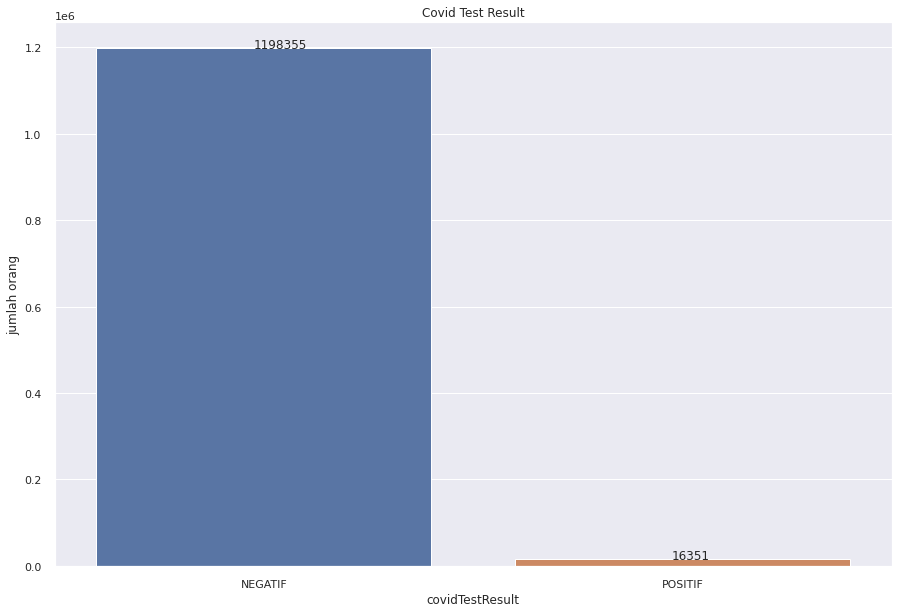

In [33]:
plt.figure(figsize=(15,10))
# sns.countplot(x='covidTestResult', data=df_mc)

ax = sns.countplot(df_mc["covidTestResult"], 
                   order = df_mc["covidTestResult"].value_counts().index)

for p, label in zip(ax.patches, df_mc["covidTestResult"].value_counts()):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))

plt.title('Covid Test Result')
plt.xlabel('covidTestResult')
plt.ylabel('jumlah orang')
plt.show()

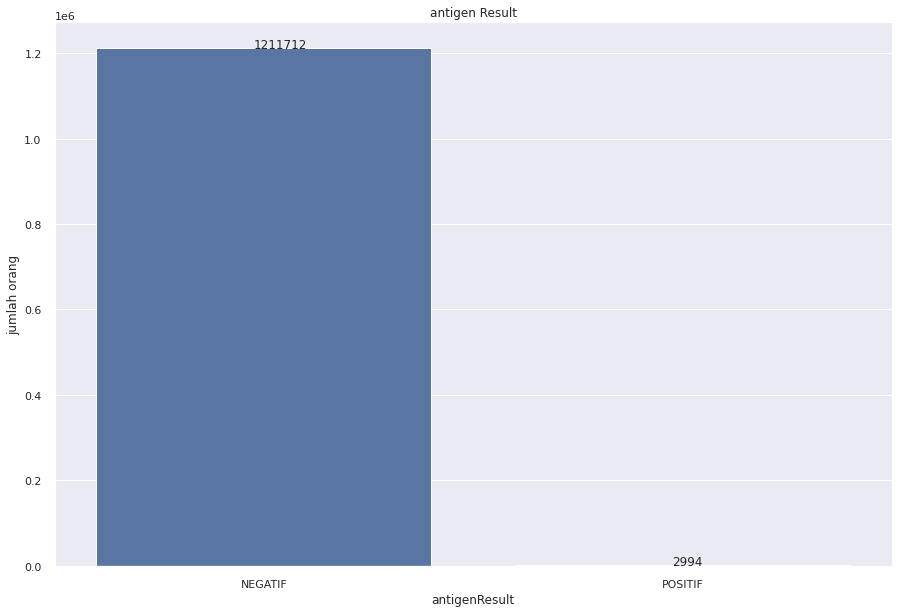

In [26]:
plt.figure(figsize=(15,10))
# sns.countplot(x='antigenResult', data=df_mc)

ax = sns.countplot(df_mc["antigenResult"], 
                   order = df_mc["antigenResult"].value_counts().index)

for p, label in zip(ax.patches, df_mc["antigenResult"].value_counts()):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))

plt.title('antigen Result')
plt.xlabel('antigenResult')
plt.ylabel('jumlah orang')
plt.show()

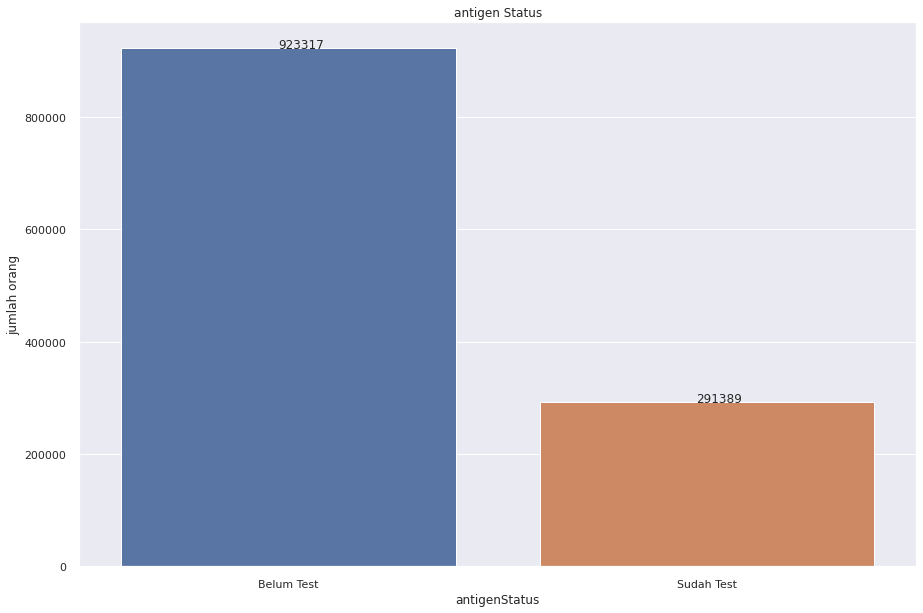

In [27]:
plt.figure(figsize=(15,10))
ax = sns.countplot(df_mc["antigenStatus"], 
                   order = df_mc["antigenStatus"].value_counts().index)

for p, label in zip(ax.patches, df_mc["antigenStatus"].value_counts()):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))
plt.title('antigen Status')
plt.xlabel('antigenStatus')
plt.ylabel('jumlah orang')
plt.show()

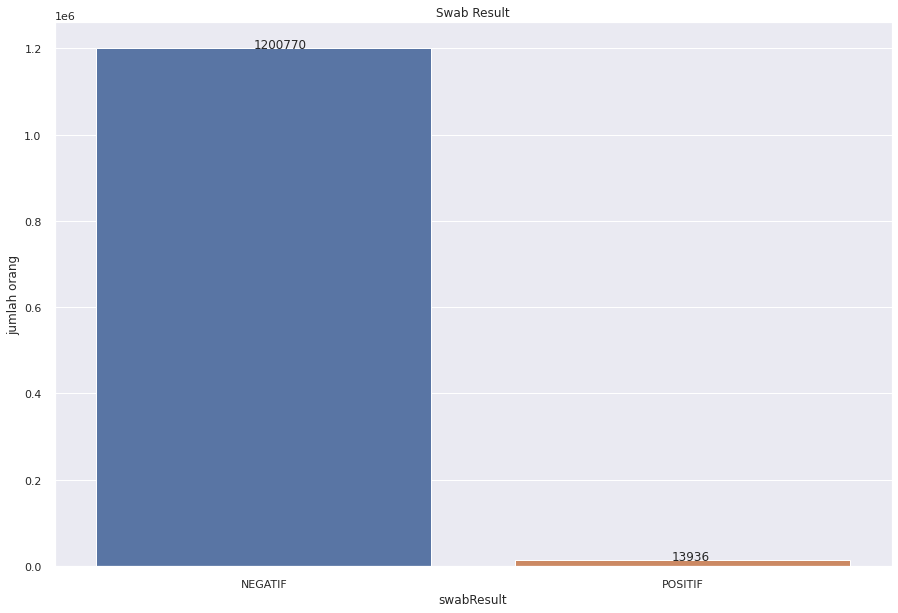

In [28]:
plt.figure(figsize=(15,10))
ax = sns.countplot(df_mc["swabResult"], 
                   order = df_mc["swabResult"].value_counts().index)

for p, label in zip(ax.patches, df_mc["swabResult"].value_counts()):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))
plt.title('Swab Result')
plt.xlabel('swabResult')
plt.ylabel('jumlah orang')
plt.show()

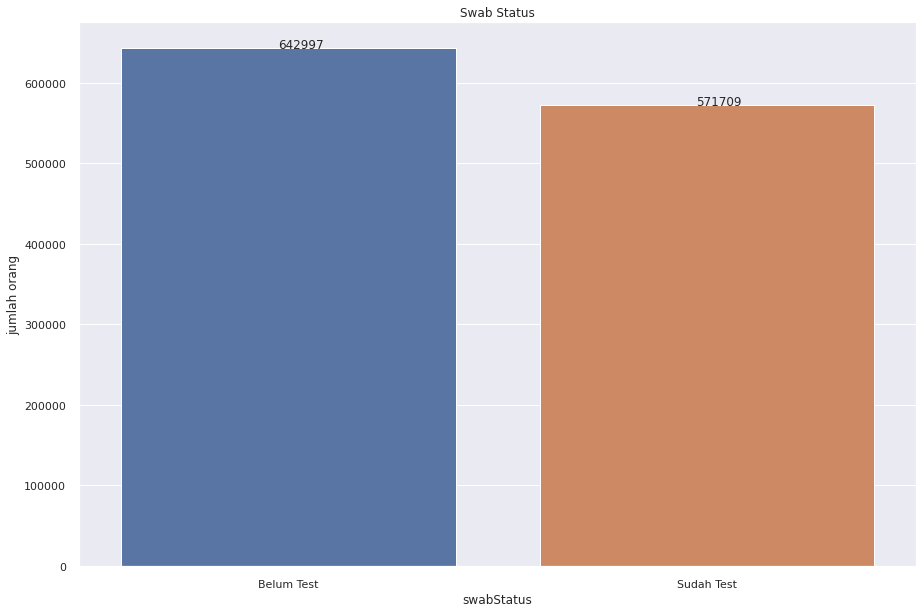

In [29]:
plt.figure(figsize=(15,10))
ax = sns.countplot(df_mc["swabStatus"], 
                   order = df_mc["swabStatus"].value_counts().index)

for p, label in zip(ax.patches, df_mc["swabStatus"].value_counts()):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))
plt.title('Swab Status')
plt.xlabel('swabStatus')
plt.ylabel('jumlah orang')
plt.show()

# **Combine Datasets**

In [ ]:
df_pl = pd.read_csv("scanPeduliLindungi-Clean.csv")
df_pl.head()

,sid,userId,user_status,checkInTime,checkOutTime,place_name,place_categoryName,locationAddress,location_latitude,location_longitude,crowd,status,userStatus,vaksinTestStatus,updatedAt,createdAt
0,60f49257c8948d0cd01751d7,f2655420-d183-11eb-b38f-c9cfd4f6bf1c,NOT POSITIVE,2021-07-18,2021-07-19,CGK - Main Gate Entrance - 3,Gedung,Terminal 3 RT.001/RW.010 Pajang Benda Kota Tan...,-6.119108,106.664222,141,1,yellow,Sudah Vaksin,2021-07-19,2021-07-18
1,60f4df6336a60b94b5488a7d,796a6b60-e82a-11eb-a626-692cd0692ddf,NOT POSITIVE,2021-07-19,2021-07-19,BNI BAJERA,Gedung,RUKO BAJERA JL. NGURAH RAI - DENPASAR,-8.503062,115.027762,2,1,yellow,Sudah Vaksin,2021-07-19,2021-07-19
2,60f8fdf951338da2c37ca942,5c15c070-80a5-11ea-8113-f9d0dd9176a2,NOT POSITIVE,2021-07-22,2021-07-23,CGK - Main Gate Entrance - 5,Gedung,Terminal 3 RT.001/RW.010 Pajang Benda Kota Tan...,-6.119110,106.664168,35,1,green,Sudah Vaksin,2021-07-23,2021-07-22
3,60ff3d9938602070ee1bd854,660e8420-7193-11ea-a650-87080ae56964,NOT POSITIVE,2021-07-26,2021-07-27,YIA-Pintu-Masuk-Terminal,Bandara,Jl. Wates - Purworejo No.Km. 42 Area Kebun Gla...,-7.897897,110.059511,32,1,green,Sudah Vaksin,2021-07-27,2021-07-26
4,61034dc036a60b94b5488b71,dcb6a8d0-f06a-11eb-abf9-67e5f4cad68f,NOT POSITIVE,2021-07-30,2021-07-30,SRG-Terminal-Entrance,Bandara,Jalan Bandara Ahmad Yani Tambakharjo Semarang ...,-6.966105,110.375283,5,1,green,Sudah Vaksin,2021-07-30,2021-07-30


In [ ]:
df_ehac = pd.read_csv("DataEHac-Clean.csv")
df_ehac.head()

,sid,userId,createdAt,createdBy_status,healthDeclaration_symptoms,personalDetail_travelPurpose,personalDetail_passportCountry,personalDetail_citizen,personalDetail_gender,personalDetail_bornDate,scan_latitude,scan_longitude,travelDetail_transportation_vehicleType,travelDetail_destination_cityName,travelDetail_destination_provinceName,travelDetail_origin_cityName,travelDetail_origin_provinceName,typeEhac,updatedAt
0,614308e26dc27b670037e516,a5e3abd0-067e-11ec-b01c-81579cec6191,2021-09-16,NOT POSITIVE,Tidak ada,Business,Indonesia,Indonesia,Perempuan,06/10/1997,-6.265337,106.884579,Airplane,KAB. MALANG,Jawa Timur,KAB. AGAM,Sumatera Barat,domestic,2021-09-16
1,617cb2b08cbb729f2b6481be,64e44f00-fda4-11eb-9fb0-1d79fb7ff9e3,2021-10-30,NOT POSITIVE,Tidak ada,Tourism / Leisure / Vacation,Indonesia,Indonesia,Laki-Laki,21/07/1997,-7.374848,112.793765,Airplane,KAB. MALANG,Jawa Timur,KAB. AGAM,Sumatera Barat,domestic,2021-10-30
2,6189f3db6cef808dae3a3d1c,98daa320-1228-11ec-958b-c1a568b08621,2021-11-09,NOT POSITIVE,Kejang-Kejang,Foreign Workers,Indonesia,Indonesia,Laki-Laki,29/12/2001,-6.265337,106.884579,Airplane,KAB. AGAM,Sumatera Barat,KAB. AGAM,Sumatera Barat,domestic,2021-11-09
3,6194ec93b32b3953e15d2f38,c7ad8350-4088-11ec-85c8-97789bc87e08,2021-11-17,NOT POSITIVE,Tidak ada,Pariwisata / Waktu luang / Liburan,Indonesia,Indonesia,Perempuan,23/11/2021,-0.786172,100.285642,Car,KAB. AGAM,Sumatera Barat,KAB. AGAM,Sumatera Barat,domestic,2021-11-17
4,614fb0334d9252677c02237f,440f0df0-ddf7-11eb-83ee-5d270fc0332f,2021-09-25,NOT POSITIVE,Tidak ada,Business,Indonesia,Indonesia,Laki-Laki,17/01/1965,-0.786651,100.286831,Airplane,KAB. AGAM,Sumatera Barat,KAB. AGAM,Sumatera Barat,domestic,2021-09-25


In [ ]:
df_mc = pd.read_csv("DataMicrosite-Clean.csv")
df_mc.head()

,sid,userId,place,swabDate,swabStatus,swabResult,swabHospital,swabValid,antigenDate,antigenStatus,antigenResult,antigenHospital,antigenValid,flightStatus,createdAt,updatedAt,covidTestStatus,covidTestResult
0,60fb7e041ccf9ed2fdf4e3fa,e0ee4dc0-b7f0-11eb-8988-5fb466026cb9,SRG,2021-07-23,Sudah Test,NEGATIF,LABORATORIUM KLINIK ESENSIA SEMARANG,True,2021-07-18,Sudah Test,POSITIF,KLINIK UTAMA RAWAT INAP ESENSIA,False,False,2021-07-24,2021-07-24,Sudah,POSITIF
1,60fcfb6384c7bb281bf4423d,e0ee4dc0-b7f0-11eb-8988-5fb466026cb9,SRG,2021-07-24,Sudah Test,NEGATIF,LABORATORIUM KF SEMARANG,True,2021-07-23,Sudah Test,NEGATIF,RS Islam Surakarta YARSIS,False,True,2021-07-25,2021-07-25,Sudah,NEGATIF
2,613815f6d5e841a26798d24a,c76daa70-eda2-11eb-b283-bf3fd4393649,KKP Kelas II Jayapura Akun 2,1970-01-01,Belum Test,NEGATIF,None,False,2021-09-08,Sudah Test,NEGATIF,LABORATORIUM KLINIK ASA,True,False,2021-09-08,2021-09-08,Sudah,NEGATIF
3,6138536c1dd7709ce0d27e02,42f07c20-e369-11eb-9869-b798d2e88909,HLP,1970-01-01,Belum Test,NEGATIF,None,False,2021-09-07,Sudah Test,NEGATIF,RS GRAHA MEDIKA,True,True,2021-09-08,2021-09-08,Sudah,NEGATIF
4,61385f9ba496721bacac87c5,c6985910-eda2-11eb-97b1-c51d7a65b913,KKP Kelas II Kendari Akun 2,2021-09-08,Sudah Test,NEGATIF,RS Bahteramas Provinsi Sultra,True,2021-08-16,Sudah Test,NEGATIF,Klinik Utama Taradita 48,False,True,2021-09-08,2021-09-08,Sudah,NEGATIF


## **Peduli Lindungi x EHac**

In [ ]:
df1 = pd.merge(df_pl, df_ehac, on=['userId'], suffixes=('_pl', '_ehac'))
print(df1.shape)
df1.head()

(222351, 34)


,sid_pl,userId,user_status,checkInTime,checkOutTime,place_name,place_categoryName,locationAddress,location_latitude,location_longitude,crowd,status,userStatus,vaksinTestStatus,updatedAt_pl,createdAt_pl,sid_ehac,createdAt_ehac,createdBy_status,healthDeclaration_symptoms,personalDetail_travelPurpose,personalDetail_passportCountry,personalDetail_citizen,personalDetail_gender,personalDetail_bornDate,scan_latitude,scan_longitude,travelDetail_transportation_vehicleType,travelDetail_destination_cityName,travelDetail_destination_provinceName,travelDetail_origin_cityName,travelDetail_origin_provinceName,typeEhac,updatedAt_ehac
0,610352405c9b78f825f31525,263be6d0-f072-11eb-a61e-b9038ccd2944,NOT POSITIVE,2021-07-30,2021-07-30,SRG-Terminal-Entrance,Bandara,Jalan Bandara Ahmad Yani Tambakharjo Semarang ...,-6.966105,110.375283,3,1,green,Sudah Vaksin,2021-07-30,2021-07-30,613cff309077ab029a5d4bbb,2021-09-11,NOT POSITIVE,Tidak ada,Business,Indonesia,Indonesia,Perempuan,17/09/2021,-6.946851,110.423643,Kapal Laut,KAB. SUKOHARJO,Jawa Tengah,KAB. KOTAWARINGIN BARAT,Kalimantan Tengah,domestic,2021-09-11
1,610cd4853c7784749618a9c8,5a3b6770-f1d6-11eb-a5a0-01a98f25a60d,NOT POSITIVE,2021-08-06,2021-08-07,CGK - Main Gate Entrance - E,Gedung,Terminal 2E RT.001/RW.010 Pajang Benda Kota Ta...,-6.121412,106.652012,302,1,green,Sudah Vaksin,2021-08-07,2021-08-06,6144189a814cea4b558e964c,2021-09-17,NOT POSITIVE,Tidak ada,Tourism / Leisure / Vacation,Indonesia,Indonesia,Laki-Laki,30/05/1994,-6.265337,106.884579,Pesawat,KAB. MANGGARAI BARAT,Nusa Tenggara Timur,KOTA BEKASI,Jawa Barat,domestic,2021-09-17
2,611102e5fbbd080d3ebb162b,747a5a20-f108-11eb-a7c1-51ff5c1c861a,NOT POSITIVE,2021-08-09,2021-08-10,Lippo Plaza Kupang,Mall,Lippo Plaza Kupang Jl. Veteran Fatululi Oebobo...,-10.158687,123.611820,21,1,green,Sudah Vaksin,2021-08-09,2021-08-09,61690387f11f0f886684a39e,2021-10-15,NOT POSITIVE,Tidak ada,Tourism / Leisure / Vacation,Indonesia,Indonesia,Perempuan,22/03/1982,-7.374892,112.793950,Airplane,KOTA SURABAYA,Jawa Timur,KOTA KUPANG,Nusa Tenggara Timur,domestic,2021-10-15
3,611102e5fbbd080d3ebb162b,747a5a20-f108-11eb-a7c1-51ff5c1c861a,NOT POSITIVE,2021-08-09,2021-08-10,Lippo Plaza Kupang,Mall,Lippo Plaza Kupang Jl. Veteran Fatululi Oebobo...,-10.158687,123.611820,21,1,green,Sudah Vaksin,2021-08-09,2021-08-09,61693e0a70efcbd3c24c8331,2021-10-15,NOT POSITIVE,Tidak ada,Tourism / Leisure / Vacation,Indonesia,Indonesia,Perempuan,22/03/1982,-6.265337,106.884579,Airplane,KOTA DENPASAR,Bali,KAB. SIDOARJO,Jawa Timur,domestic,2021-10-15
4,610d05d9670592d67bdb8e69,747a5a20-f108-11eb-a7c1-51ff5c1c861a,NOT POSITIVE,2021-08-06,2021-08-06,Lippo Plaza Kupang,Mall,Lippo Plaza Kupang Jl. Veteran Fatululi Oebobo...,-10.158687,123.611820,2,1,green,Sudah Vaksin,2021-08-06,2021-08-06,61690387f11f0f886684a39e,2021-10-15,NOT POSITIVE,Tidak ada,Tourism / Leisure / Vacation,Indonesia,Indonesia,Perempuan,22/03/1982,-7.374892,112.793950,Airplane,KOTA SURABAYA,Jawa Timur,KOTA KUPANG,Nusa Tenggara Timur,domestic,2021-10-15


In [ ]:
df1.to_csv('PeduliLindungixEHac.csv', index=False)


## **Peduli Lindungi x Microsite**

In [ ]:
df2 = pd.merge(df_pl, df_mc, on=['userId'], suffixes=('_pl', '_mc'))
print(df2.shape)
df2.head()

# 263be6d0-f072-11eb-a61e-b9038ccd2944
# pcare-38f3-11eb-96b5-1d43657e7249

(52559, 33)


,sid_pl,userId,user_status,checkInTime,checkOutTime,place_name,place_categoryName,locationAddress,location_latitude,location_longitude,crowd,status,userStatus,vaksinTestStatus,updatedAt_pl,createdAt_pl,sid_mc,place,swabDate,swabStatus,swabResult,swabHospital,swabValid,antigenDate,antigenStatus,antigenResult,antigenHospital,antigenValid,flightStatus,createdAt_mc,updatedAt_mc,covidTestStatus,covidTestResult
0,611b4ab9e2591a8b78312566,pcare-38f3-11eb-96b5-1d43657e7249,NOT POSITIVE,2021-08-17,2021-08-18,Gulu Gulu,Tenan Mandiri,Gambir,-8.013101,111.901729,17,1,green,Sudah Vaksin,2021-08-18,2021-08-17,6107ef9f9181897a9188b93f,PCARE,1970-01-01,Belum Test,NEGATIF,None,False,2021-07-26,Sudah Test,NEGATIF,Klinik THC Telkom Landmark Tower,False,False,2021-08-02,2021-08-02,Sudah,NEGATIF
1,611b4ab9e2591a8b78312566,pcare-38f3-11eb-96b5-1d43657e7249,NOT POSITIVE,2021-08-17,2021-08-18,Gulu Gulu,Tenan Mandiri,Gambir,-8.013101,111.901729,17,1,green,Sudah Vaksin,2021-08-18,2021-08-17,6107efb913abae6c711c4c7f,PCARE,1970-01-01,Belum Test,NEGATIF,None,False,2021-07-26,Sudah Test,NEGATIF,Klinik THC Telkom Landmark Tower,False,False,2021-08-02,2021-08-02,Sudah,NEGATIF
2,611b4ab9e2591a8b78312566,pcare-38f3-11eb-96b5-1d43657e7249,NOT POSITIVE,2021-08-17,2021-08-18,Gulu Gulu,Tenan Mandiri,Gambir,-8.013101,111.901729,17,1,green,Sudah Vaksin,2021-08-18,2021-08-17,6107efbfc07c489cb5157bcd,PCARE,1970-01-01,Belum Test,NEGATIF,None,False,2021-07-26,Sudah Test,NEGATIF,Klinik THC Telkom Landmark Tower,False,False,2021-08-02,2021-08-02,Sudah,NEGATIF
3,611b4ab9e2591a8b78312566,pcare-38f3-11eb-96b5-1d43657e7249,NOT POSITIVE,2021-08-17,2021-08-18,Gulu Gulu,Tenan Mandiri,Gambir,-8.013101,111.901729,17,1,green,Sudah Vaksin,2021-08-18,2021-08-17,6107efcab0542a14abf1bd86,PCARE,1970-01-01,Belum Test,NEGATIF,None,False,2021-07-26,Sudah Test,NEGATIF,Klinik THC Telkom Landmark Tower,False,False,2021-08-02,2021-08-02,Sudah,NEGATIF
4,611b4ab9e2591a8b78312566,pcare-38f3-11eb-96b5-1d43657e7249,NOT POSITIVE,2021-08-17,2021-08-18,Gulu Gulu,Tenan Mandiri,Gambir,-8.013101,111.901729,17,1,green,Sudah Vaksin,2021-08-18,2021-08-17,6107efcf63f9cee00e7b8eb0,PCARE,1970-01-01,Belum Test,NEGATIF,None,False,2021-07-26,Sudah Test,NEGATIF,Klinik THC Telkom Landmark Tower,False,False,2021-08-02,2021-08-02,Sudah,NEGATIF


In [ ]:
df2.to_csv('PeduliLindungixMicrosite.csv', index=False)


## **EHac x Microsite**

In [ ]:
df3 = pd.merge(df_ehac, df_mc, on=['userId'], suffixes=('_ehac', '_mc'))
print(df3.shape)
df3.head()

(0, 36)


,sid_ehac,userId,createdAt_ehac,createdBy_status,healthDeclaration_symptoms,personalDetail_travelPurpose,personalDetail_passportCountry,personalDetail_citizen,personalDetail_gender,personalDetail_bornDate,scan_latitude,scan_longitude,travelDetail_transportation_vehicleType,travelDetail_destination_cityName,travelDetail_destination_provinceName,travelDetail_origin_cityName,travelDetail_origin_provinceName,typeEhac,updatedAt_ehac,sid_mc,place,swabDate,swabStatus,swabResult,swabHospital,swabValid,antigenDate,antigenStatus,antigenResult,antigenHospital,antigenValid,flightStatus,createdAt_mc,updatedAt_mc,covidTestStatus,covidTestResult


In [ ]:
df1 = pd.read_csv("PeduliLindungixEHac.csv")
df2 = pd.read_csv("PeduliLindungixMicrosite.csv")

df3 = pd.merge(df1, df2, on=['userId'])
print(df3.shape)
df3.head()

(0, 66)


,sid_pl_x,userId,user_status_x,checkInTime_x,checkOutTime_x,place_name_x,place_categoryName_x,locationAddress_x,location_latitude_x,location_longitude_x,crowd_x,status_x,userStatus_x,vaksinTestStatus_x,updatedAt_pl_x,createdAt_pl_x,sid_ehac,createdAt_ehac,createdBy_status,healthDeclaration_symptoms,personalDetail_travelPurpose,personalDetail_passportCountry,personalDetail_citizen,personalDetail_gender,personalDetail_bornDate,scan_latitude,scan_longitude,travelDetail_transportation_vehicleType,travelDetail_destination_cityName,travelDetail_destination_provinceName,travelDetail_origin_cityName,travelDetail_origin_provinceName,typeEhac,updatedAt_ehac,sid_pl_y,user_status_y,checkInTime_y,checkOutTime_y,place_name_y,place_categoryName_y,locationAddress_y,location_latitude_y,location_longitude_y,crowd_y,status_y,userStatus_y,vaksinTestStatus_y,updatedAt_pl_y,createdAt_pl_y,sid_mc,place,swabDate,swabStatus,swabResult,swabHospital,swabValid,antigenDate,antigenStatus,antigenResult,antigenHospital,antigenValid,flightStatus,createdAt_mc,updatedAt_mc,covidTestStatus,covidTestResult
